In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('TCGA_InfoWithGrade.csv', encoding = 'utf-8')

df

Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       0             51.30     0     1     0     0     0     0    0   
1        0       0             38.72     0     1     0     0     0     0    1   
2        0       0             35.17     0     1     1     1     0     0    0   
3        0       1             32.78     0     1     1     1     0     0    0   
4        0       0             31.51     0     1     1     1     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
834      1       1             77.89     0     0     0     0     1     0    0   
835      1       0             85.18     0     0     1     0     1     0    0   
836      1       1             77.49     0     0     1     0     1     0    0   
837      1       0             63.33     0     0     1     0     0     0    0   
838      1       0             76.61     1     0     0     0     0     0    0   

     ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0    ...      1    0       0     0      0        0       0     0     0       0  
1    ...      0    0       0     0      0        0       0     0     0       0  
2    ...      0    0       0     0      0        0       0     0     0       0  
3    ...      0    0       0     0      0        0       0     0     1       0  
4    ...      0    0       0     0      0        0       0     0     0       0  
..   ...    ...  ...     ...   ...    ...      ...     ...   ...   ...     ...  
834  ...      0    0       0     0      0        0       0     0     0       0  
835  ...      0    0       0     0      0        0       0     0     0       0  
836  ...      0    0       0     0      0        0       0     0     0       0  
837  ...      0    1       0     0      0        0       0     0     0       0  
838  ...      0    0       0     0      0        0       0     0     0       0  

[839 rows x 24 columns]

In [2]:

import pandas as pd
import string


# 定义一个函数来检查是否包含非ASCII字符
def contains_non_ascii(text):
    return any(ord(char) > 127 for char in text)

# 找出包含非ASCII字符的行
non_ascii_rows = df.map(lambda x: contains_non_ascii(str(x)) if isinstance(x, str) else False)
# 提取包含非ASCII字符的行
rows_with_non_ascii = df[non_ascii_rows.any(axis=1)]

# 显示包含非ASCII字符的行
rows_with_non_ascii.to_csv('rows_with_non_ascii.csv', index=False)
rows_with_non_ascii


Empty DataFrame
Columns: [Grade, Gender, Age_at_diagnosis, Race, IDH1, TP53, ATRX, PTEN, EGFR, CIC, MUC16, PIK3CA, NF1, PIK3R1, FUBP1, RB1, NOTCH1, BCOR, CSMD3, SMARCA4, GRIN2A, IDH2, FAT4, PDGFRA]
Index: []

[0 rows x 24 columns]

In [3]:
df.columns = [col.encode('ascii', 'ignore').decode('ascii') for col in df.columns]

# 确保转换后的列名是ASCII字符
print(df.columns)

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')


In [4]:
print(df.head())

   Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0      0       0             51.30     0     1     0     0     0     0    0   
1      0       0             38.72     0     1     0     0     0     0    1   
2      0       0             35.17     0     1     1     1     0     0    0   
3      0       1             32.78     0     1     1     1     0     0    0   
4      0       0             31.51     0     1     1     1     0     0    0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       0     0     1       0  
4  ...      0    0       0     0      0        0       0     0     0       0  

[5 rows x 24 columns]


In [5]:

# 导入 pandas 库
import pandas as pd


# 将第一列保存为一个 Series
first_column = df.iloc[:, 0]

# 将第一列删除
df = df.drop(df.columns[0], axis=1)

# 将 Series 添加到 DataFrame 的最后一列
df['label'] = first_column

# 显示修改后的 DataFrame
df

Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0         0             51.30     0     1     0     0     0     0    0      0   
1         0             38.72     0     1     0     0     0     0    1      0   
2         0             35.17     0     1     1     1     0     0    0      0   
3         1             32.78     0     1     1     1     0     0    0      1   
4         0             31.51     0     1     1     1     0     0    0      0   
..      ...               ...   ...   ...   ...   ...   ...   ...  ...    ...   
834       1             77.89     0     0     0     0     1     0    0      0   
835       0             85.18     0     0     1     0     1     0    0      0   
836       1             77.49     0     0     1     0     1     0    0      0   
837       0             63.33     0     0     1     0     0     0    0      1   
838       0             76.61     1     0     0     0     0     0    0      0   

     ...  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  label  
0    ...    0       0     0      0        0       0     0     0       0      0  
1    ...    0       0     0      0        0       0     0     0       0      0  
2    ...    0       0     0      0        0       0     0     0       0      0  
3    ...    0       0     0      0        0       0     0     1       0      0  
4    ...    0       0     0      0        0       0     0     0       0      0  
..   ...  ...     ...   ...    ...      ...     ...   ...   ...     ...    ...  
834  ...    0       0     0      0        0       0     0     0       0      1  
835  ...    0       0     0      0        0       0     0     0       0      1  
836  ...    0       0     0      0        0       0     0     0       0      1  
837  ...    1       0     0      0        0       0     0     0       0      1  
838  ...    0       0     0      0        0       0     0     0       0      1  

[839 rows x 24 columns]

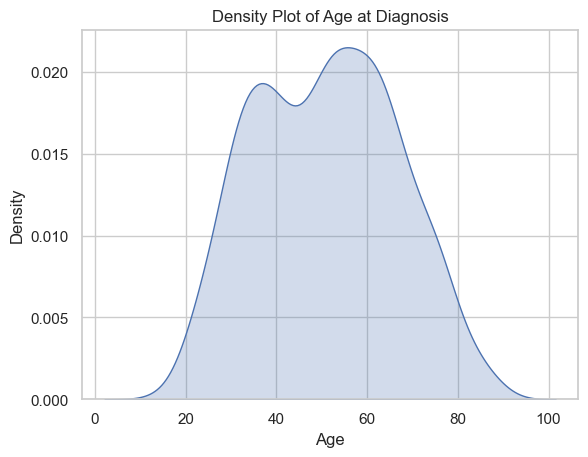

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置Seaborn风格
sns.set(style="whitegrid")

# 绘制密度图
sns.kdeplot(df['Age_at_diagnosis'], fill=True, color="b")
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age at Diagnosis')
plt.show()

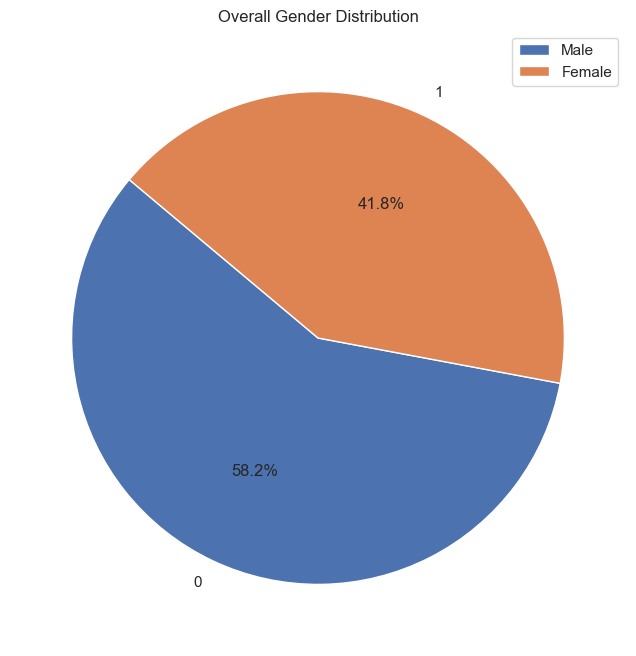

In [7]:

import matplotlib.pyplot as plt

gender_counts_total = df['Gender'].value_counts()
# 创建一个新的 figure，并设置整体大小
plt.figure(figsize=(8, 8))

# 绘制饼图
plt.pie(gender_counts_total, labels=gender_counts_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Gender Distribution')

# 修改图例标签
plt.legend(labels=['Male', 'Female'])

plt.show()


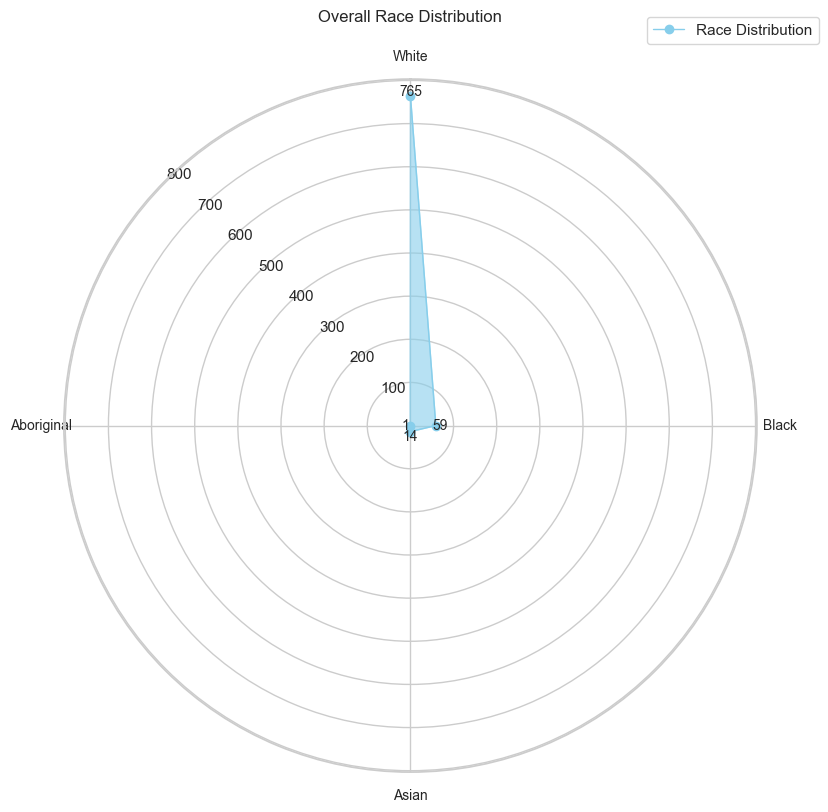

In [8]:



import matplotlib.pyplot as plt
import numpy as np

# 假设这里的df是你的数据框，包含了'Race'列和'数量'列（表示数量）
# race_counts_total是每个种族的总数量统计
race_counts_total = df['Race'].value_counts().sort_index()

# 种族对应的标签字典
race_labels = {
    0: "White",
    1: "Black",
    2: "Asian",
    3: "Aboriginal"
}

# 创建一个新的 figure
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# 计算角度，假设四个种族
angles = np.linspace(0, 2 * np.pi, len(race_counts_total), endpoint=False).tolist()

# 绘制鸡冠花图
ax.plot(angles, race_counts_total, linewidth=1, linestyle='solid', color='skyblue', marker='o', markersize=6, label='Race Distribution')
ax.fill(angles, race_counts_total, color='skyblue', alpha=0.6)

# 添加标签和标题
ax.set_theta_offset(np.pi / 2)  # 将偏移角度调整为正90度，实现整体顺时针旋转90度
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels([race_labels[idx] for idx in race_counts_total.index],fontsize=10)  # 使用种族名称作为标签
ax.set_xticks(np.linspace(0, 2*np.pi, len(race_counts_total), endpoint=False))
ax.set_title('Overall Race Distribution', pad=20)

# 调整标签的位置，使其稍微远离填充区域
ax.set_rlabel_position(-45)  # 适当调整标签的位置

# 在鸡冠花图上标注每个数据点的值
for angle, count in zip(angles, race_counts_total):
    ax.text(angle, count + 10, str(count), ha='center', va='center', fontsize=10)

# 显示图例，将图例放置在右上角
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# 显示图形
plt.show()



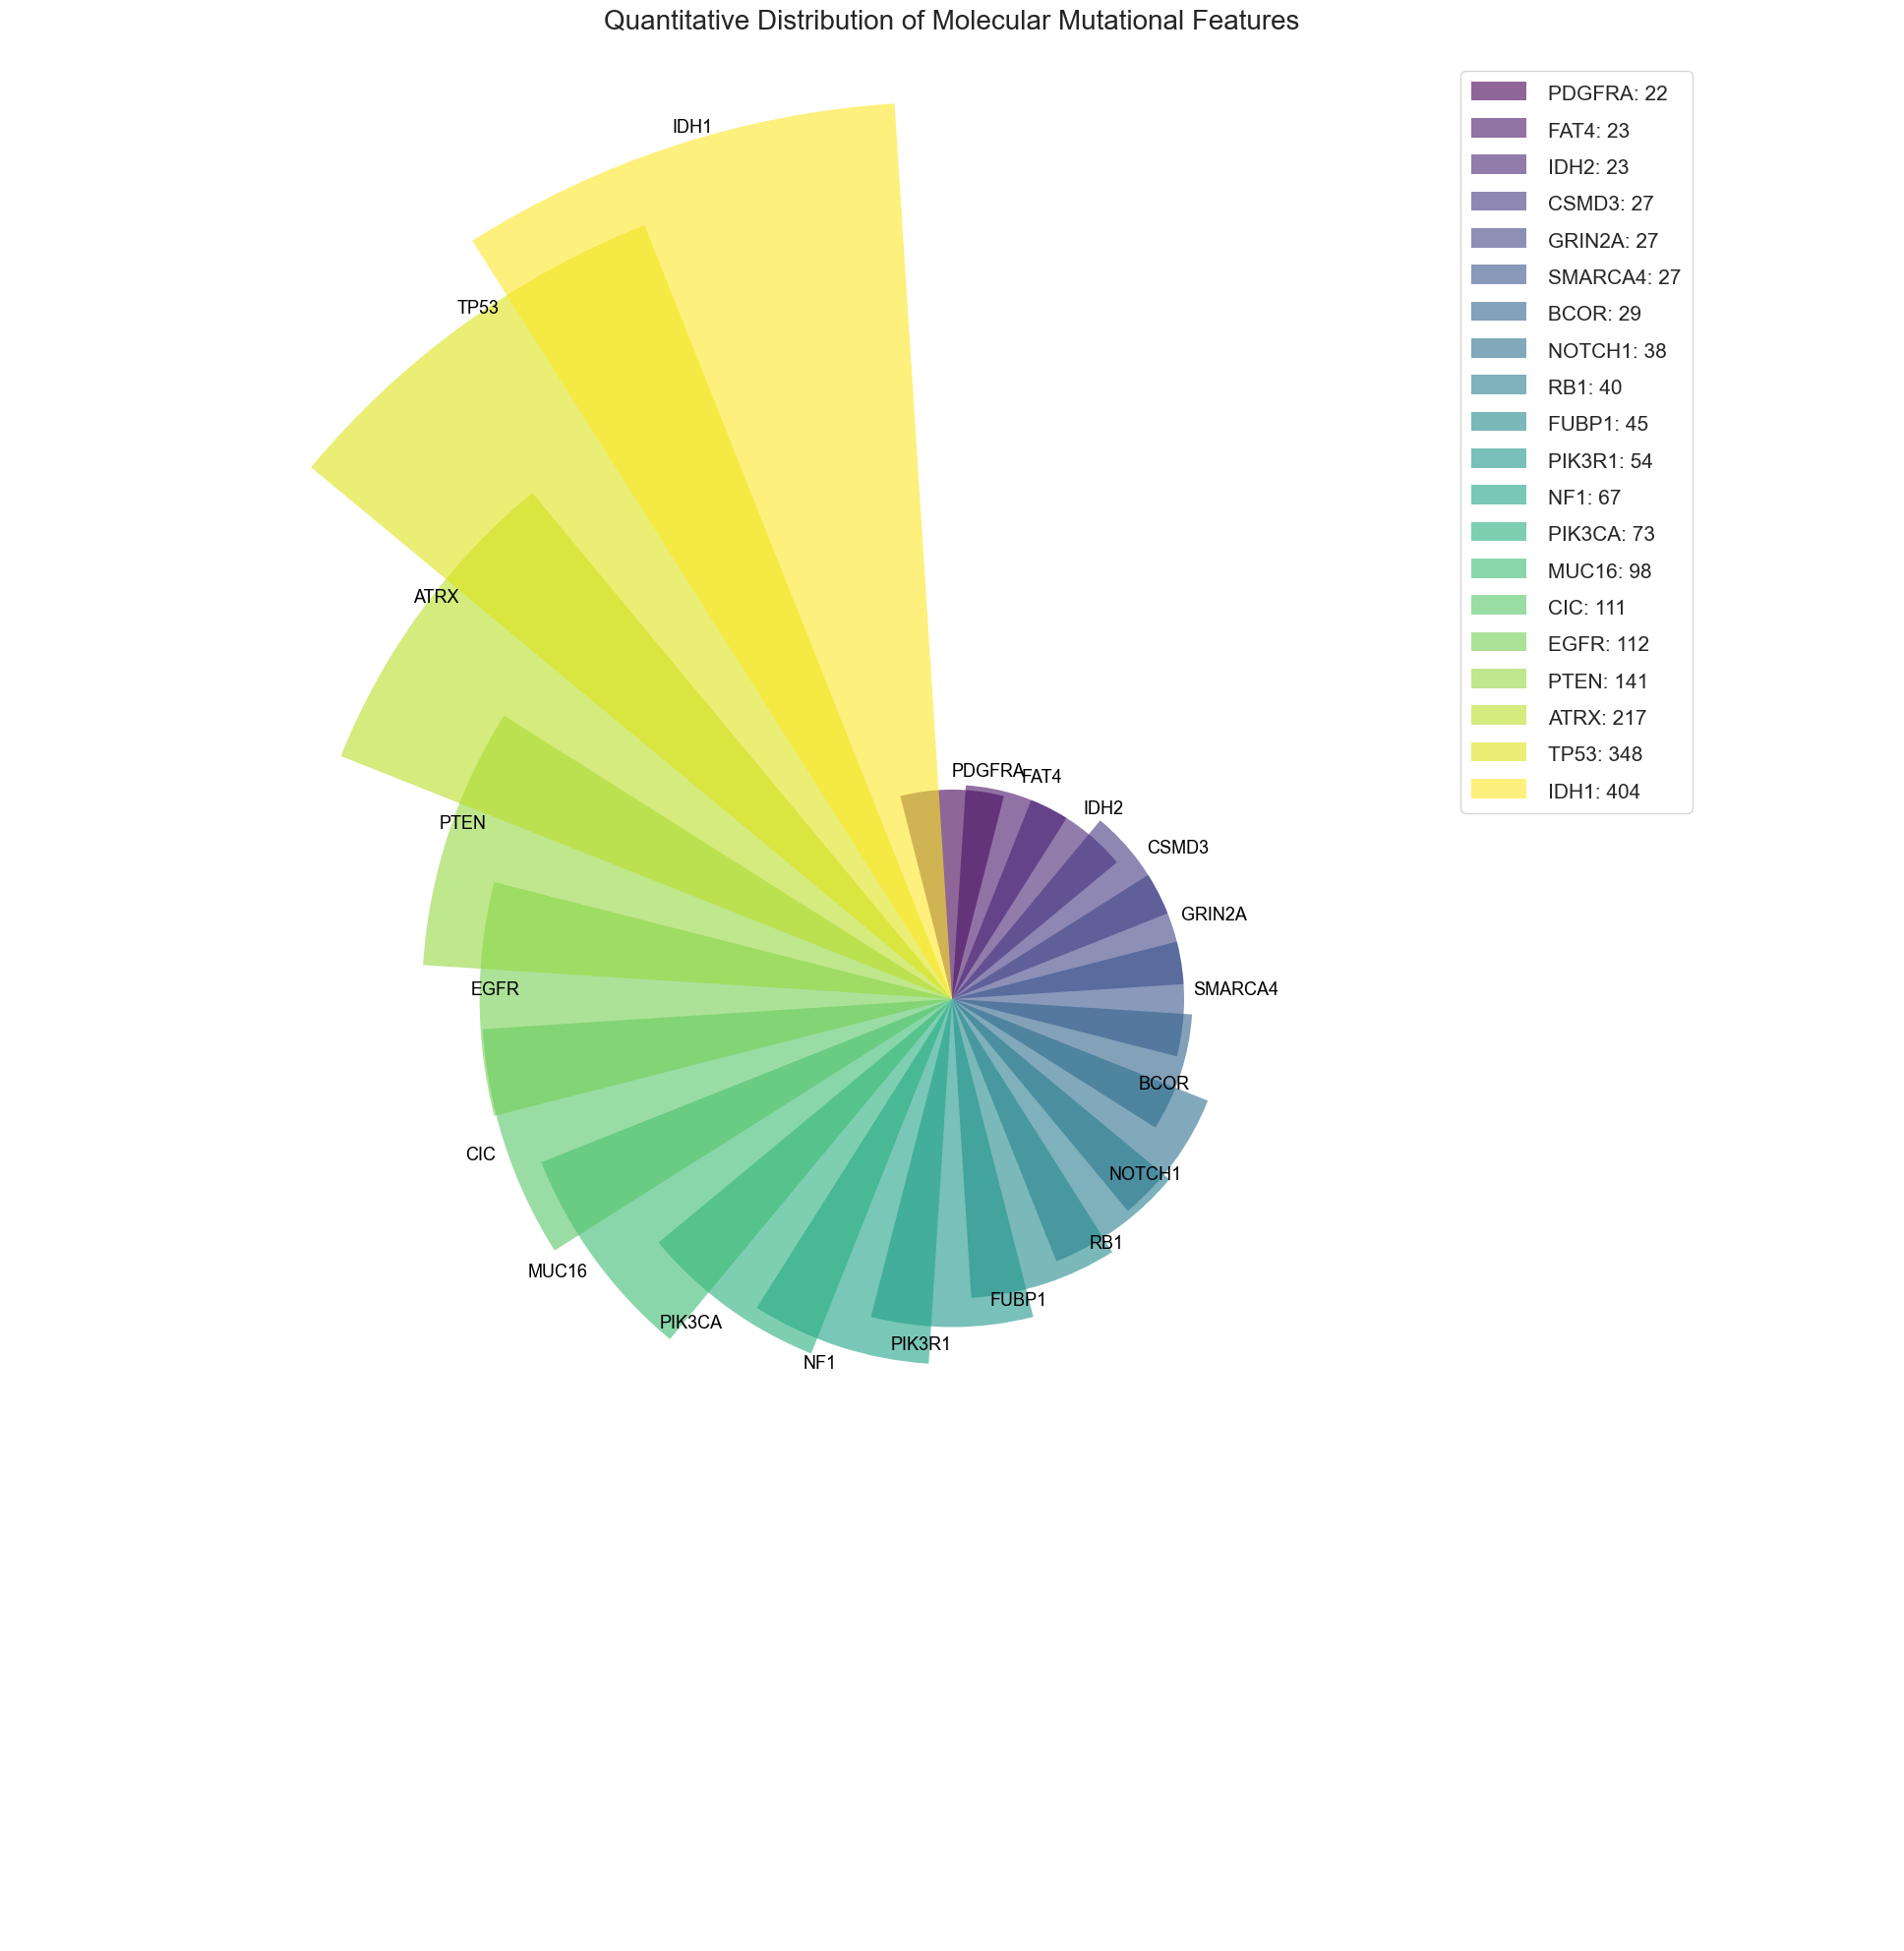

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设 df 是你的 DataFrame

# 初始化 counts 列表和 labels 列表
counts = []
labels = []

# 遍历数据
for i, col in enumerate(df.columns[3:23]):
    # 统计当前列中值为1的数量
    count = (df[col] == 1).sum()
    counts.append(count)
    labels.append(col)

# 根据 counts 的大小从小到大对 labels 和 counts 进行排序
counts, labels = zip(*sorted(zip(counts, labels)))

# 准备颜色方案
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))  # 使用viridis色彩映射

# 绘制南丁格尔玫瑰图
fig, ax = plt.subplots(figsize=(25, 20), subplot_kw=dict(polar=True))

# 计算每个扇区的角度
angles = np.linspace(0, 2 * np.pi, len(counts), endpoint=False).tolist()

# 绘制鸡冠花图，去除扇形的边框线和极坐标的边框线
bars = ax.bar(angles, np.sqrt(counts), width=0.5, align='center', color=colors, edgecolor='none', alpha=0.6)

# 设置极坐标图的参数
ax.set_theta_offset(np.pi / 2)  # 将偏移角度调整为正90度，实现整体顺时针旋转90度
ax.set_theta_direction(-1)
ax.set_xticks([])  # 去除角度刻度
ax.set_yticks([])  # 去除半径刻度

# 在鸡冠花图上标注每个数据点的标签，并将标签颜色设为黑色
for bar, angle, color, label in zip(bars, angles, colors, labels):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    
    # 找到当前 label 在 labels 中的索引
    idx = labels.index(label)
    
    # 从 counts 中取出对应的计数值
    count_value = counts[idx]
    
    # 计算标签位置，使其与扇形的弦侧平行
    label_angle = np.degrees(angle)
    if label_angle > 90 and label_angle < 270:
        ha = 'right'
        va = 'top'
    else:
        ha = 'left'
        va = 'bottom'
    
    # 标签显示在对应的角度和半径上，颜色设置为黑色
    ax.text(angle, np.sqrt(count_value) + 0.2, f'{label}', ha=ha, va=va, fontsize=13, color='black')

# 添加图例并放大
legend_labels = [f'{label}: {count}' for label, count in zip(labels, counts)]
legend = ax.legend(bars, legend_labels, loc='upper right', fontsize=20, bbox_to_anchor=(0.9, 1))
for text in legend.get_texts():
    text.set_fontsize(15)  # 放大图例文字大小

# 添加标题
ax.set_title('Quantitative Distribution of Molecular Mutational Features', pad=20, fontsize=20)

# 调整布局
plt.tight_layout()

# 去除边框
ax.spines['polar'].set_visible(False)

# 显示图形
plt.show()


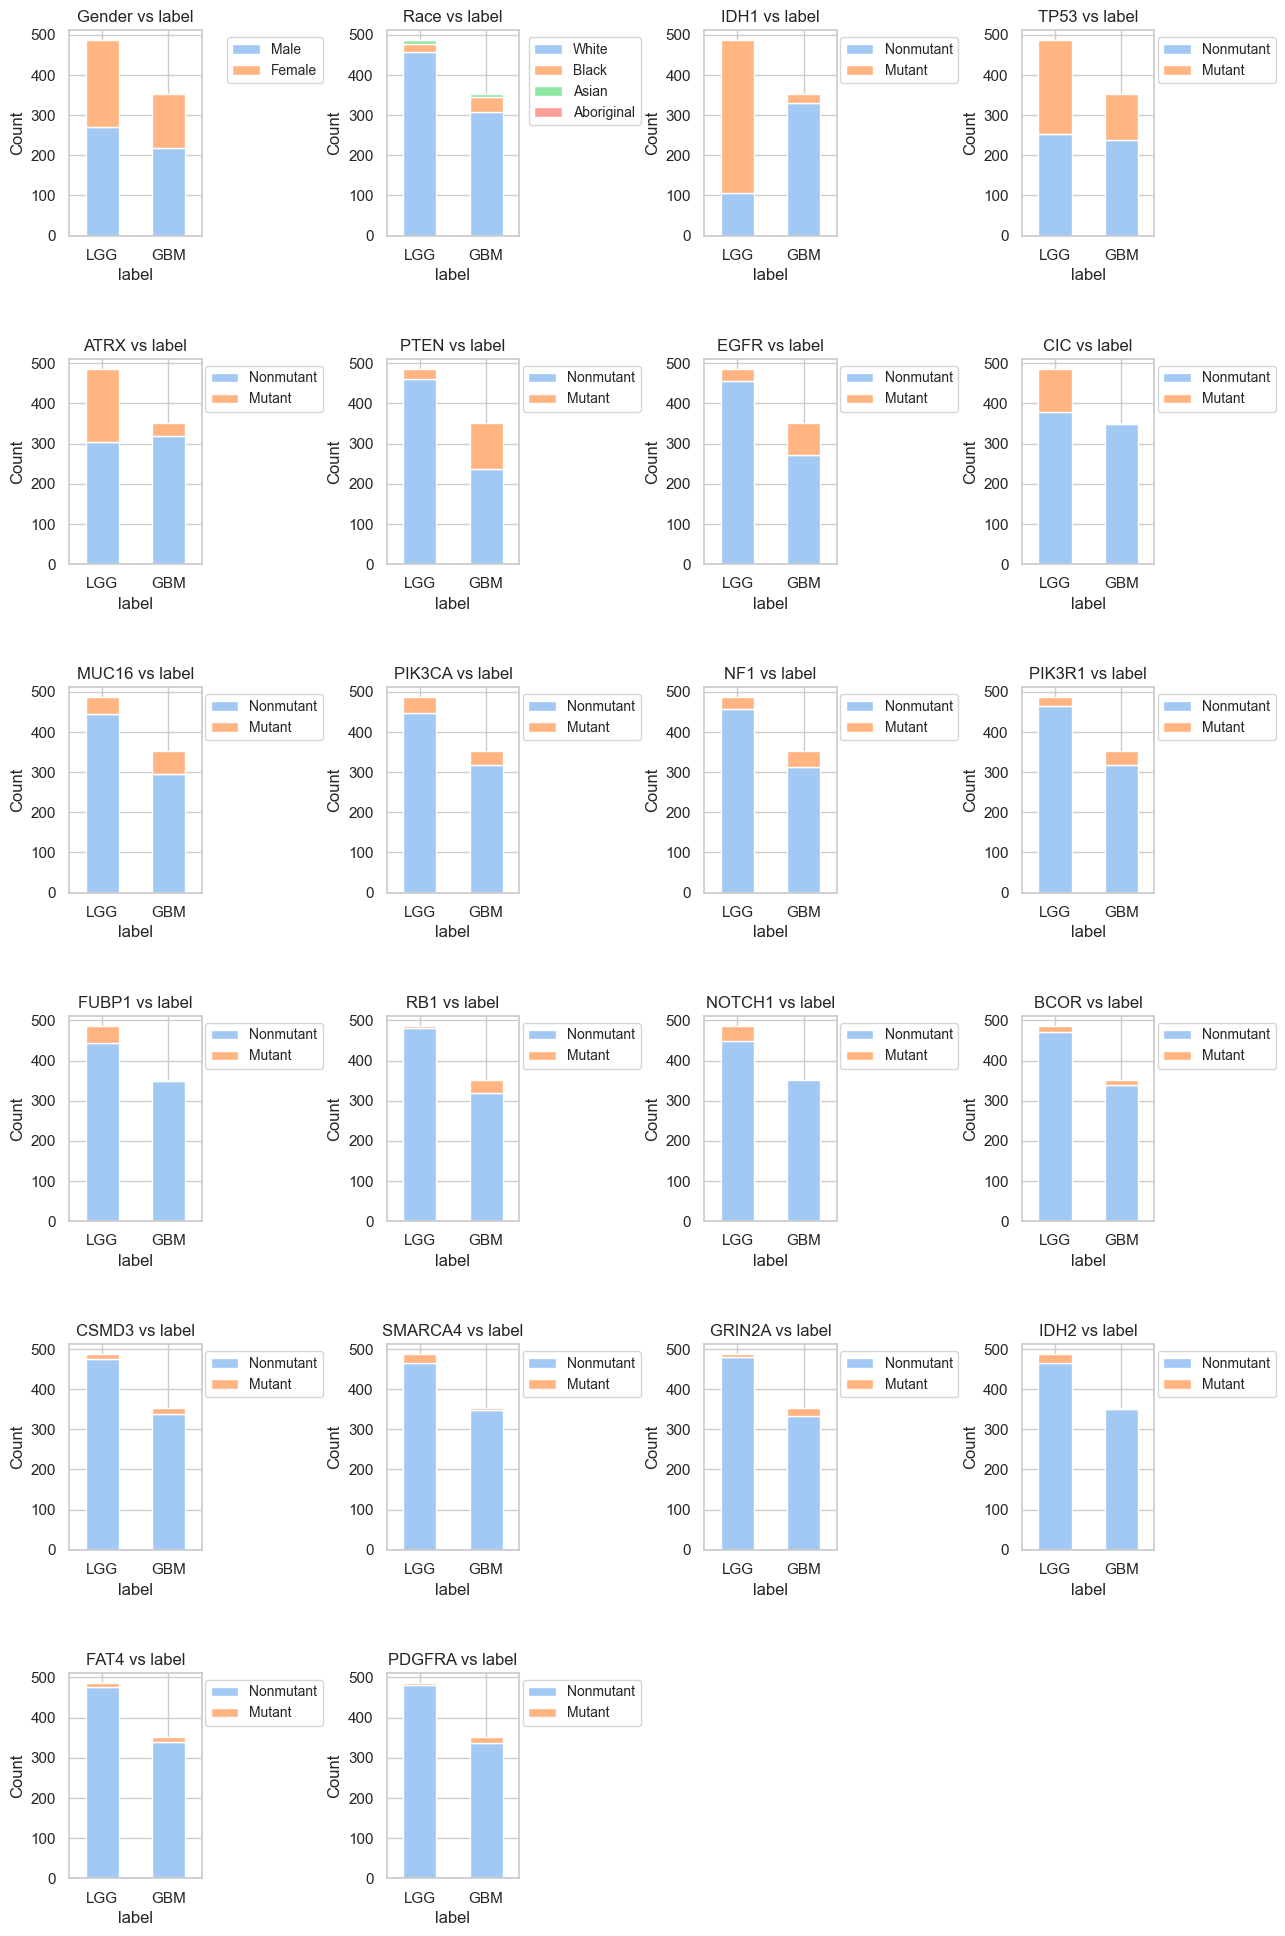

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df 是你的 DataFrame，已经定义好了
# 检查数据是否为空
if df.empty:
    print("DataFrame is empty!")
else:
    # 确定子图的排列方式
    num_cols = 4  # 每行显示的子图列数
    columns_to_plot = df.columns[[0] + list(range(2, 23))]  # 第一列和第三列到第二十三列的数据，不包括第二列
    num_rows = (len(columns_to_plot) - 1) // num_cols + 1  # 计算需要的行数
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 24))  # 设置更大的图形大小

    # 性别的图例标签映射
    gender_mapping = {
        df.columns[0]: {0: 'Male', 1: 'Female'}
    }

    # 种族的图例标签映射
    race_mapping = {
        df.columns[2]: {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Aboriginal'}
    }

    # 分子突变特征的图例标签映射
    molecule_mapping = {}
    for col in df.columns[3:23]:
        molecule_mapping[col] = {0: 'Nonmutant', 1: 'Mutant'}

    # 添加定制的图例函数
    def add_custom_legend(ax, handles, labels):
        ax.legend(handles, labels, loc='upper right', fontsize='small', bbox_to_anchor=(1.97, 1))

    # 循环遍历列名
    for i, col in enumerate(columns_to_plot):
        # 获取当前子图
        ax = axes.flatten()[i]

        # 按"label"的两种类别进行分组统计
        grouped_df = df.groupby(['label', col]).size().unstack()

        # 检查grouped_df是否为空
        if grouped_df is not None and not grouped_df.empty:
            # 设置整体颜色主题为浅色
            sns.set_palette("pastel")

            # 创建索引转换后的副本以供使用
            converted_grouped_df = grouped_df.copy()

            # 将索引从0和1改为LGG和GBM
            converted_grouped_df = converted_grouped_df.rename(index={0: 'LGG', 1: 'GBM'})

            # 绘制条形图，禁用默认图例，手动添加小图例
            ax = converted_grouped_df.plot(kind='bar', stacked=True, ax=ax, legend=False)

            # 设置子图标题和x/y轴标签等
            ax.set_title(f'{col} vs label')
            ax.set_xlabel('label')
            ax.set_ylabel('Count')

            # 将x轴上的数字标签旋转为竖向显示
            ax.tick_params(axis='x', rotation=0)  # 设置标签竖向显示

            # 根据列名选择适当的图例映射
            if col in gender_mapping:
                labels = [gender_mapping[col].get(label, label) for label in converted_grouped_df.columns]
            elif col in race_mapping:
                labels = [race_mapping[col].get(label, label) for label in converted_grouped_df.columns]
            elif col in molecule_mapping:
                labels = [molecule_mapping[col].get(label, label) for label in converted_grouped_df.columns]

            # 手动添加图例
            handles, _ = ax.get_legend_handles_labels()
            add_custom_legend(ax, handles, labels)

    # 删除多余的子图
    for j in range(len(columns_to_plot), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

    # 调整子图之间的横向间距和纵向间距
    plt.subplots_adjust(wspace=1.4, hspace=0.6)

    # 显示图形
    plt.show()


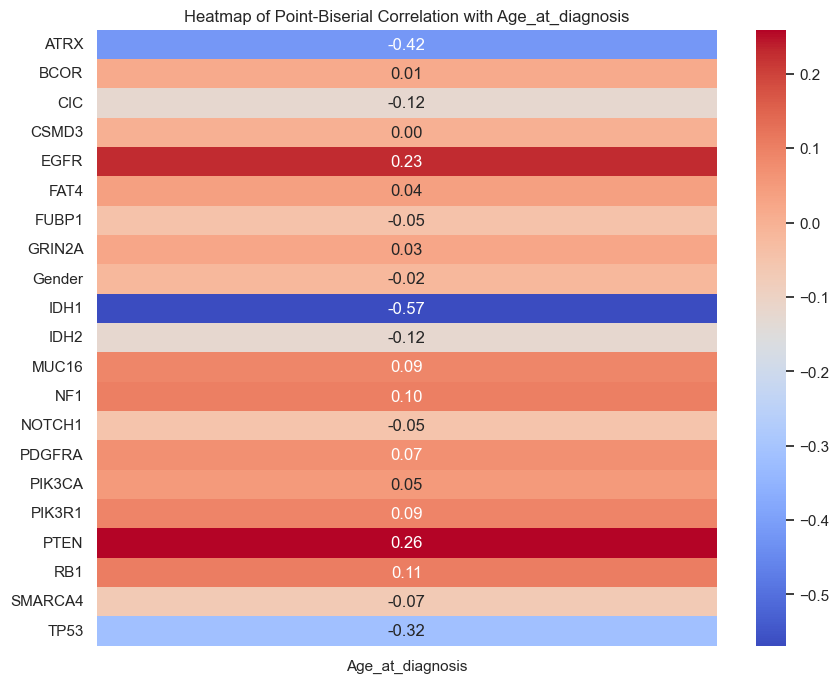

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

# 计算点二列相关系数
def point_biserial_correlation(x, y):
    """计算点二列相关系数"""
    return pointbiserialr(x, y)[0]

# 获取除 'Age_at_diagnosis', 'label', 和 'Race' 外的列
analysis_columns = df.columns.difference(['Age_at_diagnosis', 'label', 'Race'])

# 创建数据子集
df_cat = df[analysis_columns]

# 计算相关性矩阵
variables = df_cat.columns
corr_matrix = pd.DataFrame(index=variables, columns=['Age_at_diagnosis'])

# 计算每个分类变量与 'Age_at_diagnosis' 的点二列相关系数
for var in variables:
    corr_matrix.loc[var, 'Age_at_diagnosis'] = point_biserial_correlation(df['Age_at_diagnosis'], df_cat[var])

# 转换矩阵为数值型
corr_matrix = corr_matrix.astype(float)

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Point-Biserial Correlation with Age_at_diagnosis')
plt.show()

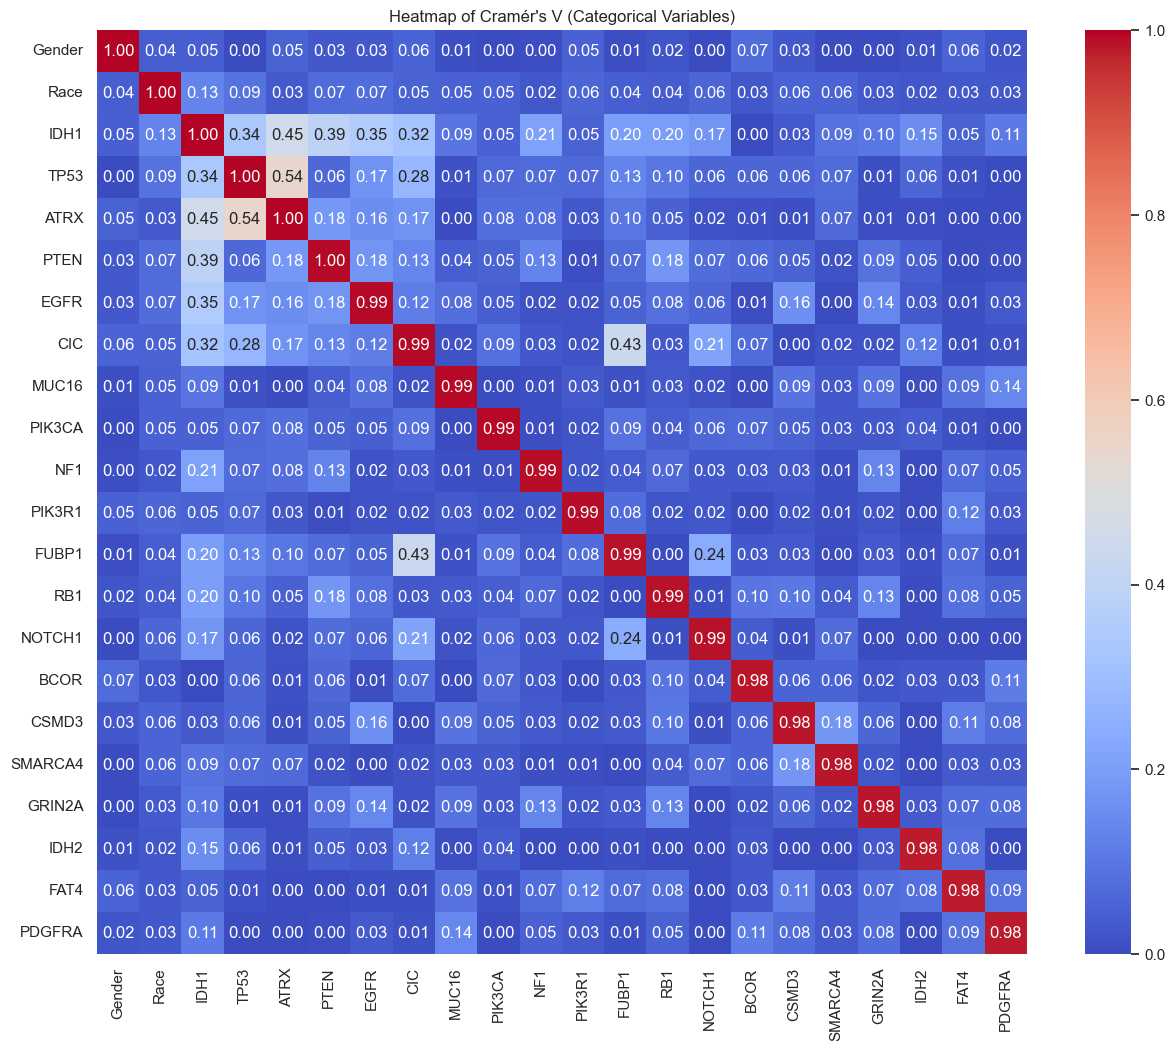

In [12]:

from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 计算Cramér's V
def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# 创建分类变量子集
df_cat = df.drop(columns=['Age_at_diagnosis','label'])

# 计算相关性矩阵
variables = df_cat.columns
corr_matrix = pd.DataFrame(index=variables, columns=variables)


for var1 in variables:
    for var2 in variables:
        corr_matrix.loc[var1, var2] = cramers_v(df_cat[var1], df_cat[var2])

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Cramér\'s V (Categorical Variables)')
plt.show()


In [13]:
df

Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0         0             51.30     0     1     0     0     0     0    0      0   
1         0             38.72     0     1     0     0     0     0    1      0   
2         0             35.17     0     1     1     1     0     0    0      0   
3         1             32.78     0     1     1     1     0     0    0      1   
4         0             31.51     0     1     1     1     0     0    0      0   
..      ...               ...   ...   ...   ...   ...   ...   ...  ...    ...   
834       1             77.89     0     0     0     0     1     0    0      0   
835       0             85.18     0     0     1     0     1     0    0      0   
836       1             77.49     0     0     1     0     1     0    0      0   
837       0             63.33     0     0     1     0     0     0    0      1   
838       0             76.61     1     0     0     0     0     0    0      0   

     ...  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  label  
0    ...    0       0     0      0        0       0     0     0       0      0  
1    ...    0       0     0      0        0       0     0     0       0      0  
2    ...    0       0     0      0        0       0     0     0       0      0  
3    ...    0       0     0      0        0       0     0     1       0      0  
4    ...    0       0     0      0        0       0     0     0       0      0  
..   ...  ...     ...   ...    ...      ...     ...   ...   ...     ...    ...  
834  ...    0       0     0      0        0       0     0     0       0      1  
835  ...    0       0     0      0        0       0     0     0       0      1  
836  ...    0       0     0      0        0       0     0     0       0      1  
837  ...    1       0     0      0        0       0     0     0       0      1  
838  ...    0       0     0      0        0       0     0     0       0      1  

[839 rows x 24 columns]

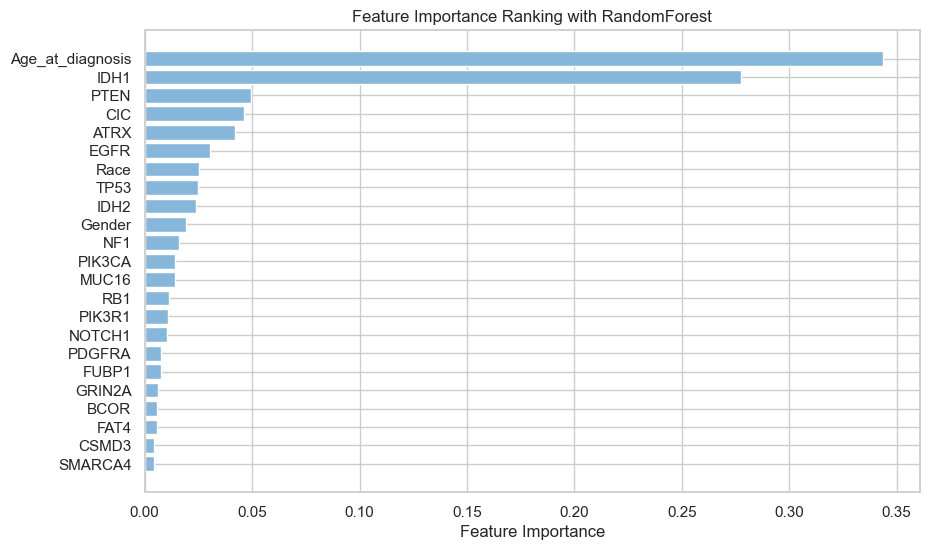

['random_forest_model.pkl']

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import joblib

# 创建随机森林分类器
rf_classifier = RandomForestClassifier()

# 提取特征和标签
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 标签

# 训练模型
rf_classifier.fit(X, y)

# 计算特征重要性
feature_importance = rf_classifier.feature_importances_

# 可视化特征重要性
feature_names = df.columns[:-1]  # 不包括最后一列标签
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center',color='#86B7DB')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Ranking with RandomForest')
plt.gca().invert_yaxis()  # 反转 y 轴顺序，使得特征重要性高的在上面
plt.show()

# 保存随机森林模型
joblib.dump(rf_classifier, 'random_forest_model.pkl')

Average AUC: 0.9145796529955363
IDH1: 0.6063543228969696
IDH2: 0.38695298318499766
TP53: 0.07402643379788616
PTEN: 0.07398226281943152
NF1: 0.06035964726535902
PIK3R1: 0.03957175460907921
NOTCH1: 0.02837705325478852
CIC: 0.021768800820068553
GRIN2A: 0.019179977929059233
MUC16: 0.016488334072805696
Race: 0.011025020230910112
Age_at_diagnosis: 0.005363693984806023
Gender: 0.0049359429716601694
EGFR: 0.0020639363556124403
ATRX: 0.0
PIK3CA: 0.0
FUBP1: 0.0
RB1: 0.0
BCOR: 0.0
CSMD3: 0.0
SMARCA4: 0.0
FAT4: 0.0
PDGFRA: 0.0


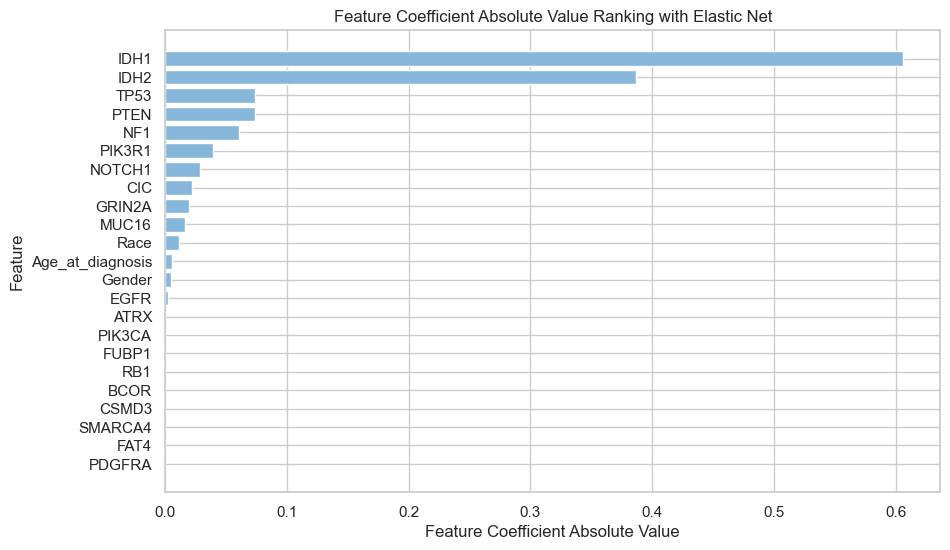

['elastic_net_model.pkl']

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
import matplotlib.pyplot as plt
import joblib

# 准备特征和标签
X = df.drop(columns=['label'])  # 特征
y = df['label']  # 标签

# 使用五折交叉验证获取特征重要性的平均值
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 设置正则化参数
l1_ratio = 0.9
elastic_net = ElasticNetCV(l1_ratio=l1_ratio, cv=kf, random_state=42)

# 使用交叉验证计算 AUC
cv_scores = cross_val_score(elastic_net, X, y, cv=kf, scoring=make_scorer(roc_auc_score))
print(f'Average AUC: {cv_scores.mean()}')

# 拟合模型
elastic_net.fit(X, y)

# 获取特征重要性
feature_importances = np.abs(elastic_net.coef_)

# 将特征重要性与特征名对应起来并排序
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 打印特征重要性排序
for feature, importance in sorted_feature_importances:
    print(f'{feature}: {importance}')

# 可视化特征重要性排序
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), [val[1] for val in sorted_feature_importances], align='center', color='#86B7DB')
plt.yticks(range(len(sorted_feature_importances)), [val[0] for val in sorted_feature_importances])
plt.xlabel('Feature Coefficient Absolute Value')
plt.ylabel('Feature')
plt.title('Feature Coefficient Absolute Value Ranking with Elastic Net')
plt.gca().invert_yaxis()  # 反转 y 轴顺序，使得特征重要性高的在上面
plt.show()

# 保存 Elastic Net 模型
joblib.dump(elastic_net, 'elastic_net_model.pkl')


In [16]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet
import joblib
import pandas as pd

# 加载之前保存的模型
rf_model = joblib.load('random_forest_model.pkl')
en_model = joblib.load('elastic_net_model.pkl') 

# 创建递归特征消除模型
def recursive_feature_elimination(X, y, rf_model, elastic_net_model, n_features_to_select=14):
    # 1. 使用随机森林的特征重要性评分
    rf_selector = RFE(rf_model, n_features_to_select=n_features_to_select)
    rf_selector = rf_selector.fit(X, y)
    
    # 2. 获取被选中的特征
    selected_features_rf = X.columns[rf_selector.support_]

    # 3. 使用弹性网回归的特征选择
    en_selector = RFE(elastic_net_model, n_features_to_select=n_features_to_select)
    en_selector = en_selector.fit(X, y)
    
    # 4. 获取被选中的特征
    selected_features_elastic_net = X.columns[en_selector.support_]

    # 5. 取两种方法的交集作为最终选定的特征
    selected_features = list(set(selected_features_rf) & set(selected_features_elastic_net))
    
    return selected_features

# 加载数据
X = df.drop(columns=['label'])  # 特征
y = df['label']  # 标签

# 调用递归特征消除函数
selected_features = recursive_feature_elimination(X, y, rf_model, en_model)

# 保留选定的特征为新的 DataFrame df1
df1 = df[selected_features + ['label']]

df1


EGFR  TP53  Race  IDH2  Gender  NF1  MUC16  Age_at_diagnosis  PTEN  IDH1  \
0       0     0     0     0       0    0      0             51.30     0     1   
1       0     0     0     0       0    0      0             38.72     0     1   
2       0     1     0     0       0    0      0             35.17     0     1   
3       0     1     0     0       1    0      1             32.78     0     1   
4       0     1     0     0       0    0      0             31.51     0     1   
..    ...   ...   ...   ...     ...  ...    ...               ...   ...   ...   
834     0     0     0     0       1    0      0             77.89     1     0   
835     0     1     0     0       0    0      0             85.18     1     0   
836     0     1     0     0       1    0      0             77.49     1     0   
837     0     1     0     0       0    0      1             63.33     0     0   
838     0     0     1     0       0    0      0             76.61     0     0   

     CIC  label  
0      0      0  
1      1      0  
2      0      0  
3      0      0  
4      0      0  
..   ...    ...  
834    0      1  
835    0      1  
836    0      1  
837    0      1  
838    0      1  

[839 rows x 12 columns]

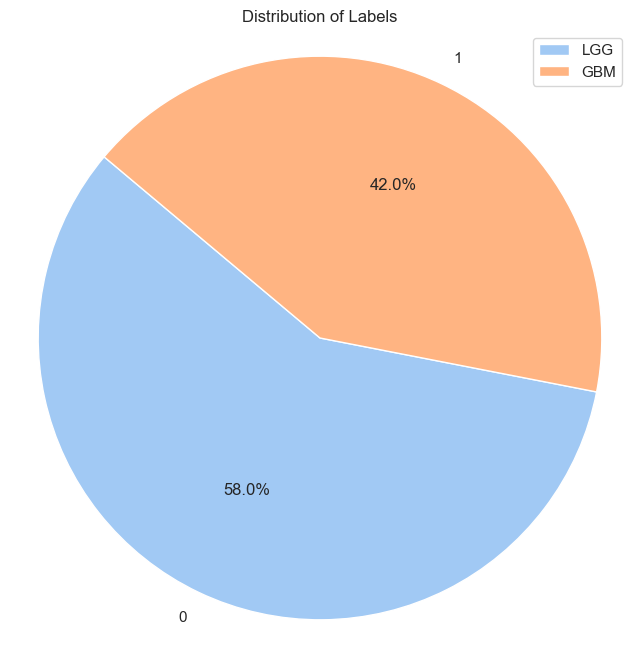

In [17]:
import matplotlib.pyplot as plt

# 假设 label_counts 是从 df1 中计算得到的标签统计数据
label_counts = df1['label'].value_counts()

# 创建一个新的 figure，并设置整体大小
plt.figure(figsize=(8, 8))

# 绘制饼图
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # 使饼图长宽相等

# 修改图例标签
plt.legend(labels=['LGG', 'GBM'])

plt.show()


In [18]:
df2=df1
df2

EGFR  TP53  Race  IDH2  Gender  NF1  MUC16  Age_at_diagnosis  PTEN  IDH1  \
0       0     0     0     0       0    0      0             51.30     0     1   
1       0     0     0     0       0    0      0             38.72     0     1   
2       0     1     0     0       0    0      0             35.17     0     1   
3       0     1     0     0       1    0      1             32.78     0     1   
4       0     1     0     0       0    0      0             31.51     0     1   
..    ...   ...   ...   ...     ...  ...    ...               ...   ...   ...   
834     0     0     0     0       1    0      0             77.89     1     0   
835     0     1     0     0       0    0      0             85.18     1     0   
836     0     1     0     0       1    0      0             77.49     1     0   
837     0     1     0     0       0    0      1             63.33     0     0   
838     0     0     1     0       0    0      0             76.61     0     0   

     CIC  label  
0      0      0  
1      1      0  
2      0      0  
3      0      0  
4      0      0  
..   ...    ...  
834    0      1  
835    0      1  
836    0      1  
837    0      1  
838    0      1  

[839 rows x 12 columns]

In [19]:
#寻找次优解: 即使固定了一些参数，随机搜索仍可以帮助你找到在给定参数范围内的次优解。有时候，即使固定了一些参数，随机搜索也能找到比默认值更好的参数组合。

#探索参数空间: 随机搜索可以帮助你更全面地探索参数空间，特别是当对模型的参数影响不确定或者希望验证不同参数组合对模型性能的影响时。

#自动化调参: 随机搜索是自动化调参的一种有效方法，可以帮助节省手动调参的时间和精力。

#对训练集进行smote采样

#五折交叉验证寻找最佳参数 以及在训练集评估模型性能

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}


C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.91640625 0.92405063 0.91566456 0.96044304 0.94493671]
Mean CV Accuracy: 0.9323002373417723
Accuracy: 0.8511904761904762
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.80      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.909401223154601


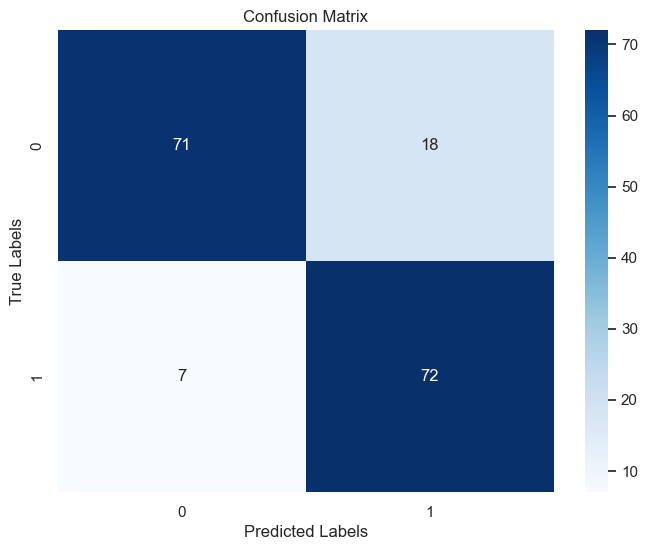

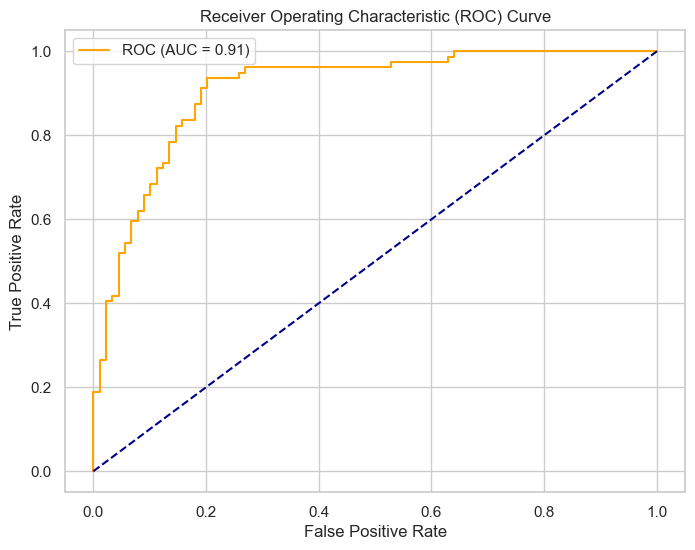

['MLP_best_model.pkl']

In [20]:
import os
os.environ['JOBLIB_TEMP_FOLDER'] = '/tmp'
import joblib
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# 假设 df2 的特征和标签已经准备好
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义随机搜索的参数分布
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# 使用随机搜索和五折交叉验证找到最佳参数
random_search = RandomizedSearchCV(
    MLPClassifier(max_iter=250, random_state=42, alpha=1.5),  # 固定 L2 正则化参数
    param_distributions=param_dist,
    n_iter=32,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2,
    scoring='roc_auc'  # 评价指标改为AUC
)

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 结合随机搜索的最佳参数和固定超参数初始化 MLPClassifier
best_clf = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    
    solver=best_params['solver'],
    alpha=1.5,                    # 固定的 L2 正则化参数
    learning_rate=best_params['learning_rate'],
    early_stopping=True,             # 固定的早停策略
    max_iter=250,                    # 固定的最大迭代次数
    validation_fraction=0.1,         # 使用 10% 训练数据用于验证
    n_iter_no_change=2,             # 提早停止
    random_state=42
)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5,scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存模型
joblib.dump(best_clf, "MLP_best_model.pkl")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'kernel': 'linear', 'gamma': 'scale'}
Cross-Validation Scores: [0.91       0.92768987 0.91202532 0.94699367 0.94889241]
Mean CV Accuracy: 0.9291202531645568
Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.9068411321291424


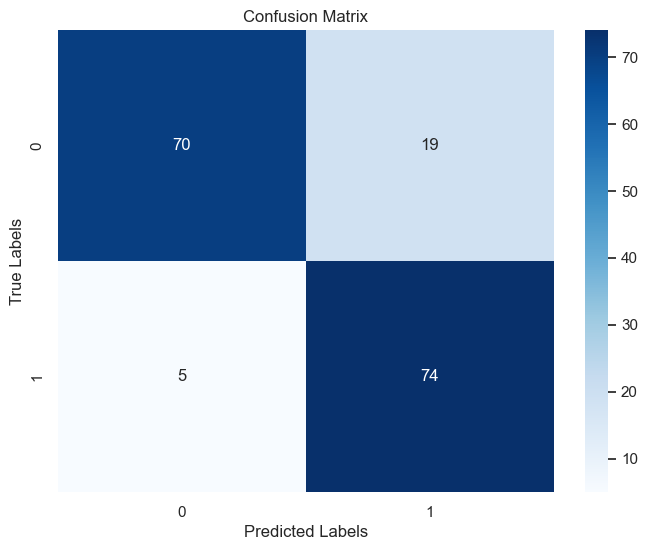

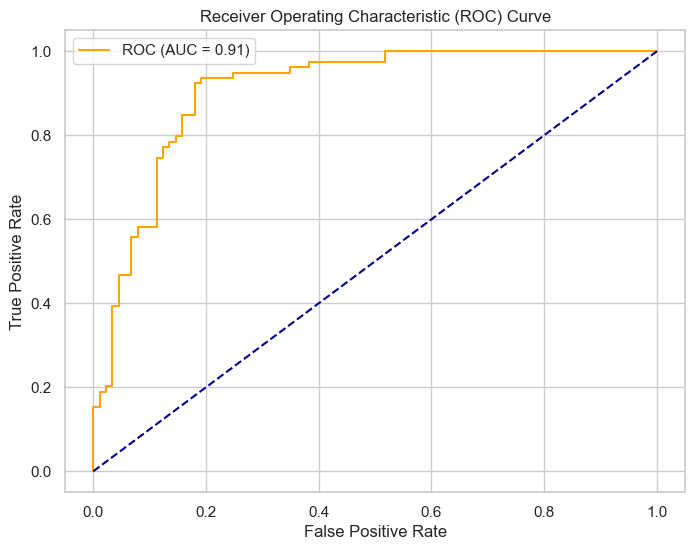

['SVC_best_model.pkl']

In [21]:
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# 设置joblib使用的临时文件夹
os.environ['JOBLIB_TEMP_FOLDER'] = '/tmp'

# 假设 df2 的特征和标签已经准备好
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义固定的抗过拟合超参数
fixed_params = {
    'random_state': 42,
    'C': 1.0,  # 固定的正则化参数
    'probability': True  # 计算概率
}

# 初始化支持向量机分类器，使用固定超参数
clf = SVC(**fixed_params)

# 定义随机搜索的参数分布（不包括固定参数）
param_dist = {
    'kernel': ['linear', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]  # 扩展gamma的搜索范围
}

# 使用随机搜索和五折交叉验证找到最佳参数
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=8,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2,
    scoring='roc_auc'
)

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5,scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存模型
joblib.dump(best_clf, "SVC_best_model.pkl")

使用了sklearn库中的SVC来初始化一个支持向量机（SVM）分类器。SVC是sklearn.svm模块中的一个类，用于实现支持向量机，该算法可以用于分类和回归任务。以下是SVC的一些默认参数和它们的含义：

C: 正则化参数，控制错误分类的惩罚程度。默认情况下，这个参数是1.0。

kernel: 用于分类的核函数类型。默认情况下，这个参数是'rbf'，表示使用径向基函数（Radial Basis Function）作为核函数。

degree: 多项式核函数的度数。默认情况下，这个参数是3。

gamma: 核函数的参数，定义单个训练样本的影响范围，'scale'表示1 / (n_features * X.var())，'auto'表示1 / n_features。默认情况下，这个参数是'scale'。

coef0: 多项式核函数的独立项。默认情况下，这个参数是0.0。

probability: 启用概率估计，当设置为True时，SVC会使用额外的训练时间来计算每个类的概率估计。默认情况下，这个参数是False。

shrinking: 是否启用缩减。默认情况下，这个参数是True，表示在训练时进行缩减，这可以提高模型的训练效率。

tol: 停止训练的容忍度。默认情况下，这个参数是0.001。

cache_size: 用于训练的内存大小（以字节为单位）。默认情况下，这个参数是20000。

class_weight: 指定权重给每个类别，可以是字典、列表或'balanced'。默认情况下，这个参数是None。

verbose: 控制训练过程中的输出信息。默认情况下，这个参数是False。

max_iter: 最大迭代次数。默认情况下，这个参数是-1，表示使用默认的最大迭代次数。

在您的代码中，您设置了probability=True，这是为了计算每个样本的预测概率，从而能够计算ROC曲线和AUC值。random_state=42是为了确保结果的可重复性。

Best Parameters: {'splitter': 'best', 'max_features': 'sqrt', 'criterion': 'gini'}
Cross-Validation Scores: [0.9065625  0.93370253 0.9028481  0.92705696 0.94762658]
Mean CV Accuracy: 0.923559335443038
Accuracy: 0.8452380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        89
           1       0.79      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



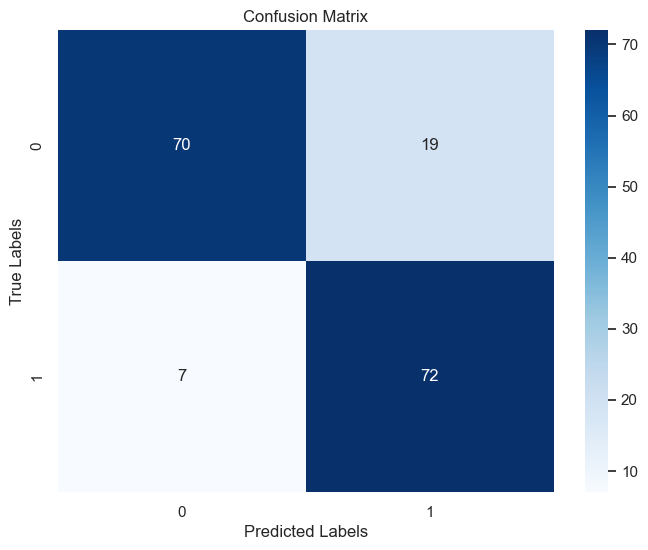

AUC: 0.8842269947375907


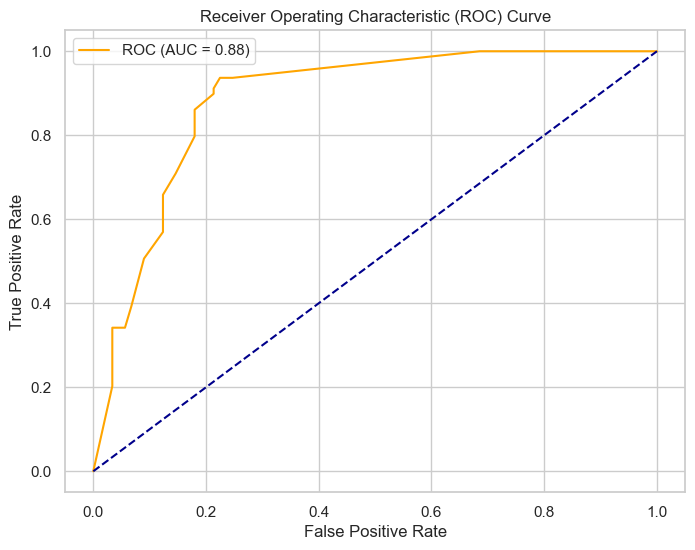

['DecisionTreeClassifier_best_model.pkl']

In [22]:

import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# 设置joblib使用的临时文件夹
os.environ['JOBLIB_TEMP_FOLDER'] = '/tmp'

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 初始化决策树分类器，设置抗过拟合的超参数
clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=9, min_samples_leaf=6)

# 定义参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}

# 使用随机参数搜索法和五折交叉验证
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42,scoring='roc_auc')

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5,scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]
    
# 计算AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存最佳模型
joblib.dump(random_search.best_estimator_, "DecisionTreeClassifier_best_model.pkl")

Best Parameters: {'n_estimators': 50, 'max_features': 'sqrt', 'learning_rate': 0.05}
Cross-Validation Scores: [0.9109375  0.92531646 0.90268987 0.96669304 0.95308544]
Mean CV AUC: 0.9317444620253165
Accuracy: 0.8452380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        89
           1       0.79      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



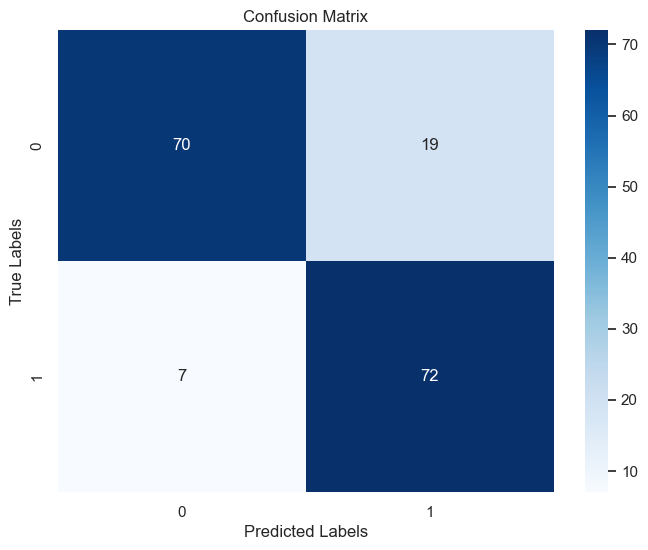

AUC: 0.9113924050632911


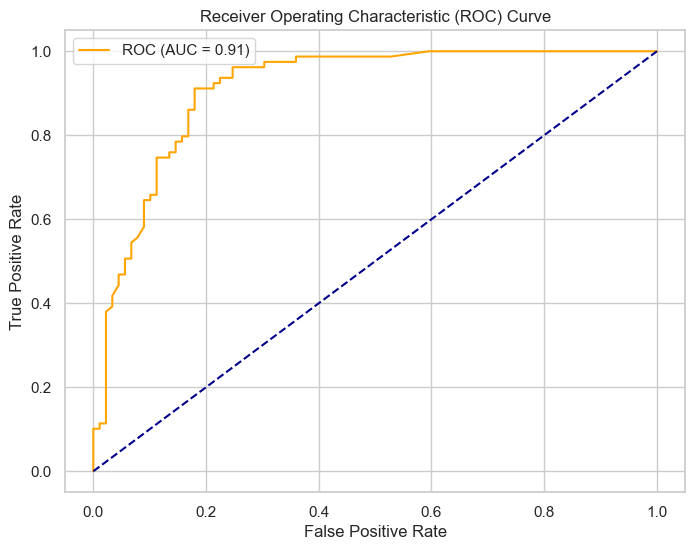

['GradientBoostingClassifier_best_model.pkl']

In [23]:
import os
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib import parallel_backend
from imblearn.over_sampling import SMOTE

# 设置joblib使用的临时文件夹
os.environ['JOBLIB_TEMP_FOLDER'] = '/tmp'

# 假设 df2 的特征和标签已经准备好
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义固定的抗过拟合超参数
fixed_params = {
    'random_state': 42,
    'max_depth': 5,  # 降低树的深度
    'min_samples_split': 5,  # 增加分裂的最小样本数
    'min_samples_leaf': 2  # 增加叶子节点的最小样本数
}

# 初始化梯度提升决策树分类器，使用固定超参数
clf = GradientBoostingClassifier(**fixed_params)

# 定义参数网格供随机参数搜索法使用
param_grid = {
    'n_estimators': [25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],  # 降低学习率
    'max_features': [None, 'sqrt', 'log2']
}

# 使用随机参数搜索法和五折交叉验证
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, scoring='roc_auc')

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]

# 计算AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存最佳模型
joblib.dump(random_search.best_estimator_, "GradientBoostingClassifier_best_model.pkl")



使用了sklearn库中的DecisionTreeClassifier来初始化一个决策树分类器。DecisionTreeClassifier是sklearn.tree模块中的一个类，用于实现决策树算法，该算法可以用于分类任务。以下是DecisionTreeClassifier的一些默认参数和它们的含义：

criterion: 用于衡量分裂质量的函数。默认情况下，这个参数是'gini'，表示使用基尼不纯度（Gini impurity）作为分裂质量的衡量标准。

splitter: 用于在节点分裂时选择分裂的策略。默认情况下，这个参数是'best'，表示选择最佳分裂。

max_depth: 树的最大深度。默认情况下，这个参数是None，意味着树会生长到所有叶子都是纯净的，即没有进一步的分裂。

min_samples_split: 分裂内部节点所需的最小样本数。默认情况下，这个参数是2。

min_samples_leaf: 叶节点中的最小样本数。默认情况下，这个参数是1。

min_weight_fraction_leaf: 叶节点中的最小权重分数。默认情况下，这个参数是0.0。

max_features: 寻找最佳分裂时考虑的特征数量。默认情况下，这个参数是None，意味着使用所有特征。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

max_leaf_nodes: 最大叶节点数。默认情况下，这个参数是None，意味着没有限制。

min_impurity_decrease: 如果节点分裂导致不纯度的减少大于或等于这个值，则节点将会分裂。默认情况下，这个参数是0.0。

Best Parameters: {'n_estimators': 25, 'max_features': None, 'criterion': 'gini'}
Cross-Validation Scores: [0.89796875 0.92982595 0.90142405 0.94920886 0.94351266]
Mean CV Accuracy: 0.9243880537974685
Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



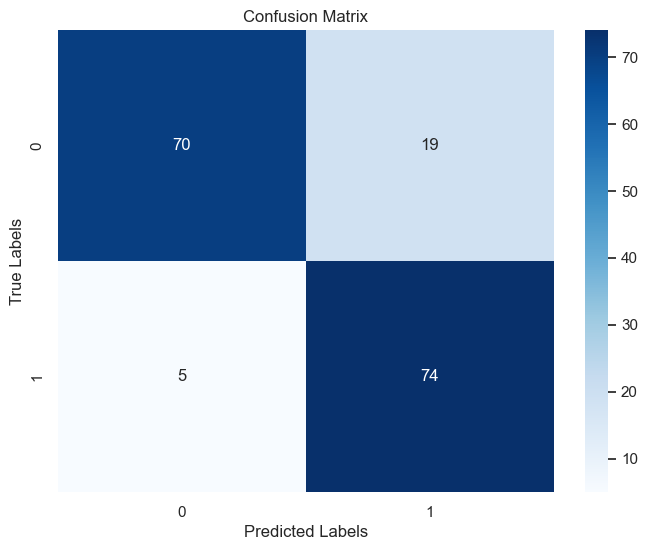

AUC: 0.9155881097994595


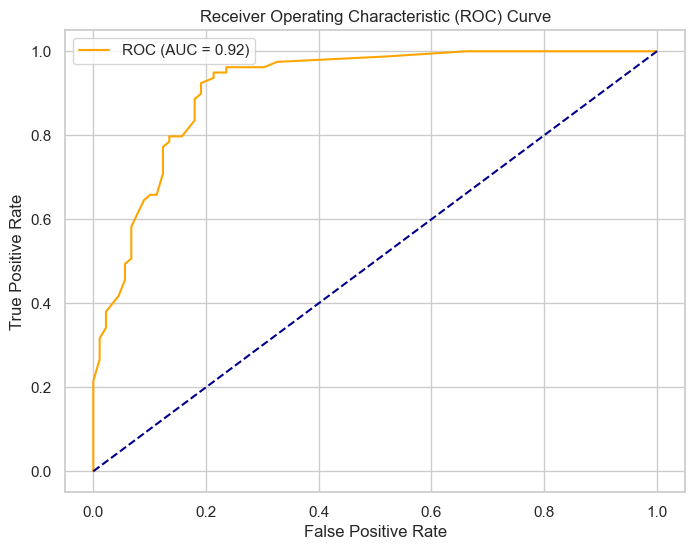

['RandomForestClassifier_best_model.pkl']

In [24]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib import parallel_backend
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE

# 初始化随机森林分类器，设置固定参数
clf = RandomForestClassifier(random_state=42, max_depth=3, min_samples_split=2, min_samples_leaf=1)

# 假设 df2 的特征和标签已经准备好
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义参数网格，排除已设置的固定参数
param_grid = {
    'n_estimators': [10, 25, 50],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# 使用随机参数搜索法和交叉验证
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=8, cv=5, random_state=42,scoring='roc_auc')

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5,scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]
    
# 计算AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存最佳模型
joblib.dump(best_clf, "RandomForestClassifier_best_model.pkl")

使用了sklearn库中的RandomForestClassifier来初始化一个随机森林分类器。RandomForestClassifier是sklearn.ensemble模块中的一个类，用于实现随机森林算法，该算法是一种集成学习方法，通过构建多个决策树并将它们的预测结果进行组合来提高分类性能。以下是RandomForestClassifier的一些默认参数和它们的含义：

n_estimators: 森林中树木的数量。默认情况下，这个参数是100。

criterion: 衡量分裂质量的函数。默认情况下，这个参数是'gini'，表示使用基尼不纯度作为衡量标准。

max_depth: 树的最大深度。默认情况下，这个参数是None，意味着树会生长到所有叶子都是纯净的。

min_samples_split: 分裂内部节点所需的最小样本数。默认情况下，这个参数是2。

min_samples_leaf: 叶节点中的最小样本数。默认情况下，这个参数是1。

min_weight_fraction_leaf: 叶节点中的最小权重分数。默认情况下，这个参数是0.0。

max_features: 寻找最佳分裂时考虑的特征数量。默认情况下，这个参数是'auto'，意味着对于分类问题，考虑所有特征；对于回归问题，考虑sqrt(n_features)。

max_leaf_nodes: 最大叶节点数。默认情况下，这个参数是None，意味着没有限制。

min_impurity_decrease: 如果节点分裂导致不纯度的减少大于或等于这个值，则节点将会分裂。默认情况下，这个参数是0.0。

bootstrap: 是否在构建树时使用bootstrap样本。默认情况下，这个参数是True，意味着会使用bootstrap方法。

oob_score: 是否使用袋外样本来估计R^2分数。默认情况下，这个参数是False。

n_jobs: 并行运行的作业数。默认情况下，这个参数是-1，意味着使用所有可用的CPU核心。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

verbose: 控制训练过程中的输出信息。默认情况下，这个参数是0，意味着不输出训练信息。

warm_start: 当设置为True时，重用之前层的权重，而不是从头开始训练。默认情况下，这个参数是False。

ccp_alpha: 用于最小化成本复杂性剪枝的复杂性参数。默认情况下，这个参数是0.0。

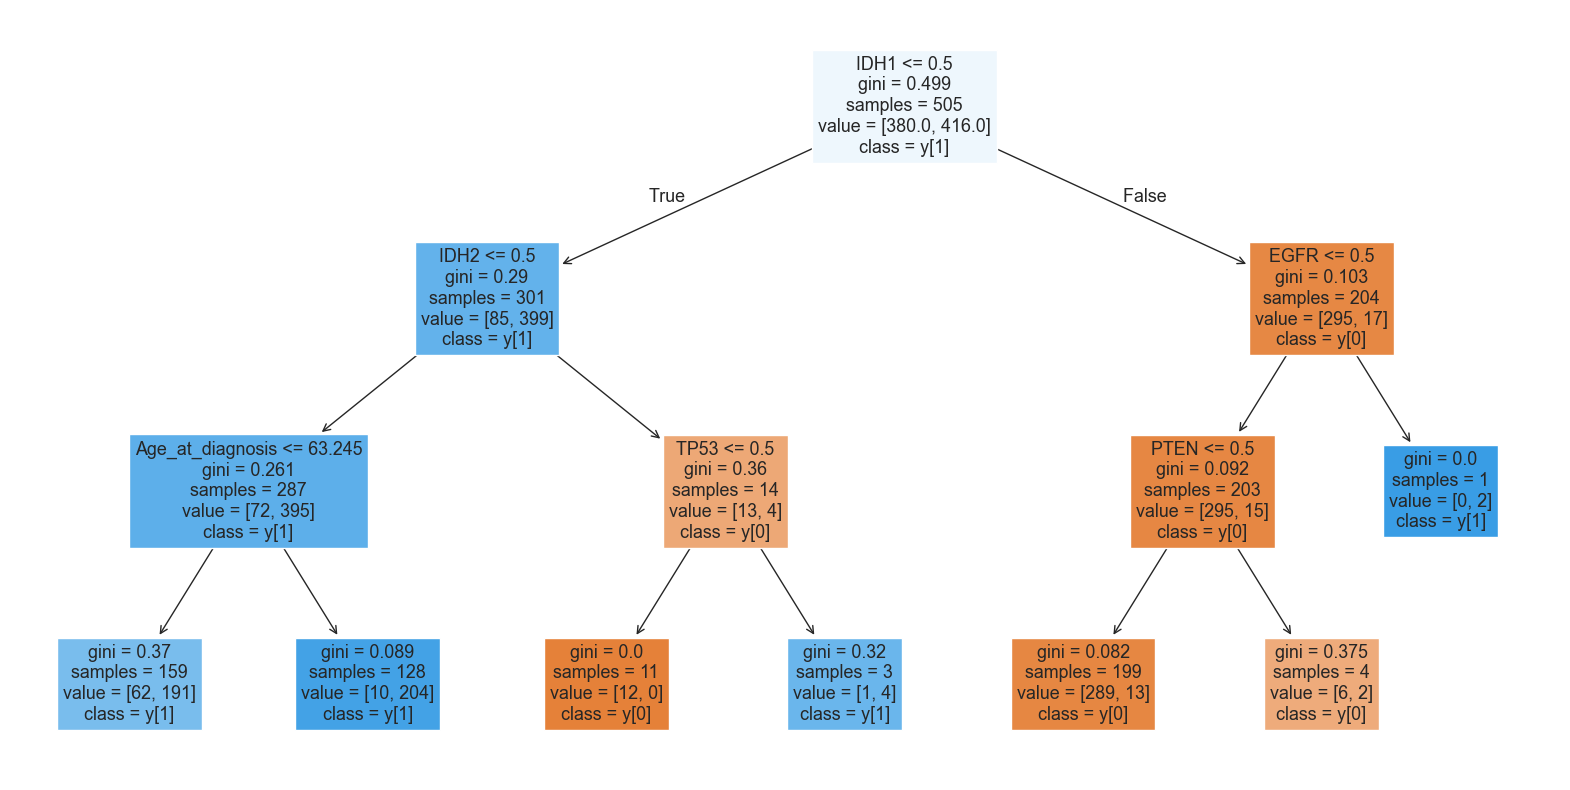

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib
from imblearn.over_sampling import SMOTE

# 初始化随机森林分类器
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")

# 假设 df2 的特征和标签已经准备好
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 训练模型
rf_model.fit(X_train_resampled, y_train_resampled)

# 获取第一棵树
first_tree = rf_model.estimators_[0]

# 绘制部分树
plt.figure(figsize=(20, 10))
plot_tree(first_tree, max_depth=3, filled=True, feature_names=X.columns, class_names=True)
plt.show()

Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6}
Cross-Validation Scores: [0.91429687 0.93876582 0.91503165 0.95822785 0.95799051]
Mean CV Accuracy: 0.936862539556962
Accuracy: 0.8630952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        89
           1       0.81      0.92      0.86        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168



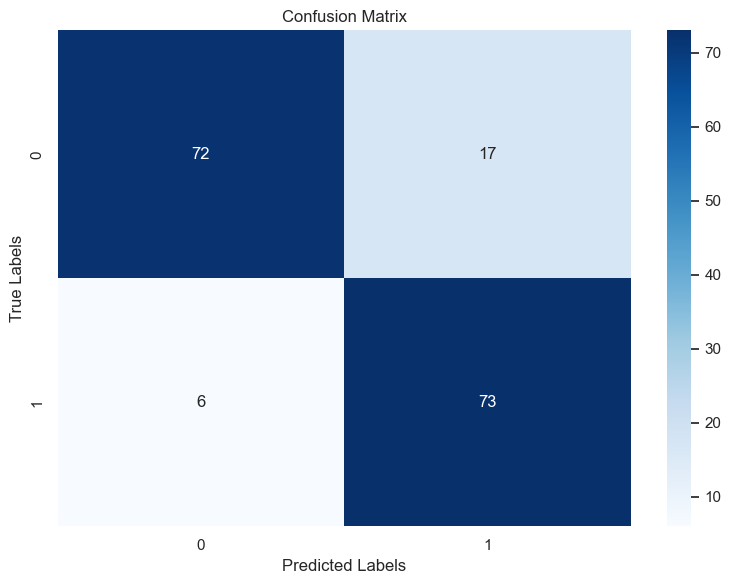

AUC: 0.9171526098705731


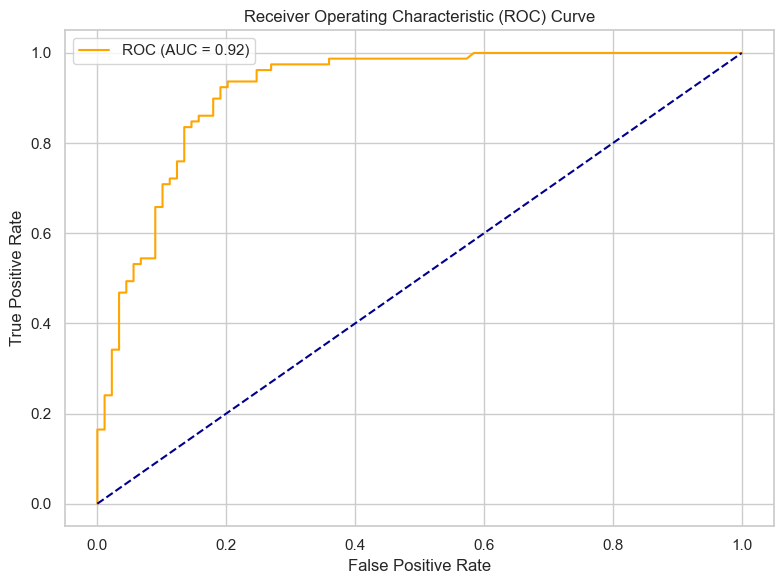

['xgb_best_model.pkl']

In [26]:
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

# 初始化XGBoost分类器，设置固定参数
clf = xgb.XGBClassifier(
    random_state=42,
    reg_alpha=0.1,  # L1正则化
    reg_lambda=1  # L2正则化
)

# 假设 df2 的特征和标签已经准备好
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义参数网格，包含L1和L2正则化
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# 使用随机参数搜索法和交叉验证
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, scoring='roc_auc')

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 输出最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 使用交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]
    
# 计算AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.tight_layout()
plt.show()

# 保存最佳模型
joblib.dump(best_clf, "xgb_best_model.pkl")




使用了xgboost库中的XGBClassifier来初始化一个XGBoost分类器。XGBoost是一种高效的梯度提升框架，它使用了梯度提升算法来构建决策树，并通过集成多个决策树来提高模型的预测性能。以下是XGBClassifier的一些默认参数和它们的含义：

booster: 指定XGBoost的模型类型，可以是'gbtree'（默认）或'gblinear'或'dart'。'gbtree'表示使用基于树的模型，'dart'表示使用与Dropout机制结合的模型。

use_label_encoder: 是否使用标签编码器。默认情况下，这个参数是False。

eval_metric: 评估模型性能的指标。默认情况下，这个参数是'mlogloss'，表示使用对数损失（log loss）作为评估指标。

objective: 学习任务和相应的学习目标。默认情况下，这个参数是'binary:logistic'，表示对于二分类问题使用逻辑回归损失函数。

n_estimators: 迭代次数，即构建的树的数量。默认情况下，这个参数是100。

learning_rate: 学习率，控制每次迭代更新的幅度。默认情况下，这个参数是0.3。

max_depth: 树的最大深度。默认情况下，这个参数是6。

min_child_weight: 决定最小叶子节点样本权重和。默认情况下，这个参数是0。

gamma: 节点分裂所需的最小损失函数下降值。默认情况下，这个参数是0。

subsample: 训练模型时随机选择的样本比例。默认情况下，这个参数是1，表示使用全部数据。

colsample_bytree: 构建树时的列采样比例。默认情况下，这个参数是1，表示使用全部特征。

colsample_bylevel: 在树的每一层进行的列采样比例。默认情况下，这个参数是1。

colsample_bynode: 在树的节点分裂过程中的列采样比例。默认情况下，这个参数是1。

lambda: L2 正则化项的权重，增加这个值会使模型更保守。默认情况下，这个参数是1.0。

alpha: L1 正则化项的权重，增加这个值也会使模型更保守。默认情况下，这个参数是0。

scale_pos_weight: 正权重与负权重的比例，用于处理不平衡数据集。默认情况下，这个参数是1。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

Best Parameters: {'subsample': 1.0, 'num_leaves': 10, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Cross-Validation Scores: [0.92320313 0.93583861 0.90411392 0.94327532 0.94707278]
Mean CV Accuracy: 0.9307007515822786
Accuracy: 0.8511904761904762
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.80      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168



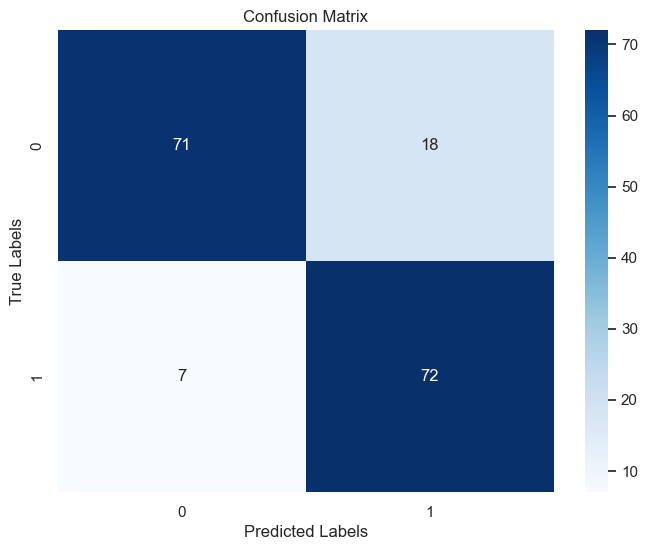

AUC: 0.9209927464087612


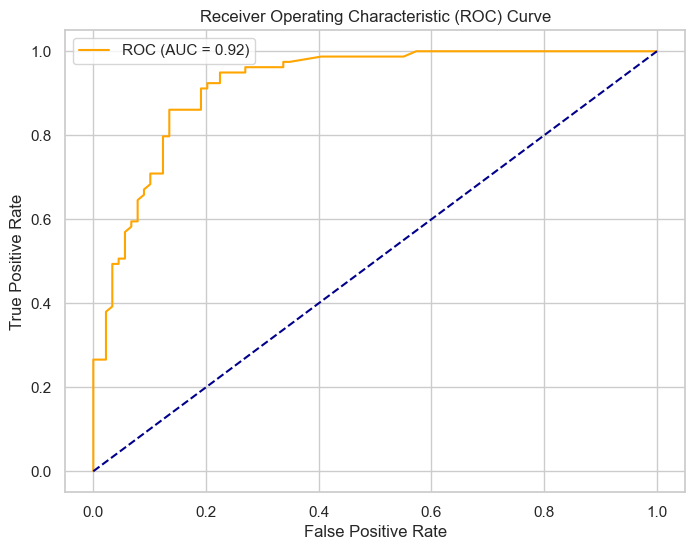

['lgb_best_model.pkl']

In [27]:
import joblib
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE


# 初始化LightGBM分类器，设置固定参数
clf = lgb.LGBMClassifier(random_state=42, max_depth=3, reg_alpha=0.1, reg_lambda=1,verbosity=-1)

# 准备特征标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义参数网格，排除已设置的固定参数
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [10, 20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 使用随机参数搜索法和交叉验证
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42,scoring='roc_auc')

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 输出最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 使用交叉验证评估模型性能
cv_scores = cross_val_score(best_clf,X_train_resampled, y_train_resampled, cv=5,scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]
    
# 计算AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存最佳模型
joblib.dump(best_clf, "lgb_best_model.pkl")

使用了lightgbm库中的LGBMClassifier来初始化一个LightGBM分类器。LightGBM是一种基于梯度提升框架的高效的机器学习算法，它使用了基于树的模型来提高预测性能。以下是LGBMClassifier的一些默认参数和它们的含义：

boosting_type: 指定Boosting类型。默认情况下，这个参数是'gbdt'，表示使用梯度提升决策树（Gradient Boosting Decision Tree）。

objective: 指定学习任务和目标函数。默认情况下，这个参数是'binary'，表示用于二分类问题的逻辑回归目标函数。

metric: 评估模型性能的指标。默认情况下，这个参数是'binary_logloss'，表示使用二分类对数损失。

num_leaves: 树中最大的叶子节点数。默认情况下，这个参数是31。

max_depth: 树的最大深度。默认情况下，这个参数是-1，表示不限制树的深度。

learning_rate: 学习率，控制每次迭代更新的幅度。默认情况下，这个参数是0.1。

n_estimators: 迭代次数，即构建的树的数量。默认情况下，这个参数是100。

subsample: 训练模型时随机选择的样本比例。默认情况下，这个参数是1，表示使用全部数据。

subsample_freq: 进行子采样的频率。默认情况下，这个参数是0，表示构建每棵树时都会进行子采样。

colsample_bytree: 构建树时的列采样比例。默认情况下，这个参数是1，表示使用全部特征。

min_child_samples: 分裂节点所需的最小数据量。默认情况下，这个参数是20。

min_child_weight: 分裂节点所需的最小权重和。默认情况下，这个参数是0.001。

max_delta_step: 每棵树的最大delta步长，用于防止过拟合。默认情况下，这个参数是0，表示不限制步长。

random_state: 控制随机数生成器的种子。默认情况下，这个参数是None，意味着每次运行的结果可能不同。您在代码中设置为42，这是为了确保结果的可重复性。

Best Parameters: {'C': 10}
Cross-Validation Scores: [0.90625    0.92911392 0.91281646 0.95537975 0.94636076]
Mean CV Accuracy: 0.9299841772151899
Accuracy: 0.8511904761904762
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.80      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168



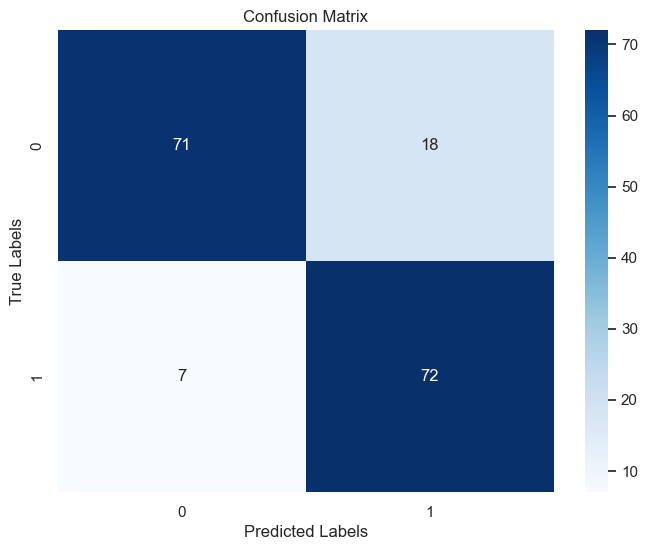

AUC: 0.9096856777129853


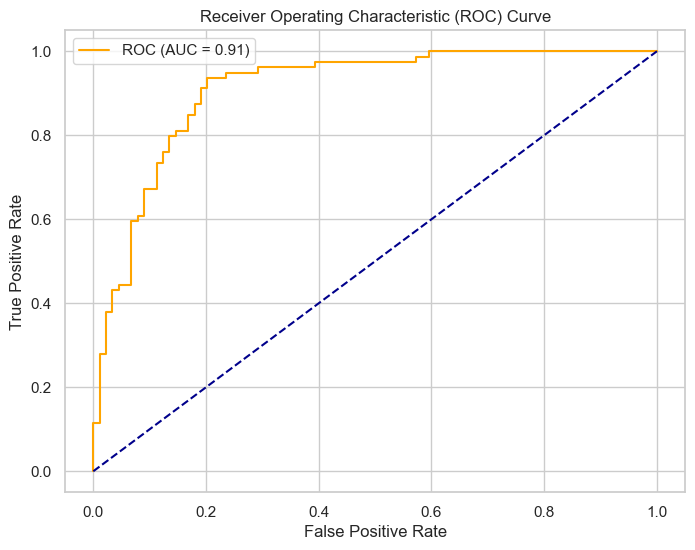

['LogisticRegression_best_model.pkl']

In [28]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# 准备特征标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 初始化逻辑回归分类器，设置固定参数
clf = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='liblinear')

# 定义参数网格，排除已设置的固定参数
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 创建RandomizedSearchCV对象
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=5, random_state=42,scoring='roc_auc' )

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 输出最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_clf = random_search.best_estimator_

# 使用交叉验证评估模型性能
cv_scores = cross_val_score(best_clf, X_train_resampled, y_train_resampled, cv=5,scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测
y_pred = best_clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 计算ROC曲线
y_scores = best_clf.predict_proba(X_test)[:, 1]

# 计算AUC值
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存最佳模型
joblib.dump(best_clf, "LogisticRegression_best_model.pkl")


Best Parameters: {'classifier__weights': 'uniform', 'classifier__p': 1, 'classifier__n_neighbors': 25, 'classifier__algorithm': 'ball_tree'}
Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.9158725643578438


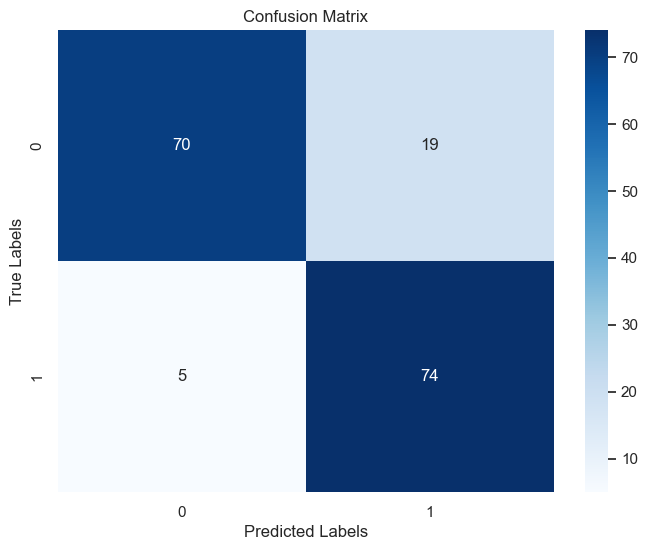

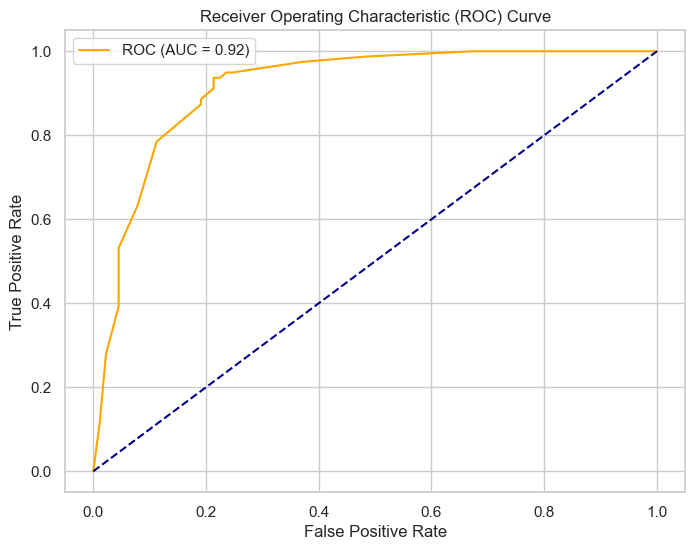

['KNeighborsClassifier_best_model.pkl']

In [29]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义预处理步骤
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 定义K近邻分类器
clf = KNeighborsClassifier()

# 创建管道
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf)])

# 定义参数网格，包括algorithm
param_grid = {
    'classifier__n_neighbors': range(5, 51),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # 添加algorithm选项
}

# 使用随机参数搜索法和交叉验证
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, scoring='roc_auc')

# 训练模型
random_search.fit(X_train_resampled, y_train_resampled)

# 输出最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 用最佳参数重新训练模型
best_pipeline = random_search.best_estimator_

# 预测
y_pred = best_pipeline.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 输出综合报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 计算ROC曲线
y_scores = best_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 计算AUC值
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 保存最佳模型
joblib.dump(best_pipeline, "KNeighborsClassifier_best_model.pkl")

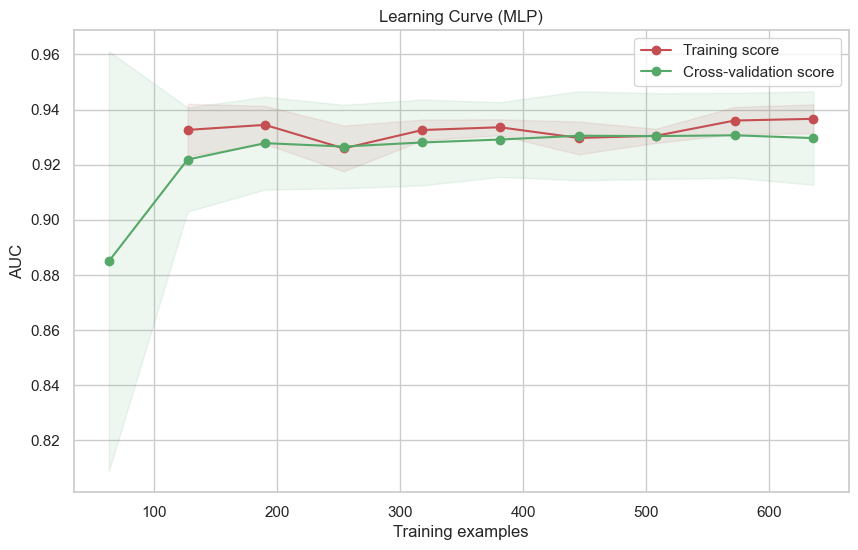

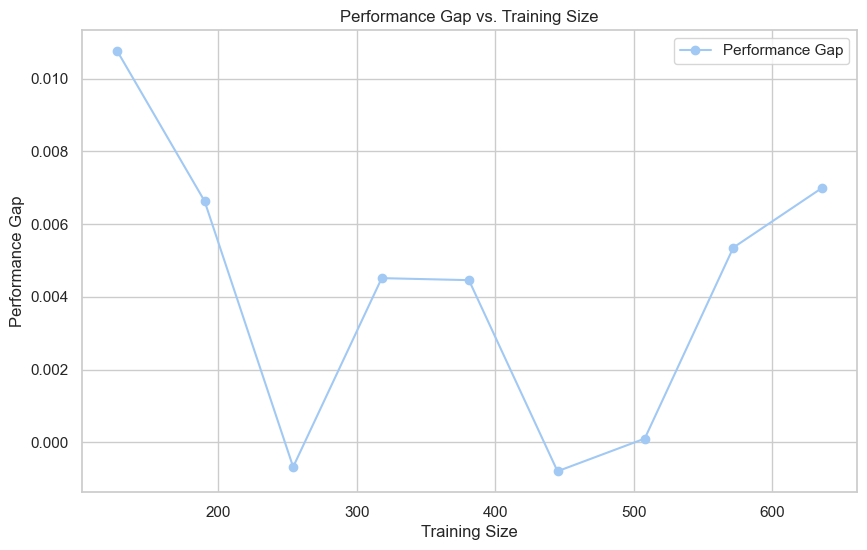

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [30]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

# 加载模型
mlp_model = joblib.load("MLP_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(mlp_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            mlp_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(mlp_model, X_train_resampled, y_train_resampled, title="Learning Curve (MLP)")

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\拯救者233\AppD

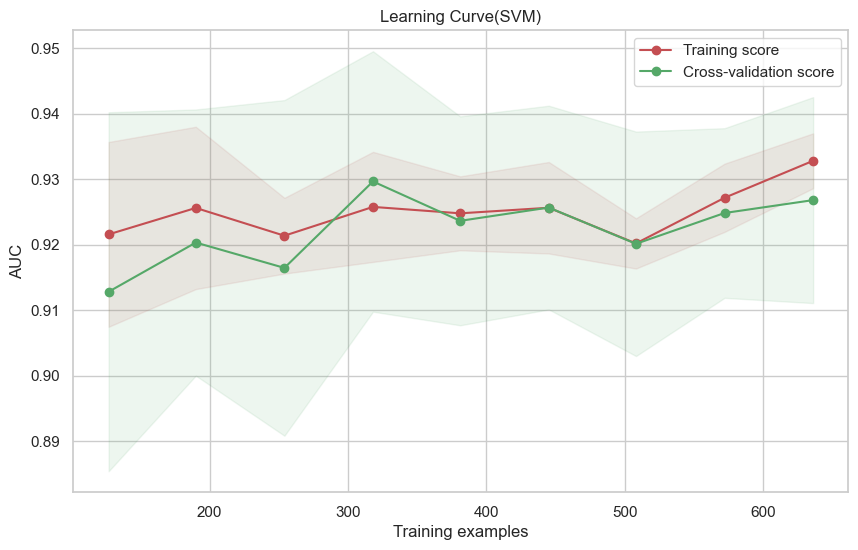

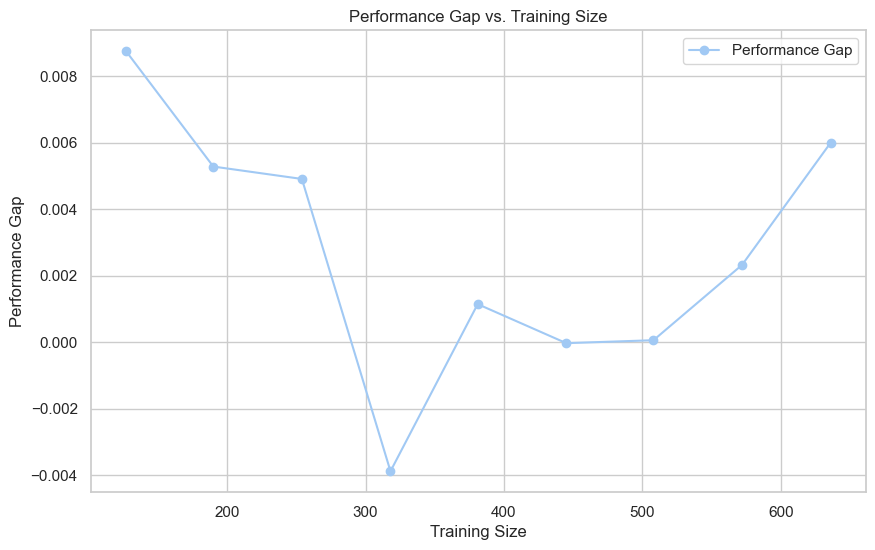

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [31]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
svc_model = joblib.load("SVC_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(svc_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            svc_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(svc_model, X_train_resampled, y_train_resampled, title="Learning Curve(SVM)")

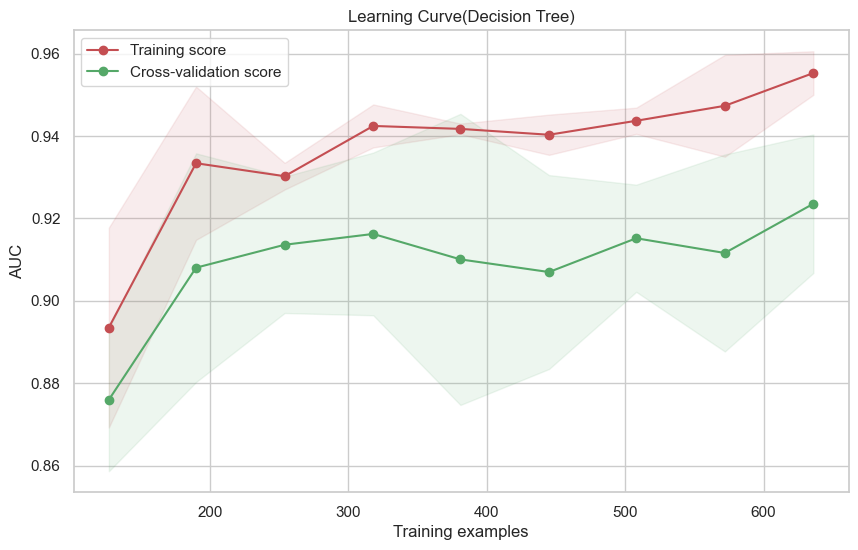

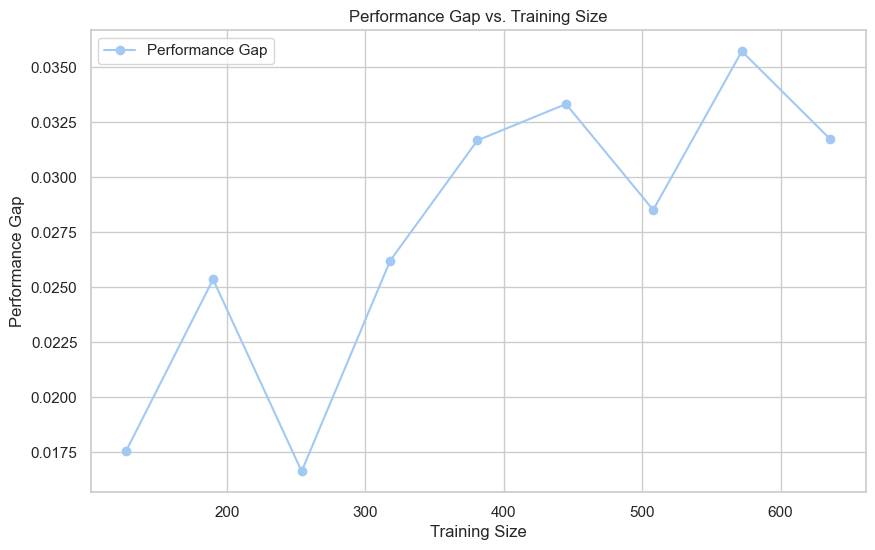

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [32]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(dc_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            dc_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(dc_model,X_train_resampled, y_train_resampled, title="Learning Curve(Decision Tree)")

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\拯救者233\AppD

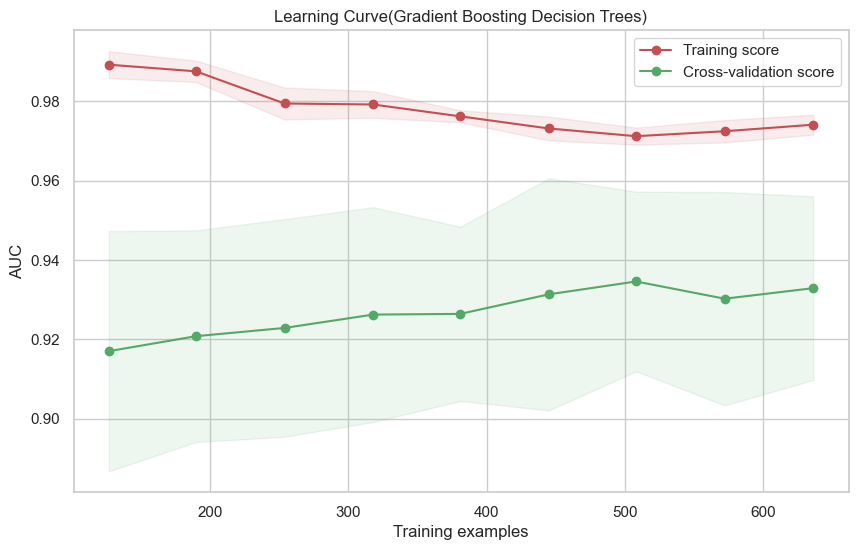

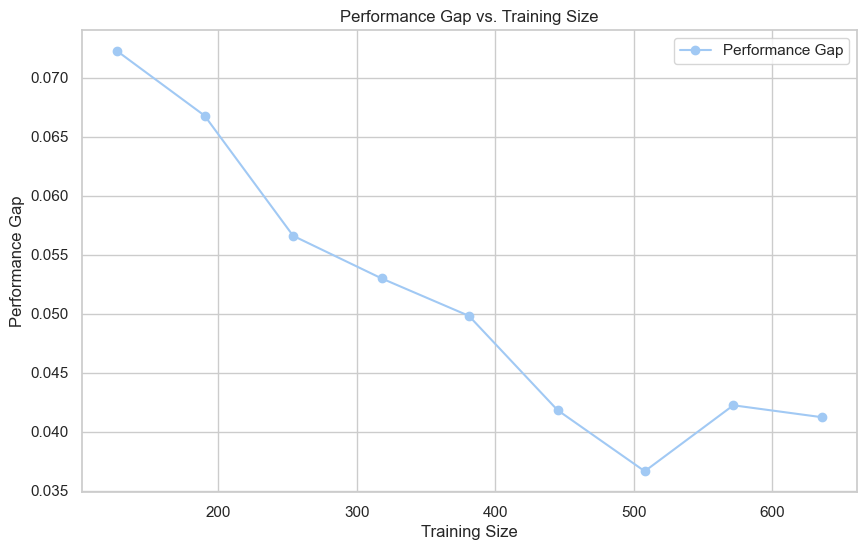

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [33]:

from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(gb_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            gb_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(gb_model, X_train_resampled, y_train_resampled, title="Learning Curve(Gradient Boosting Decision Trees)")

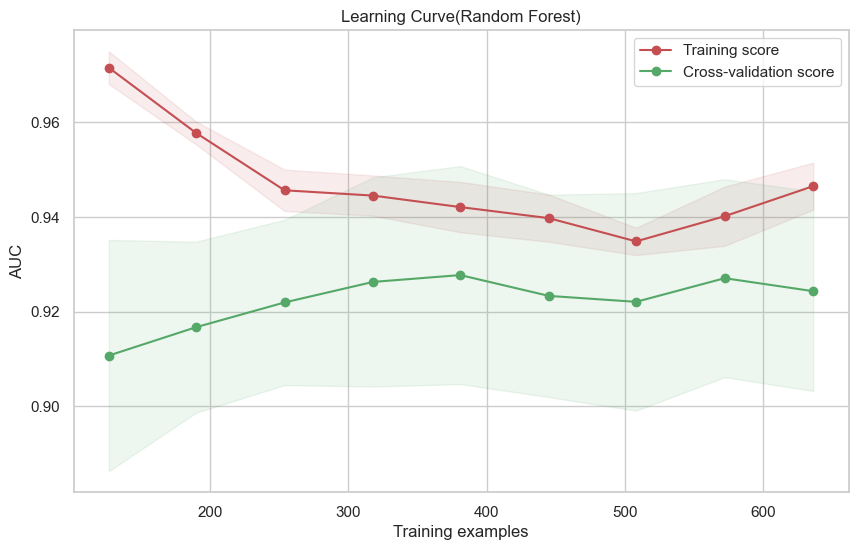

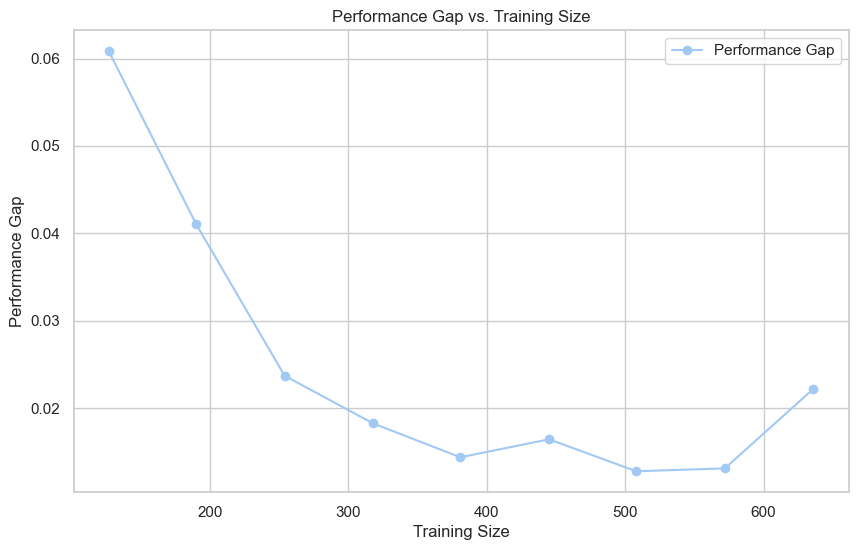

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [34]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(rf_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            rf_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(rf_model, X_train_resampled, y_train_resampled, title="Learning Curve(Random Forest)")

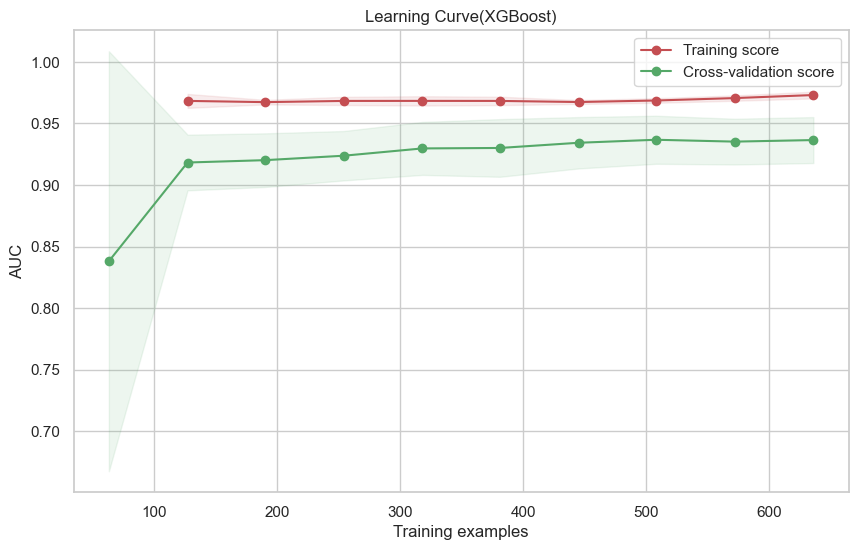

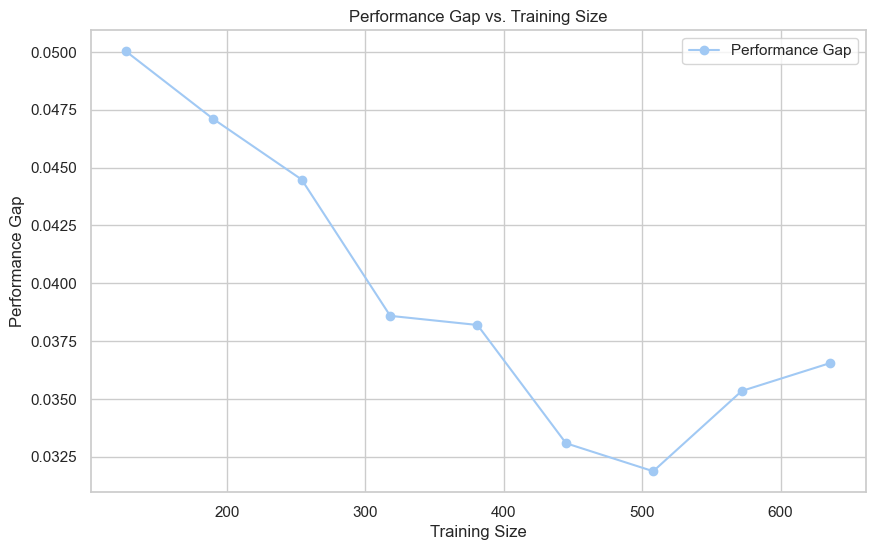

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [35]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
xgb_model = joblib.load("xgb_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(xgb_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            xgb_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(xgb_model, X_train_resampled, y_train_resampled, title="Learning Curve(XGBoost)")

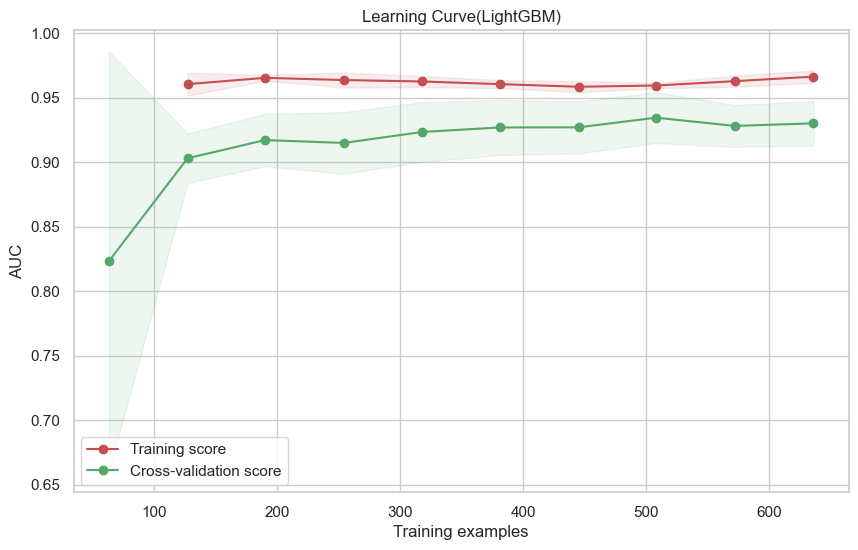

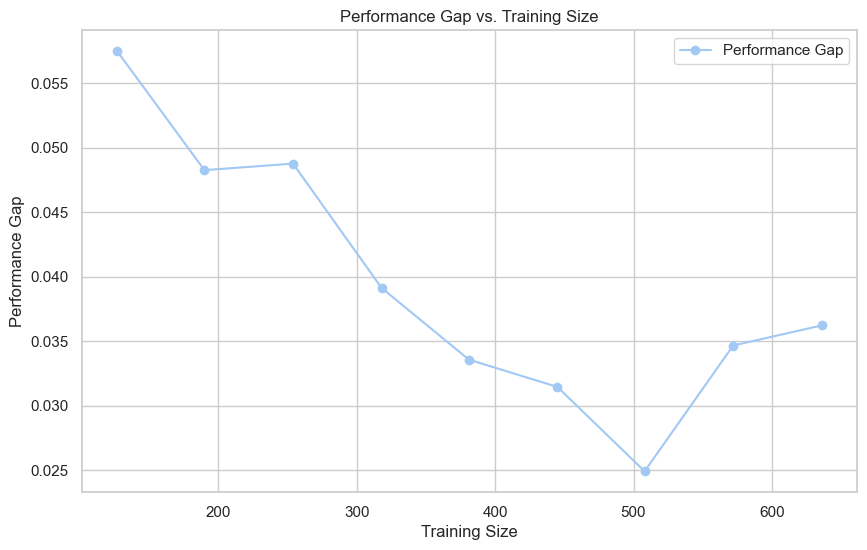

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [36]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
lgb_model = joblib.load("lgb_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(lgb_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            lgb_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(lgb_model, X_train_resampled, y_train_resampled, title="Learning Curve(LightGBM)")

label
0    398
1    273
Name: count, dtype: int64


C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\拯救者233\AppD

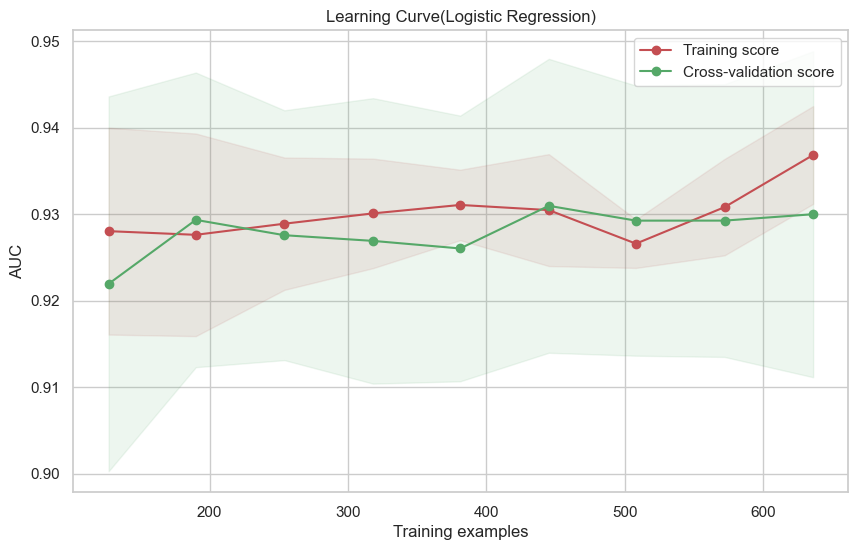

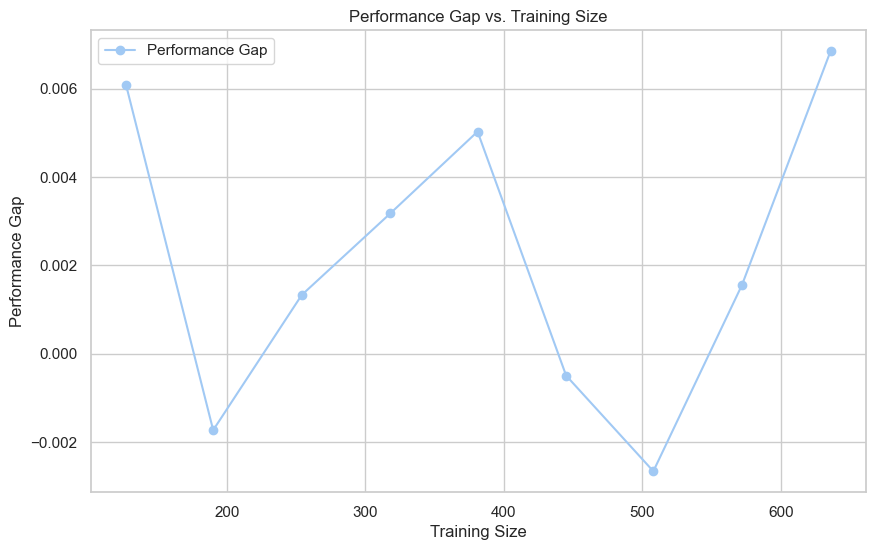

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [37]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
lr_model = joblib.load("LogisticRegression_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())


# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(lr_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            lr_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(lr_model, X_train_resampled, y_train_resampled, title="Learning Curve(Logistic Regression)")

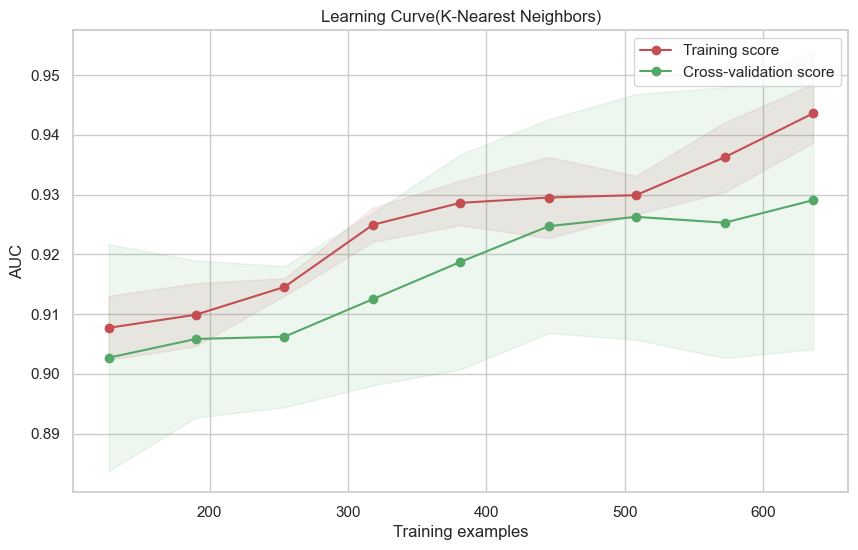

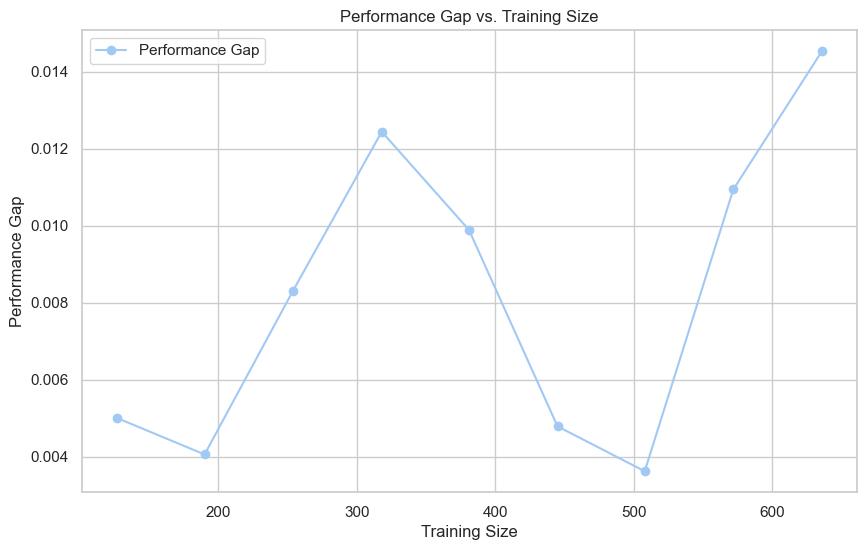

No clear evidence of overfitting based on the performance gap trend.
Mean performance gap: nan
Standard deviation of performance gap: nan


In [38]:
from sklearn.model_selection import train_test_split, learning_curve
import joblib
from imblearn.over_sampling import SMOTE
from joblib import parallel_backend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#加载模型
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 定义绘制学习曲线的函数
def plot_learning_curve(knn_model, X_train_resampled, y_train_resampled, title="Learning Curve", cv=5):
    with parallel_backend('loky', n_jobs=-1):
        train_sizes, train_scores, test_scores = learning_curve(
            knn_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='roc_auc', n_jobs=-1
        )

    # 计算平均值和标准差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.show()

    # 计算性能差距
    performance_gap = train_scores_mean - test_scores_mean

    # 绘制性能差距随训练样本数量变化的曲线
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, performance_gap, label='Performance Gap', marker='o')
    plt.xlabel('Training Size')
    plt.ylabel('Performance Gap')
    plt.title('Performance Gap vs. Training Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 分析性能差距的变化趋势
    coefficients = np.polyfit(train_sizes[:-1], performance_gap[:-1], 1)
    slope = coefficients[0]

    # 判断斜率是否显著为正，以判断是否存在过拟合风险
    slope_threshold = 0.001
    if slope > slope_threshold:
        print("Warning: Possible overfitting detected as the performance gap slope is positive and significant.")
    else:
        print("No clear evidence of overfitting based on the performance gap trend.")

    # 计算性能差距的平均值和标准差，以获取更多关于过拟合的信息
    mean_gap = np.mean(performance_gap)
    std_gap = np.std(performance_gap)
    print(f"Mean performance gap: {mean_gap:.4f}")
    print(f"Standard deviation of performance gap: {std_gap:.4f}")

    # 如果平均性能差距较大，或者标准差较大，也可能表明存在过拟合风险
    if mean_gap > 0.01 or std_gap > 0.01:
        print("Additional warning: Large mean or standard deviation of performance gap may indicate overfitting.")

# 调用函数绘制学习曲线
plot_learning_curve(knn_model, X_train_resampled, y_train_resampled, title="Learning Curve(K-Nearest Neighbors)")

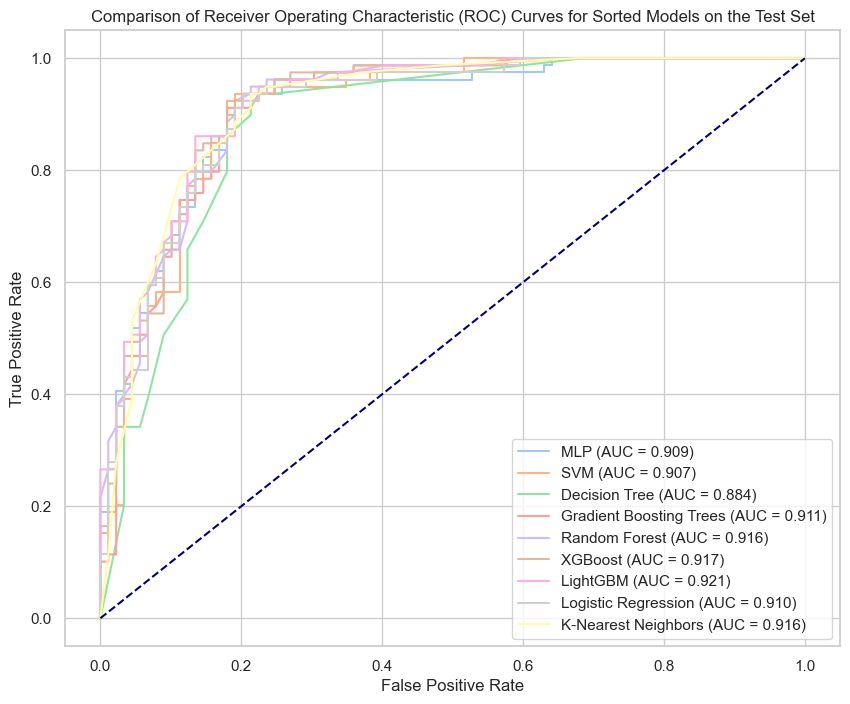

MLP: Accuracy = 0.851
SVM: Accuracy = 0.857
Decision Tree: Accuracy = 0.845
Gradient Boosting Trees: Accuracy = 0.845
Random Forest: Accuracy = 0.857
XGBoost: Accuracy = 0.863
LightGBM: Accuracy = 0.851
Logistic Regression: Accuracy = 0.851
K-Nearest Neighbors: Accuracy = 0.857


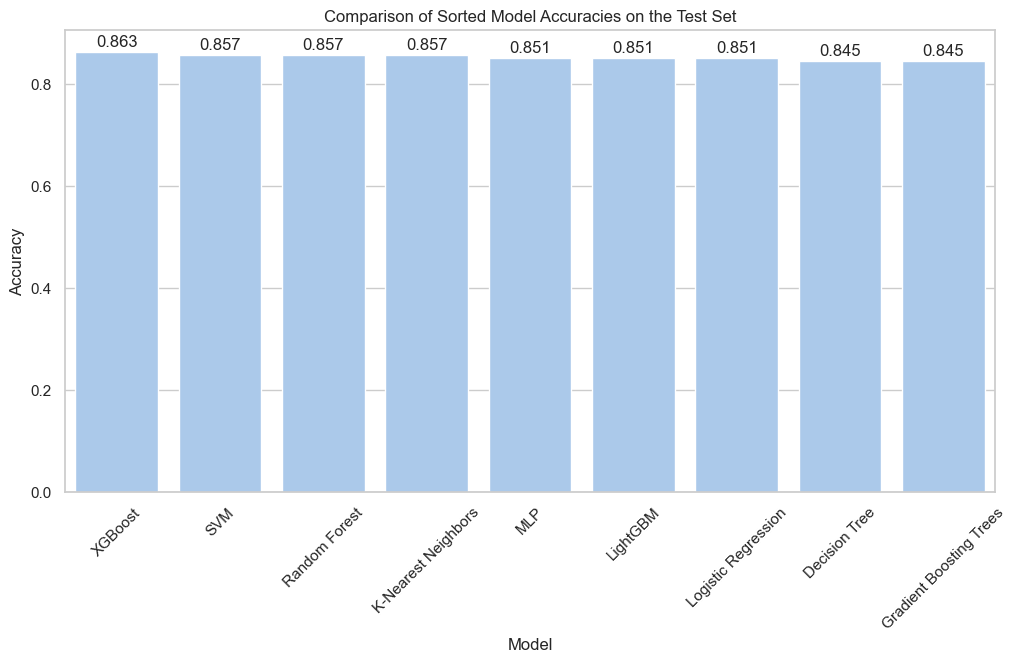

In [39]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  
from imblearn.over_sampling import SMOTE


# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建模型列表
models = {
    'MLP': mlp_model,
    'SVM': svc_model,
    'Decision Tree': dc_model,
    'Gradient Boosting Trees': gb_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'Logistic Regression': lr_model,
    'K-Nearest Neighbors': knn_model
}

# 初始化数据保存结构
roc_curves = {}
accuracies = {}

# 计算每个模型的ROC曲线和准确率
for model_name, model in models.items():
    X_test_model = X_test  # 使用原始特征数据

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_model)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_model)
    else:
        raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    y_pred = model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)

    roc_curves[model_name] = (fpr, tpr, roc_auc)
    accuracies[model_name] = accuracy

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves for Sorted Models on the Test Set')
plt.legend()
plt.show()

# 打印各模型的准确率
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: Accuracy = {accuracy:.3f}')

# 将准确率按照值排序
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))

# 格式化准确率为三位小数
accuracies_formatted = {model_name: f'{accuracy:.3f}' for model_name, accuracy in sorted_accuracies.items()}

sns.barplot(x=list(accuracies_formatted.keys()), y=list(sorted_accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sorted Model Accuracies on the Test Set')
plt.xticks(rotation=45)

# 在每个条形上方显示具体数值
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, str(accuracies_formatted[list(sorted_accuracies.keys())[i]]), ha='center')

plt.show()

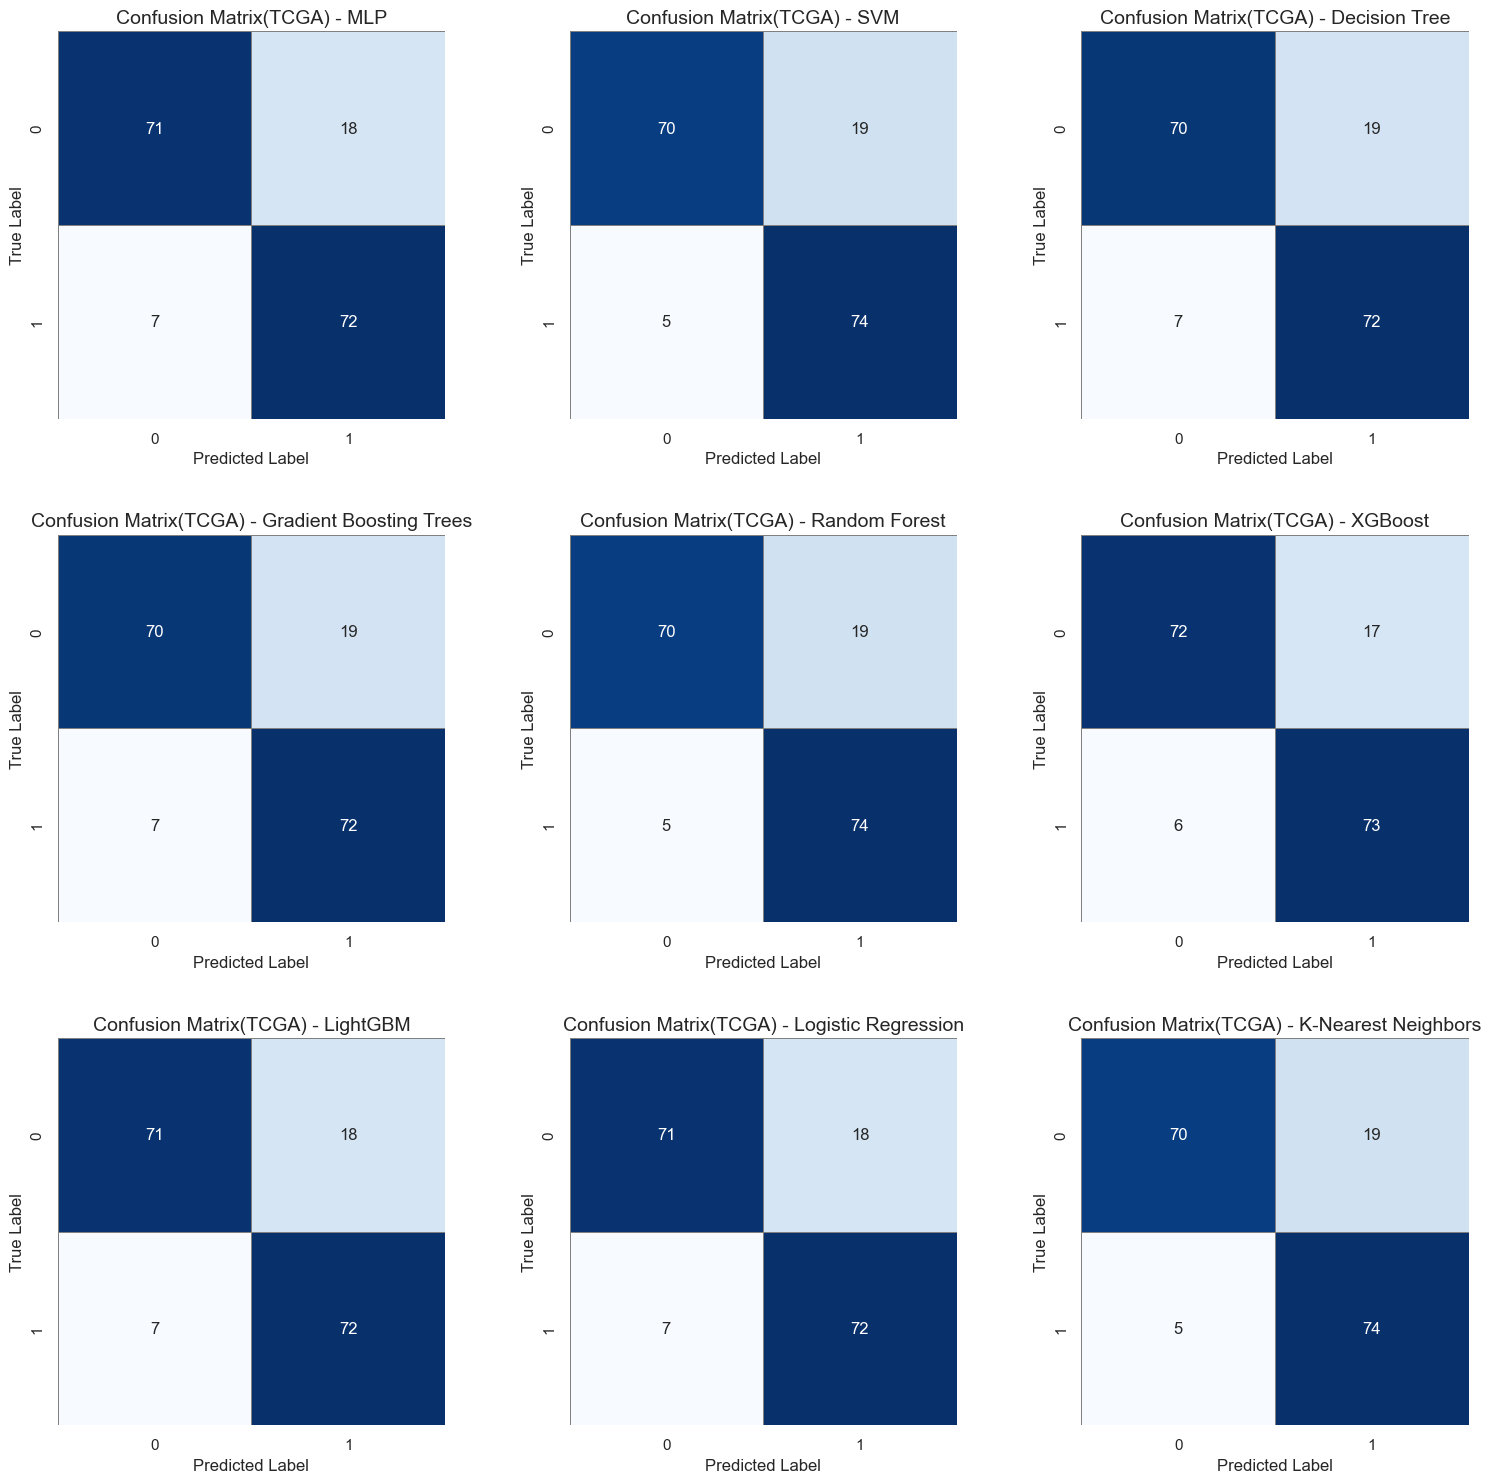

In [40]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE

# 假设这是生成模型报告并返回混淆矩阵的函数定义
def generate_report(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    return cm

# 加载保存的模型（假设已经正确保存和加载了模型）
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建模型列表
models = {
    'MLP': mlp_model,
    'SVM': svc_model,
    'Decision Tree': dc_model,
    'Gradient Boosting Trees': gb_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'Logistic Regression': lr_model,
    'K-Nearest Neighbors': knn_model
}

# 计算显示的行数和列数
num_cols = 3  # 每行显示的列数
num_rows = (len(models) - 1) // num_cols + 1  # 计算所需的行数
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))  # 调整图形大小，使得每个子图宽度相等

# 遍历每个模型并生成报告
for i, (model_name, model) in enumerate(models.items()):
    row = i // num_cols
    col = i % num_cols
    
    # 生成当前模型的报告并获取混淆矩阵
    cm = generate_report(model, X_test, y_test, model_name)
    
    # 在对应的子图中绘制混淆矩阵
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, square=True, linewidths=.5, linecolor='gray')
    ax.set_title(f'Confusion Matrix(TCGA) - {model_name}', fontsize=14)  # 调整标题字体大小
    ax.set_xlabel('Predicted Label', fontsize=12)  # 调整x轴标签字体大小
    ax.set_ylabel('True Label', fontsize=12)  # 调整y轴标签字体大小

# 隐藏多余的子图
for i in range(len(models), num_rows * num_cols):
    axes.flatten()[i].axis('off')

# 调整布局并显示图形
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # 调整子图间垂直间距和水平间距
plt.show()


In [41]:
#软投票集成

In [50]:
#1 mlp svm xgb

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.89375    0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8932154088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.915


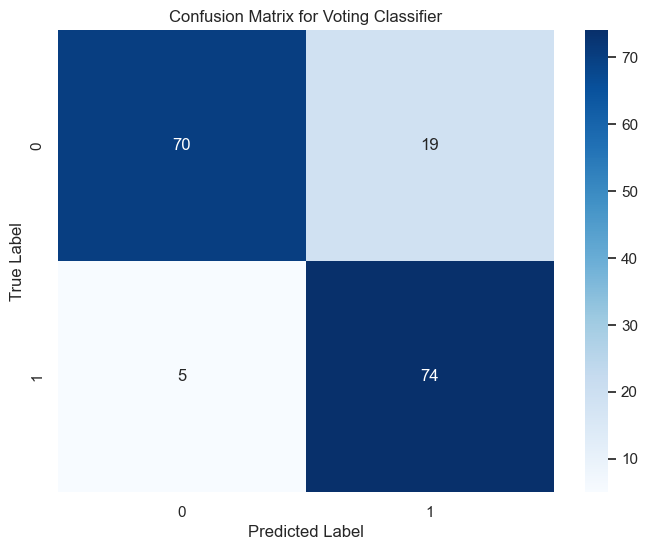

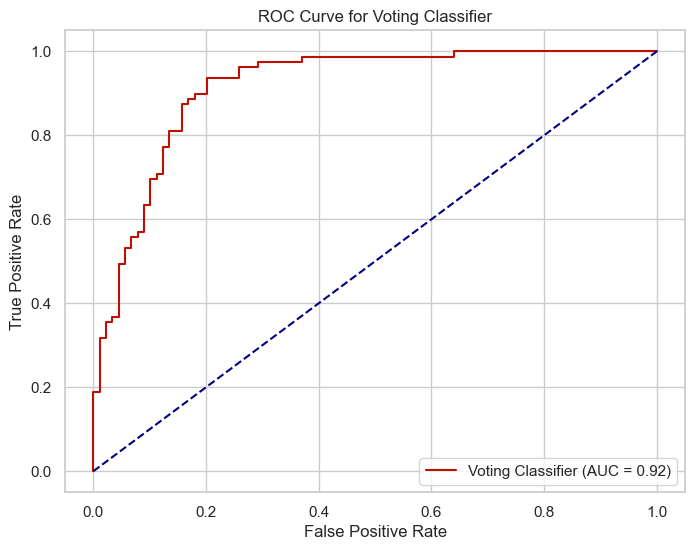

['voting_1_model.pkl']

In [51]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model ),
        ('svc', svc_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_1_model.pkl')

In [52]:
#2 mlp dc xgb

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.88125    0.90566038 0.86163522 0.89308176 0.9245283 ]
Mean CV Accuracy: 0.8932311320754718
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.913


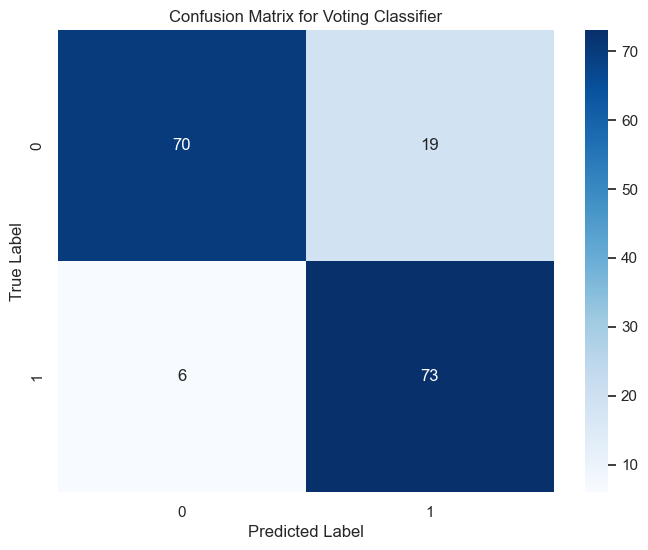

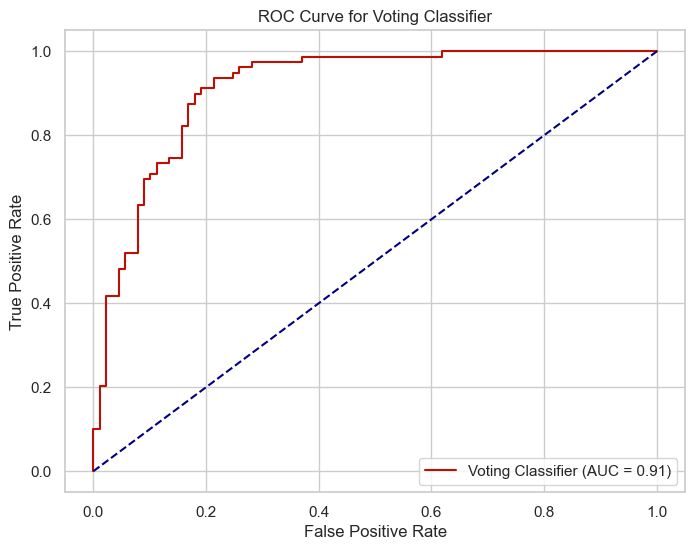

['voting_2_model.pkl']

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model ),
        ('dc', dc_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_2_model.pkl')

In [54]:
#3 mlp lr xgb

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.88125    0.90566038 0.86163522 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919732704402517
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.80      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.915


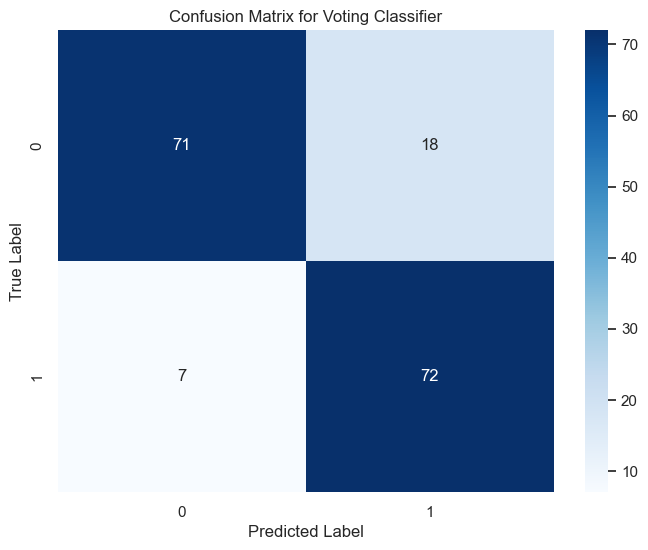

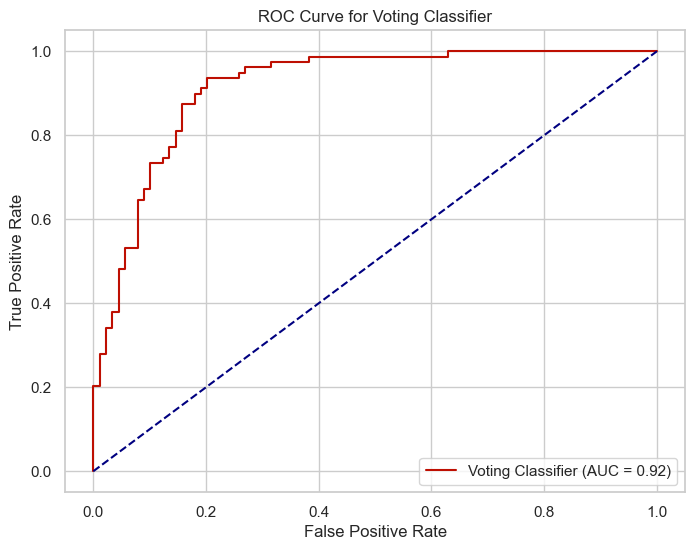

['voting_3_model.pkl']

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model ),
        ('lr', lr_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)


# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_3_model.pkl')

In [56]:
#4 mlp knn xgb

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.8875     0.88679245 0.86163522 0.89308176 0.9245283 ]
Mean CV Accuracy: 0.8907075471698114
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        89
           1       0.80      0.94      0.87        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.922


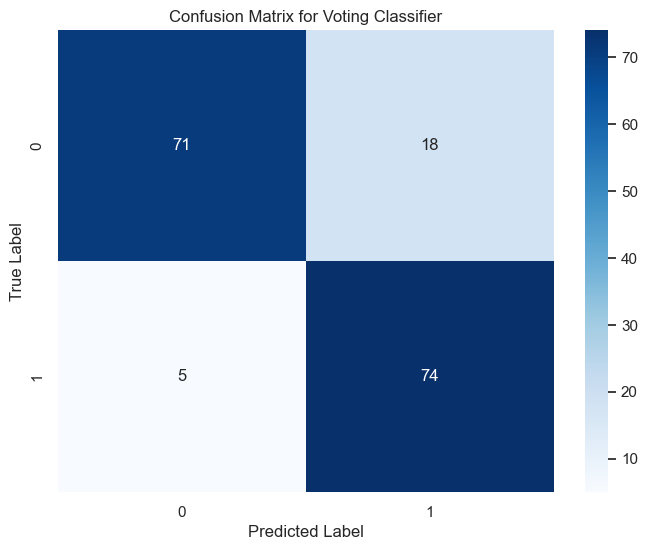

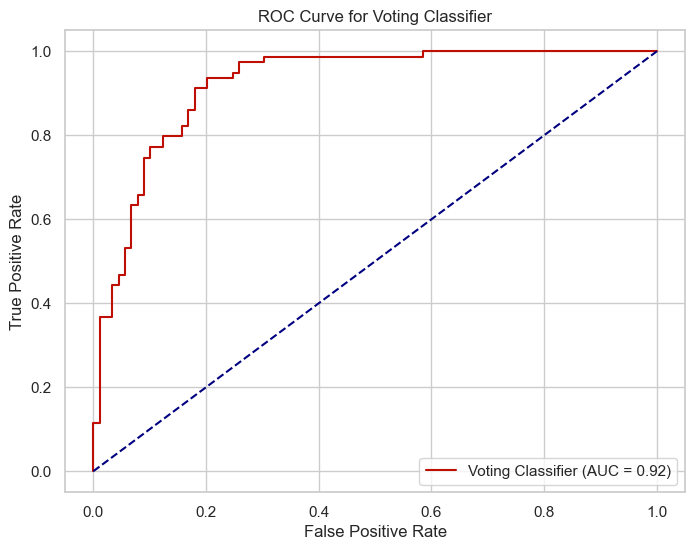

['voting_4_model.pkl']

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model ),
        ('knn', knn_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_4_model.pkl')

In [58]:
#5 svm dc xgb

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.914


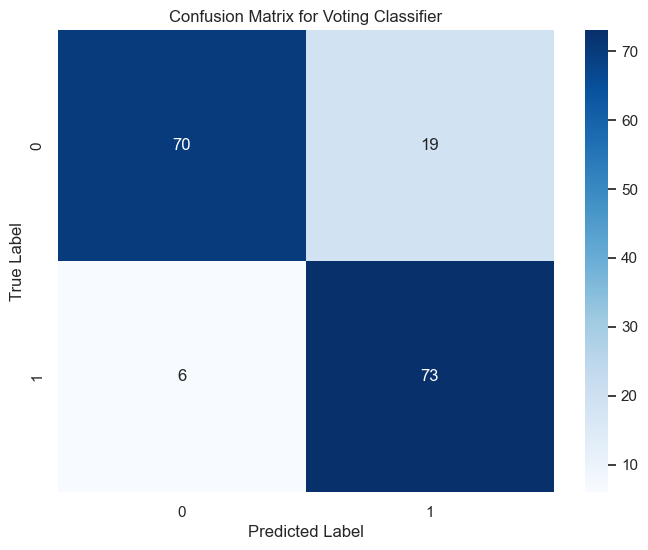

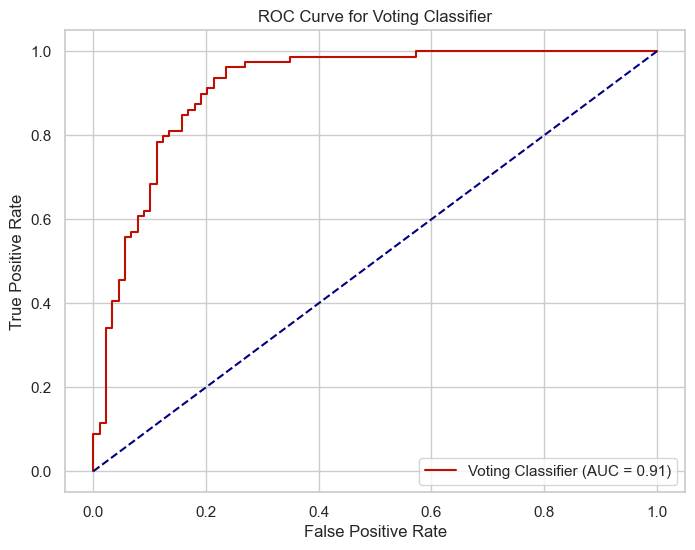

['voting_5_model.pkl']

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('dc', dc_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_5_model.pkl')

In [60]:
#6 svm lr xgb

Cross-Validation Scores: [0.89375    0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8932154088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.916


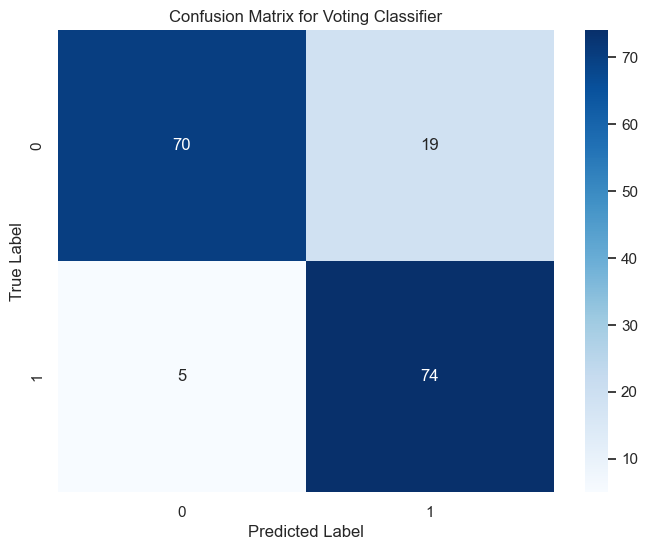

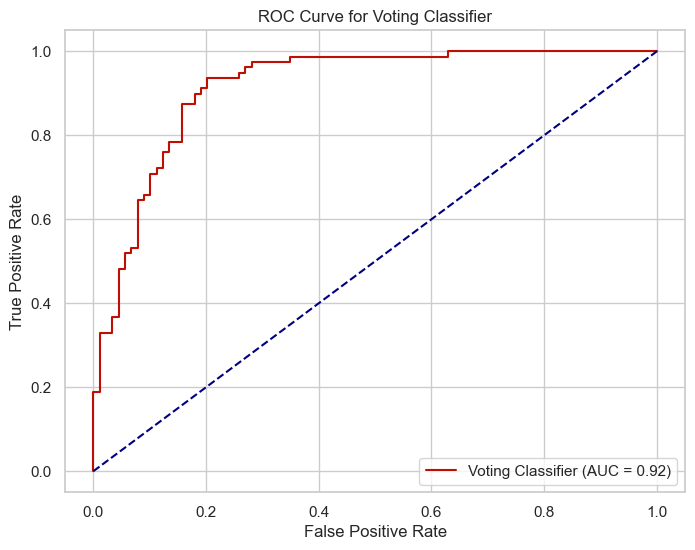

['voting_6_model.pkl']

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('lr', lr_model ),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_6_model.pkl')

In [62]:
#7 svm knn xgb

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.924


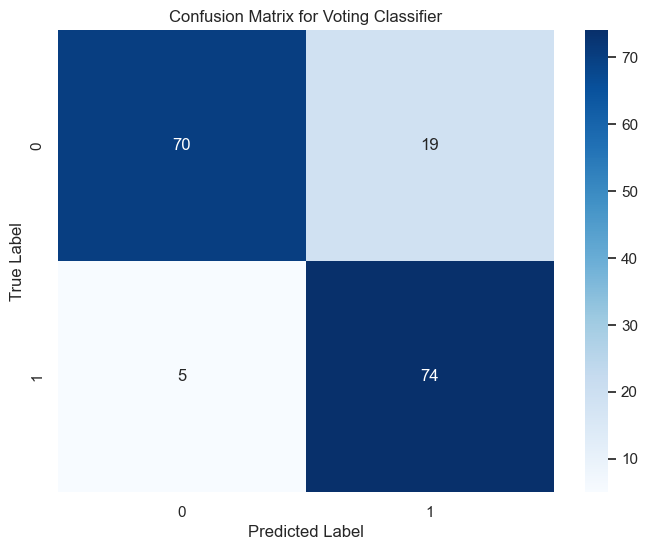

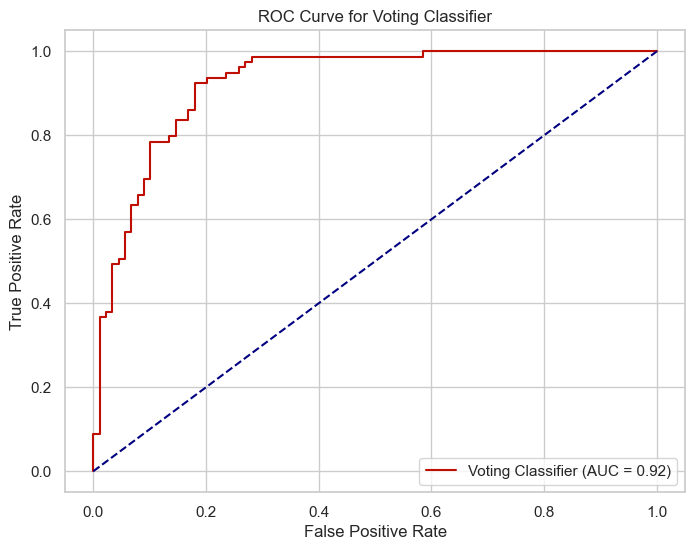

['voting_7_model.pkl']

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('knn', knn_model ),
        ('xgb', xgb_model)
    ],
    voting='soft'
)


# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_7_model.pkl')

In [64]:
#8 dc lr xgb

Cross-Validation Scores: [0.875      0.90566038 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919811320754718
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.914


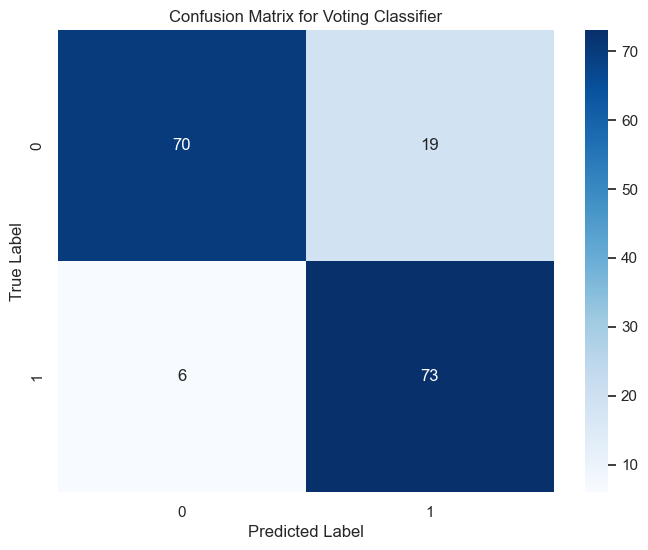

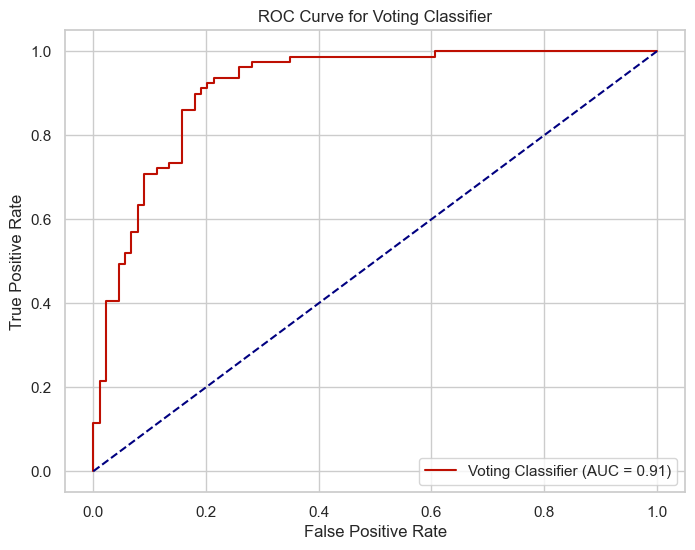

['voting_8_model.pkl']

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('dc', dc_model),
        ('lr', lr_model ),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_8_model.pkl')

In [66]:
#9 dc knn xgb

Cross-Validation Scores: [0.88125    0.89937107 0.86163522 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8907154088050315
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.918


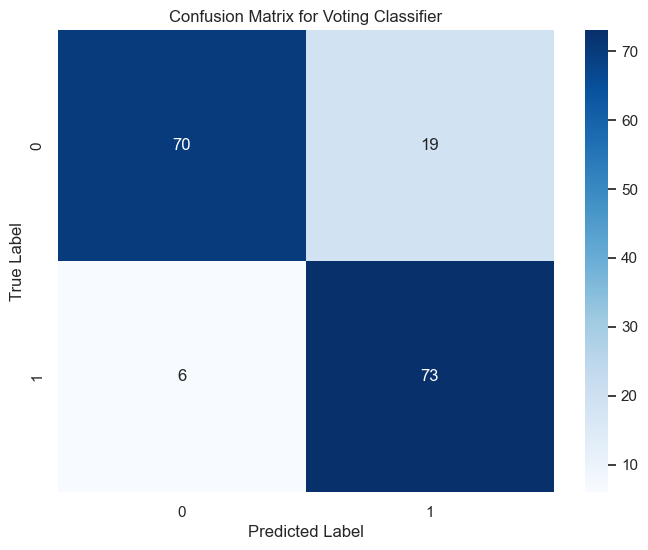

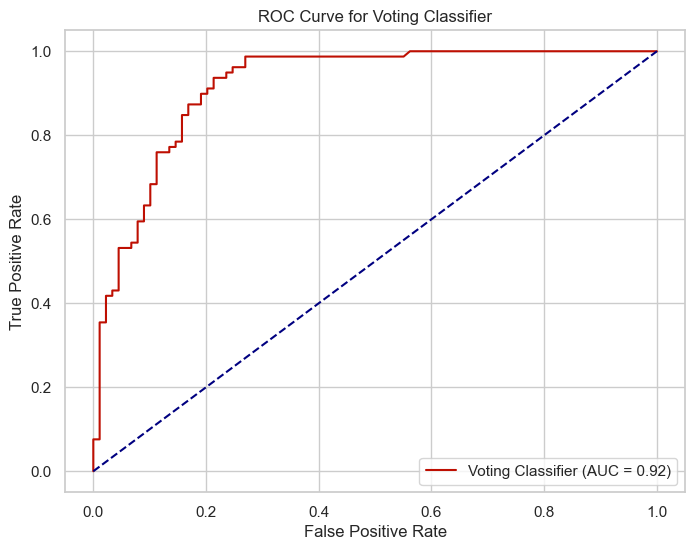

['voting_9_model.pkl']

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('dc', dc_model),
        ('knn', knn_model ),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_9_model.pkl')

In [68]:
#10 lr knn xgb

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.89308176 0.9245283 ]
Mean CV Accuracy: 0.8932232704402516
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        89
           1       0.80      0.94      0.87        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.923


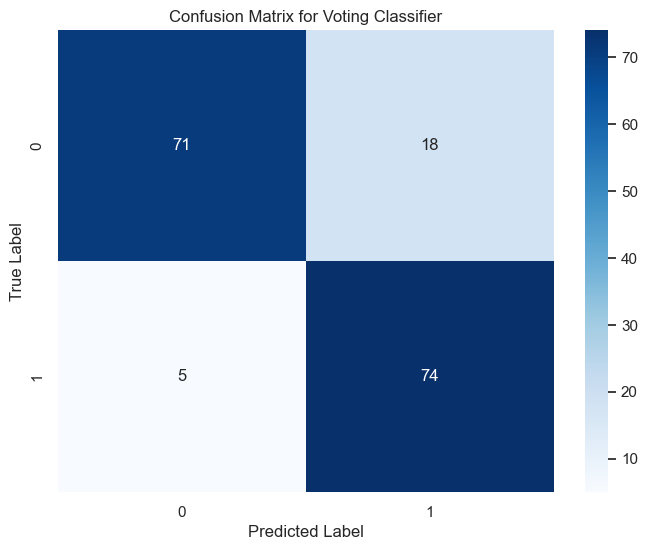

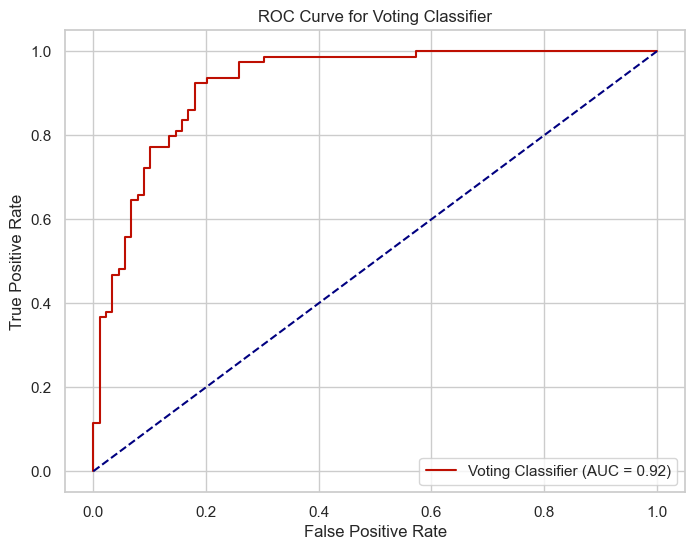

['voting_10_model.pkl']

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('knn', knn_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_10_model.pkl')

In [70]:
#11 mlp svm rf

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.917


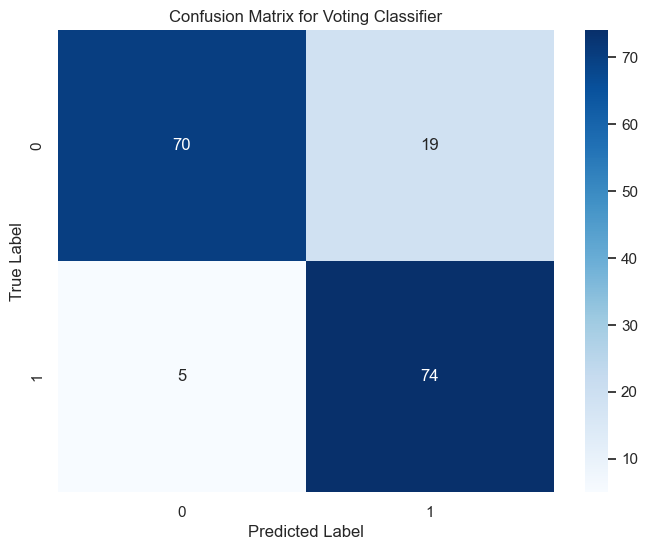

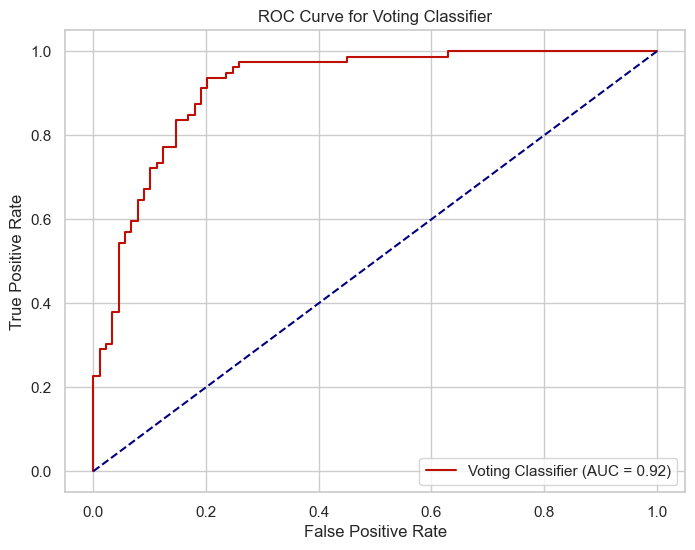

['voting_11_model.pkl']

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model),
        ('svc', svc_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_11_model.pkl')

In [72]:
#12 mlp dc rf

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.88125    0.89937107 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919732704402517
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.916


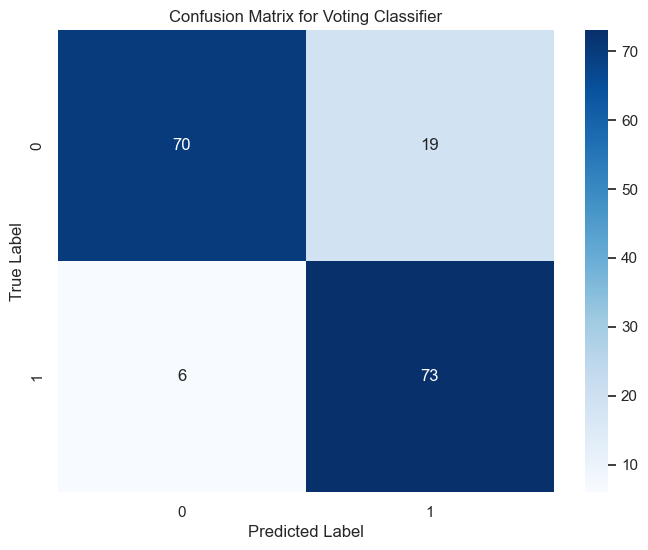

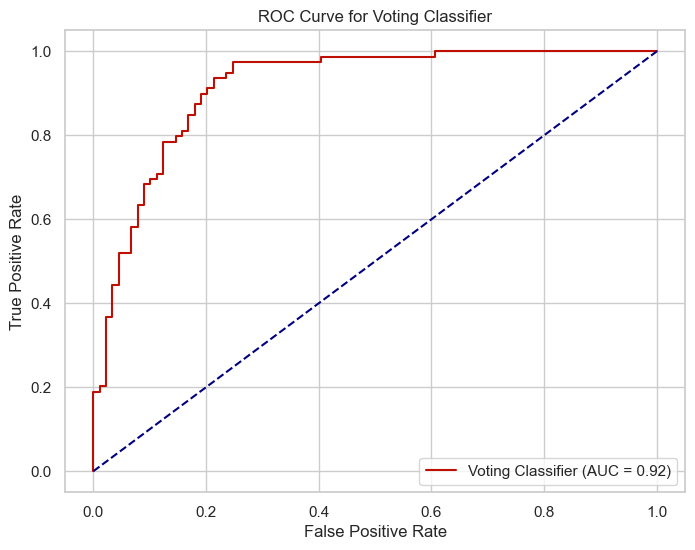

['voting_12_model.pkl']

In [73]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model),
        ('dc', dc_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_12_model.pkl')

In [74]:
#13 mlp lr rf

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.88125    0.89308176 0.86163522 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8894575471698113
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        89
           1       0.80      0.94      0.87        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.916


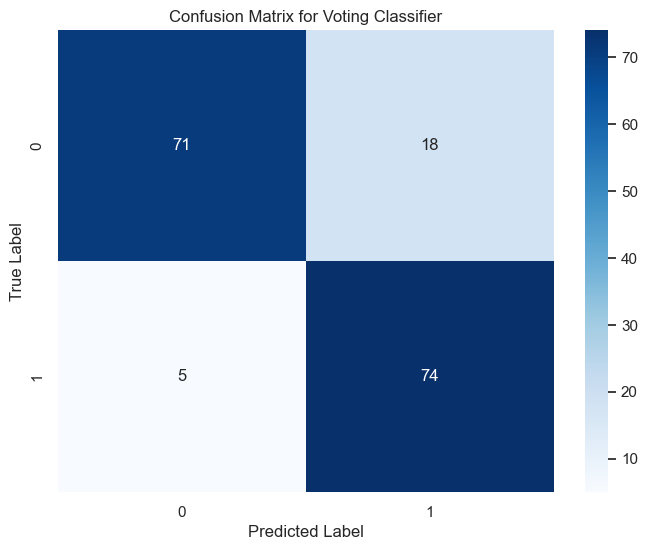

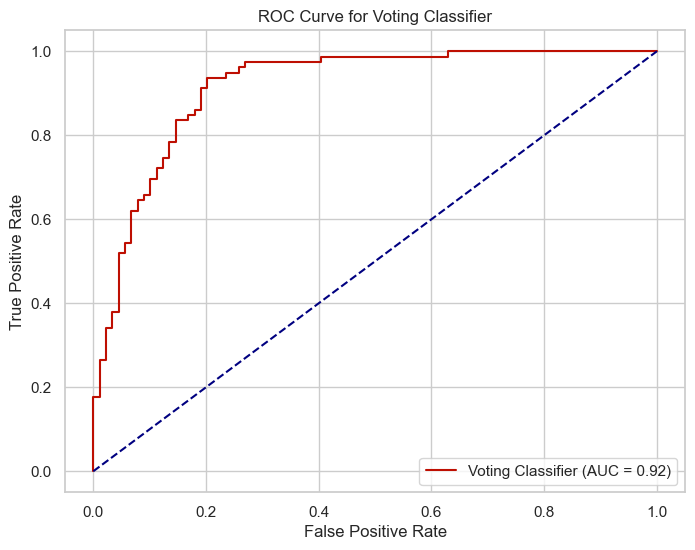

['voting_13_model.pkl']

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model),
        ('lr', lr_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_13_model.pkl')

In [76]:
#14 mlp knn rf

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.924


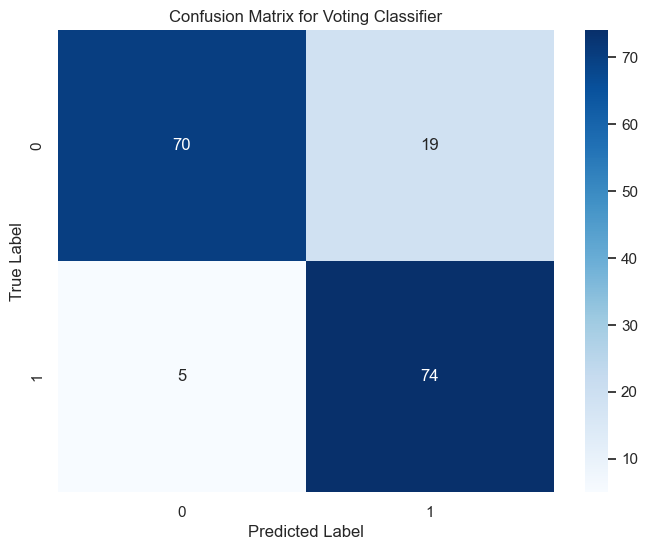

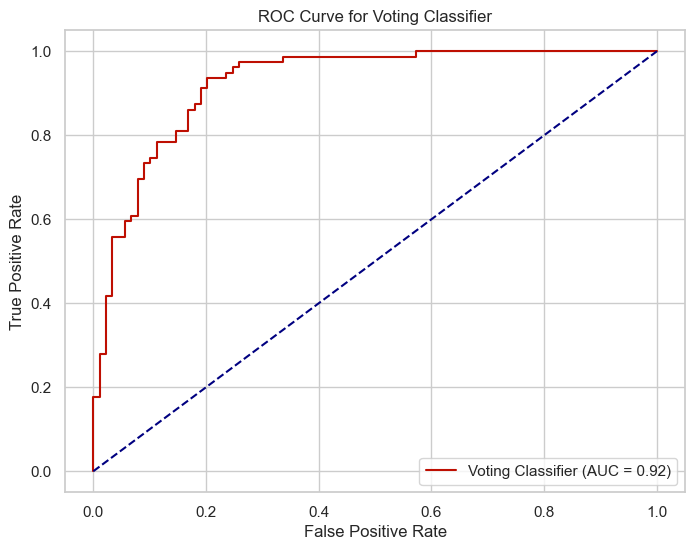

['voting_14_model.pkl']

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model),
        ('knn', knn_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_14_model.pkl')

In [78]:
#15 svm dc rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.911


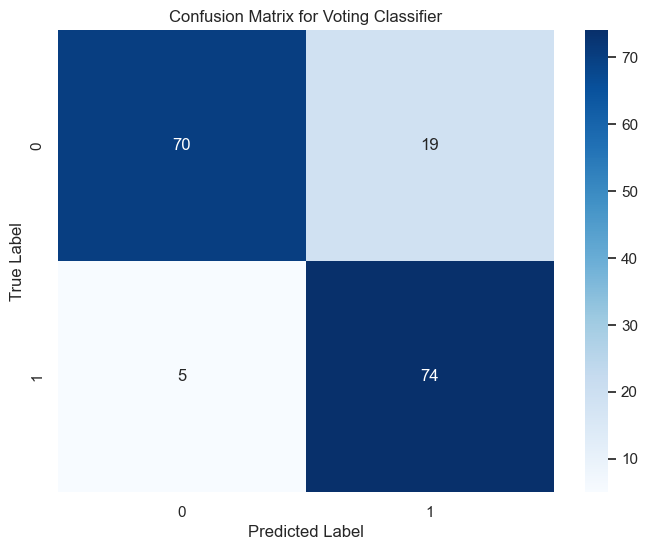

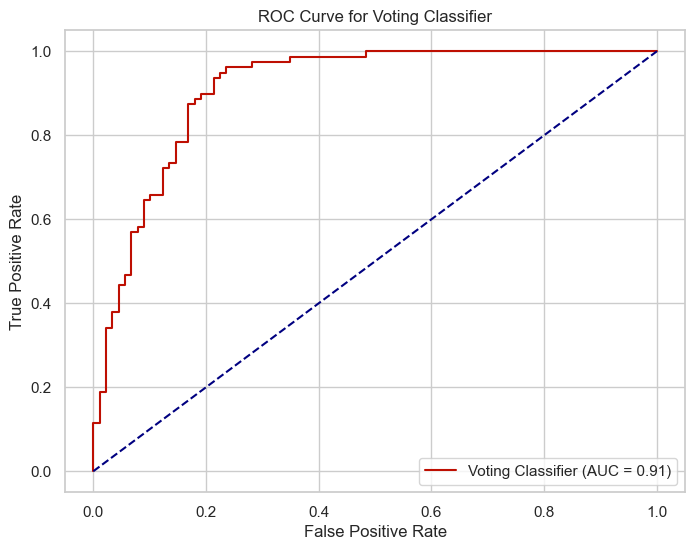

['voting_15_model.pkl']

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('dc',dc_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_15_model.pkl')

In [80]:
#16 svm lr rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.919


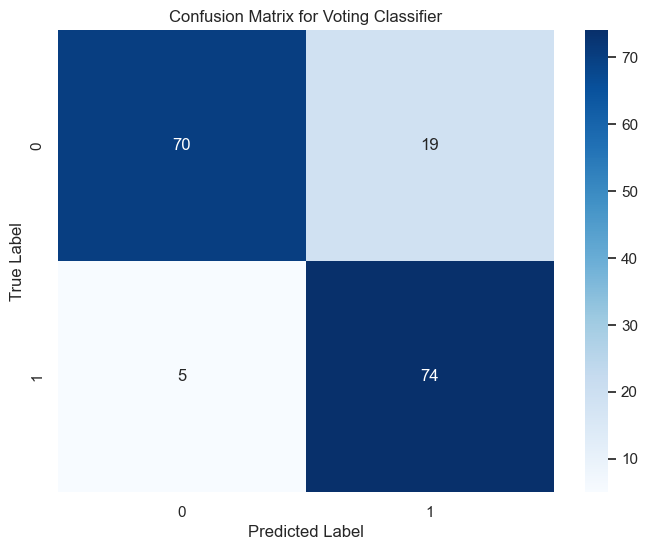

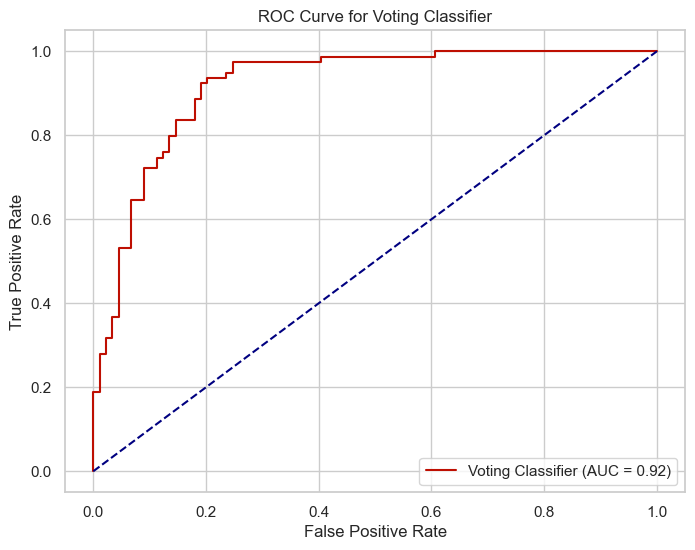

['voting_16_model.pkl']

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('lr',lr_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_16_model.pkl')

In [82]:
#17 svm knn rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.926


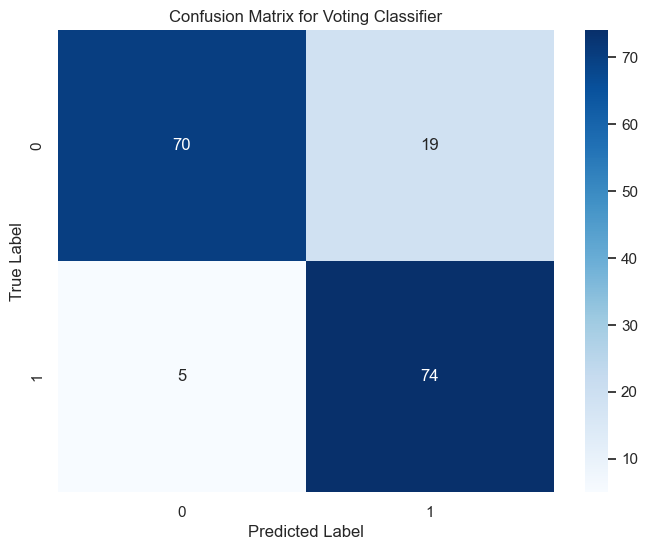

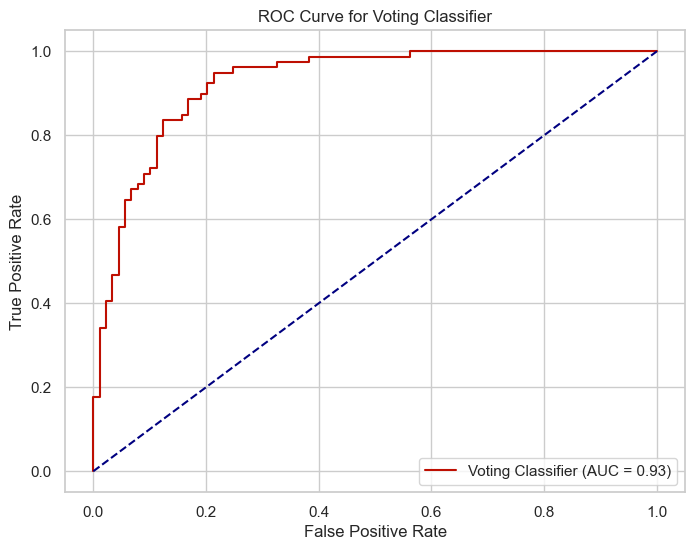

['voting_17_model.pkl']

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('knn',knn_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_17_model.pkl')

In [84]:
#18 dc lr rf

Cross-Validation Scores: [0.88125    0.89937107 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919732704402517
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.916


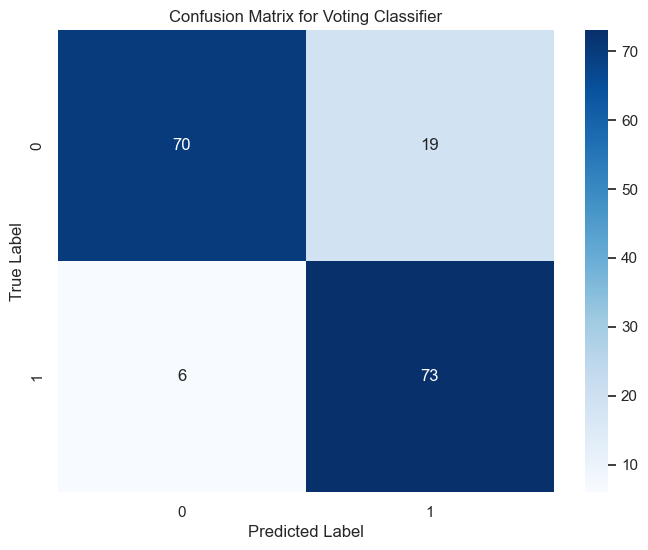

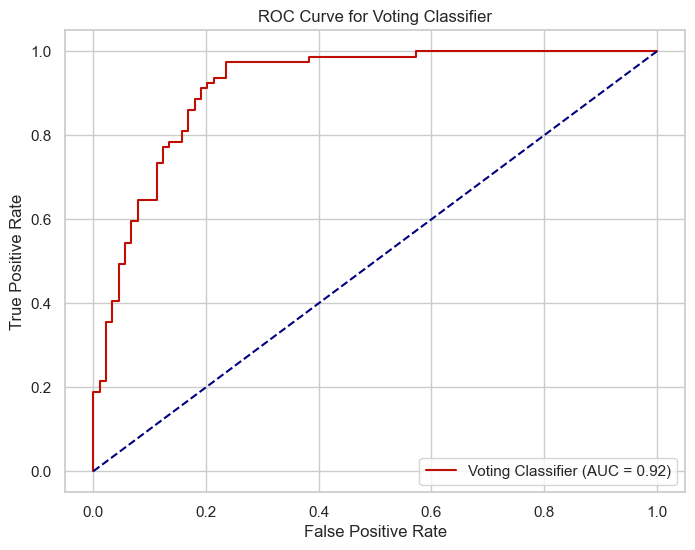

['voting_18_model.pkl']

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('dc',dc_model ),
        ('lr',lr_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_18_model.pkl')

In [86]:
#19 dc knn rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.919


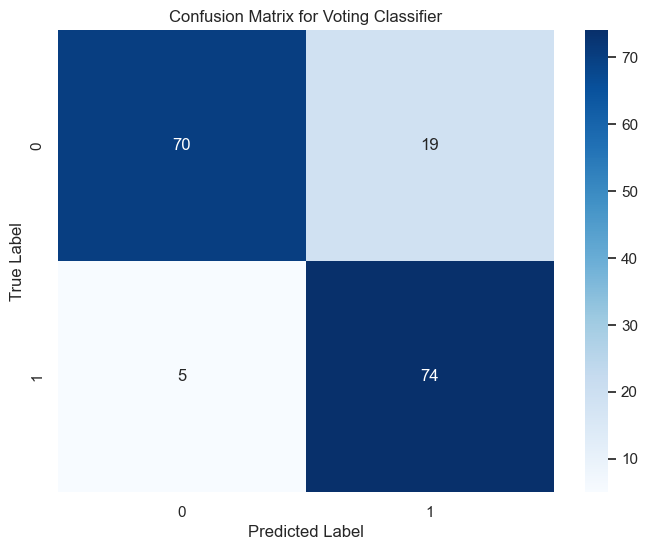

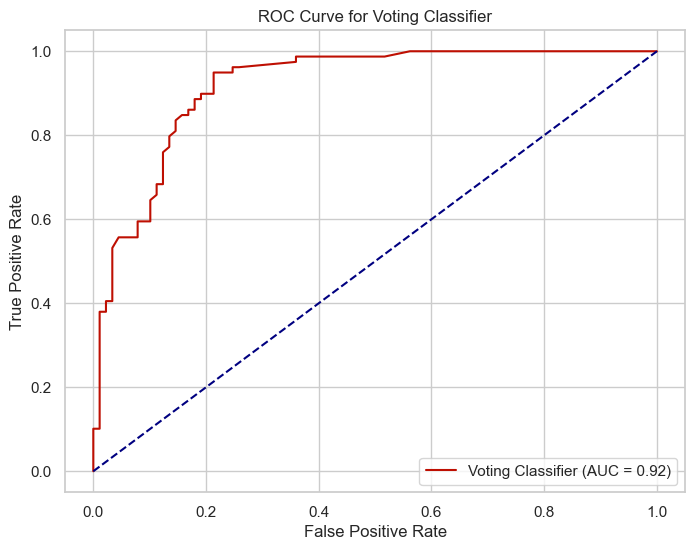

['voting_19_model.pkl']

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('dc',dc_model ),
        ('knn',knn_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_19_model.pkl')

In [88]:
#20 lr knn rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.925


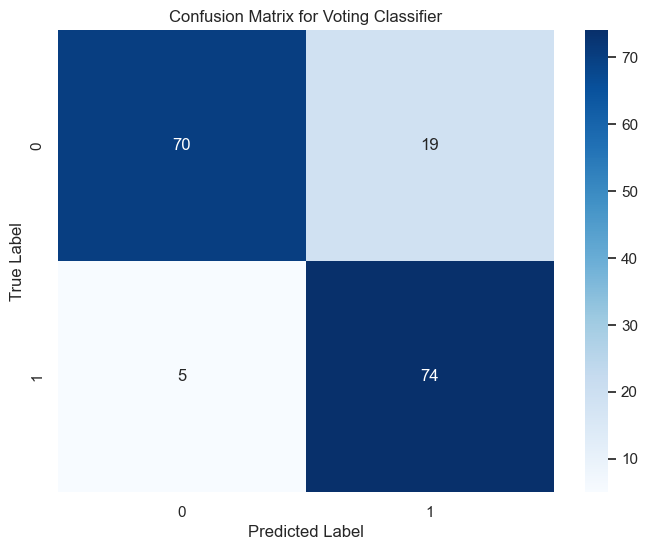

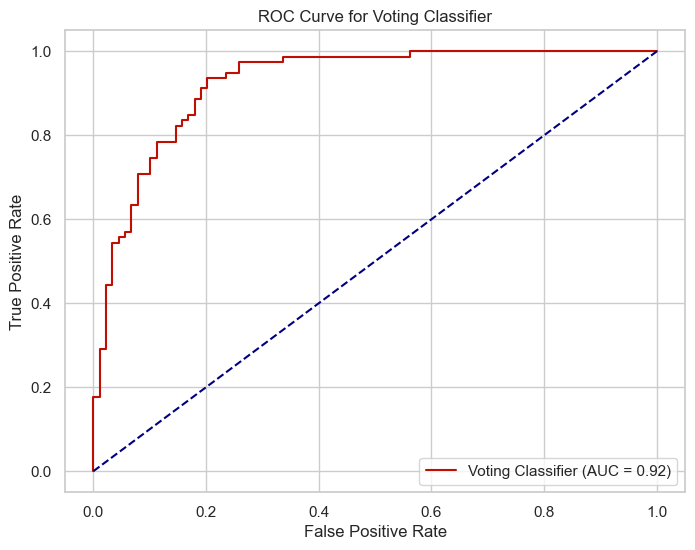

['voting_20_model.pkl']

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('lr',lr_model),
        ('knn', knn_model ),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_20_model.pkl')

In [90]:
#21 mlp xgb rf

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        89
           1       0.80      0.94      0.87        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.917


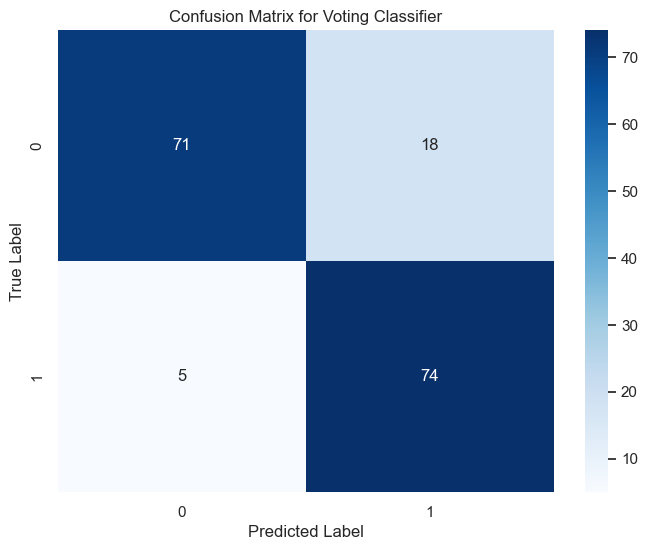

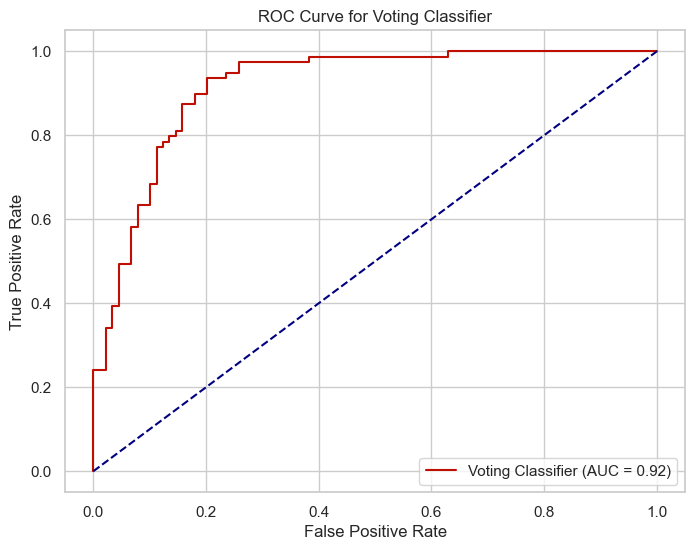

['voting_21_model.pkl']

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_model),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_21_model.pkl')

In [92]:
#22 svm xgb rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.919


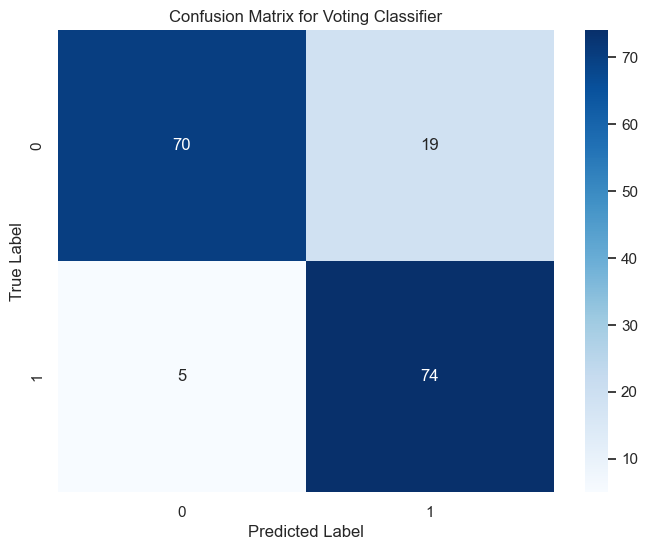

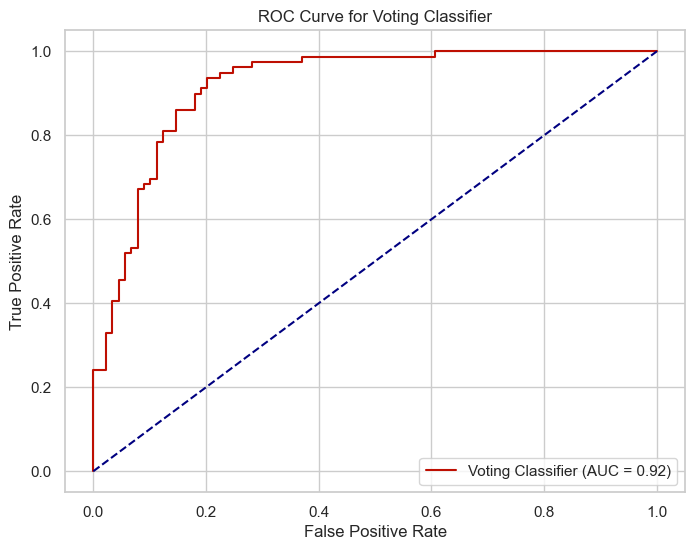

['voting_22_model.pkl']

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc_model),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_22_model.pkl')

In [94]:
#23 dc xgb rf

Cross-Validation Scores: [0.8875     0.89937107 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8932232704402516
Accuracy: 0.851
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        89
           1       0.79      0.92      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.86      0.85       168
weighted avg       0.86      0.85      0.85       168

AUC: 0.918


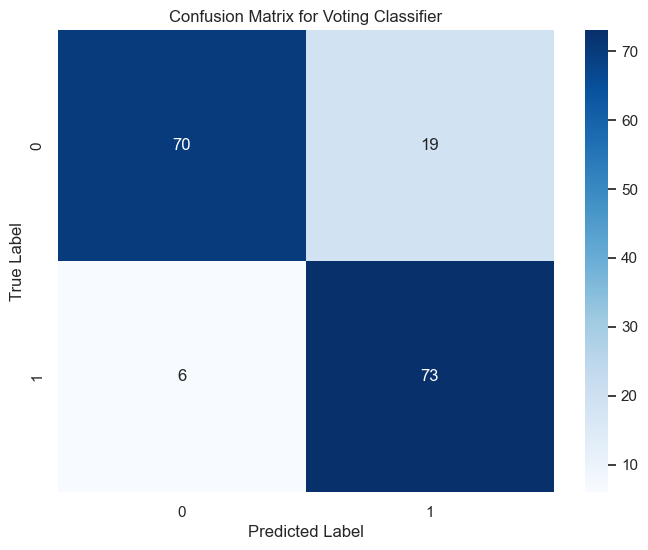

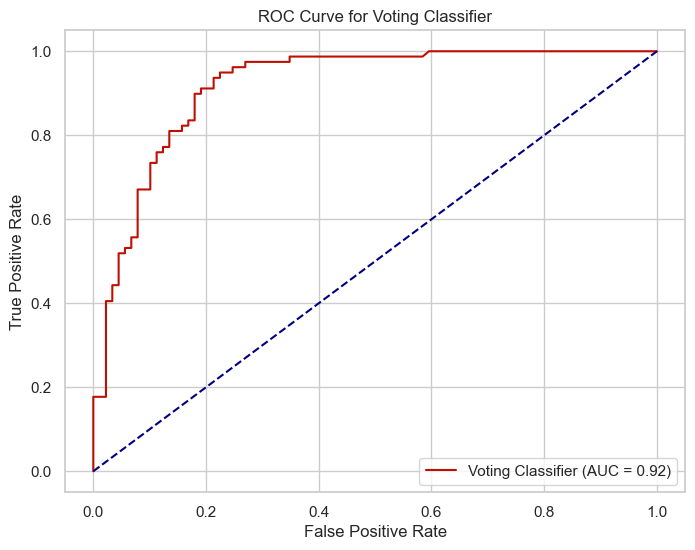

['voting_23_model.pkl']

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('dc', dc_model),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_23_model.pkl')

In [96]:
#24 lr xgb rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.863
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        89
           1       0.80      0.94      0.87        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.918


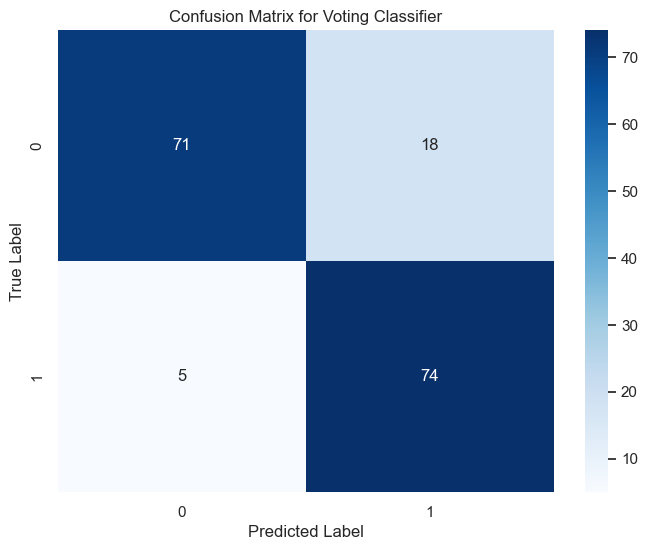

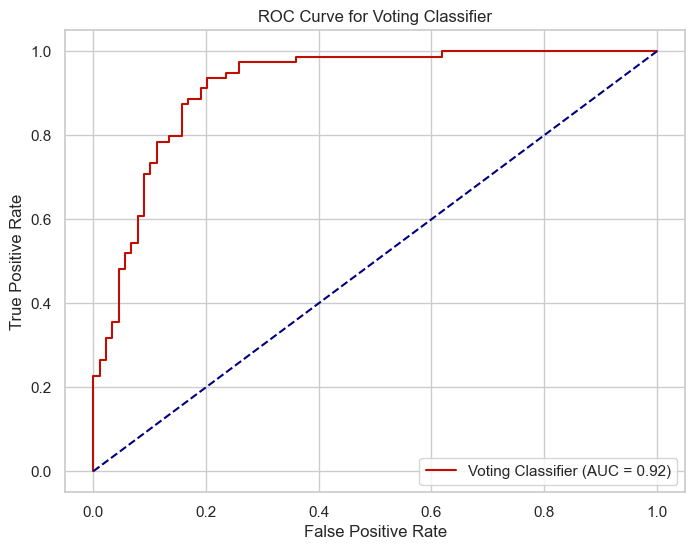

['voting_24_model.pkl']

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_24_model.pkl')

In [98]:
#25 knn xgb rf

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168

AUC: 0.928


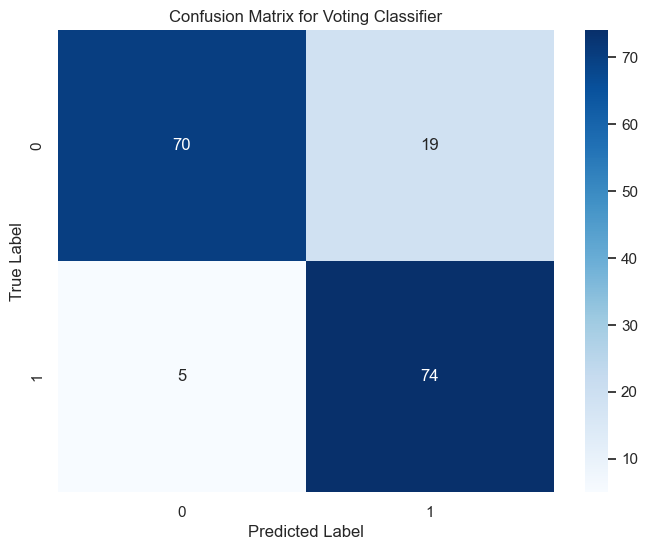

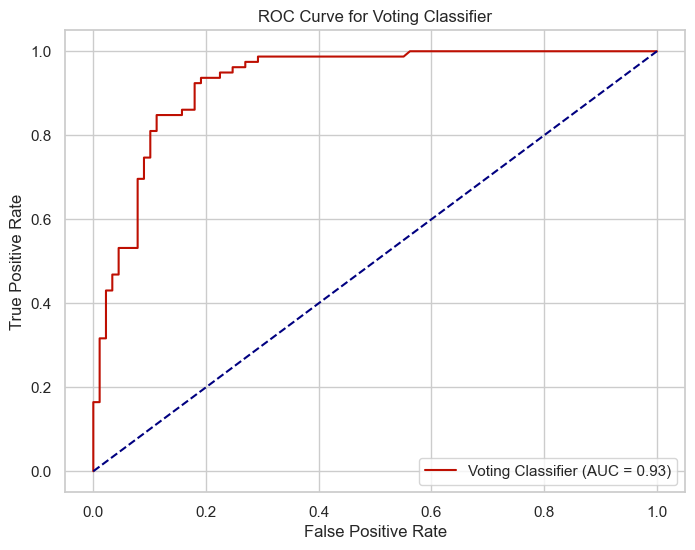

['voting_25_model.pkl']

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 加载保存的所有模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")

# 创建软投票分类器，包含所有加载的模型
voting_clf = VotingClassifier(
    estimators=[
        ('knn', knn_model ),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 用软投票分类器拟合数据（使用经过SMOTE处理后的数据）
voting_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 预测并计算准确率
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Accuracy: {accuracy_voting:.3f}')

# 综合报告
print(classification_report(y_test, y_pred_voting))

# 计算ROC曲线和AUC值
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_scores_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
print(f'AUC: {roc_auc_voting:.3f}')

# 绘制混淆矩阵
conf_mat_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.show()

# 保存所有加载的模型和软投票模型
joblib.dump(voting_clf, 'voting_25_model.pkl')

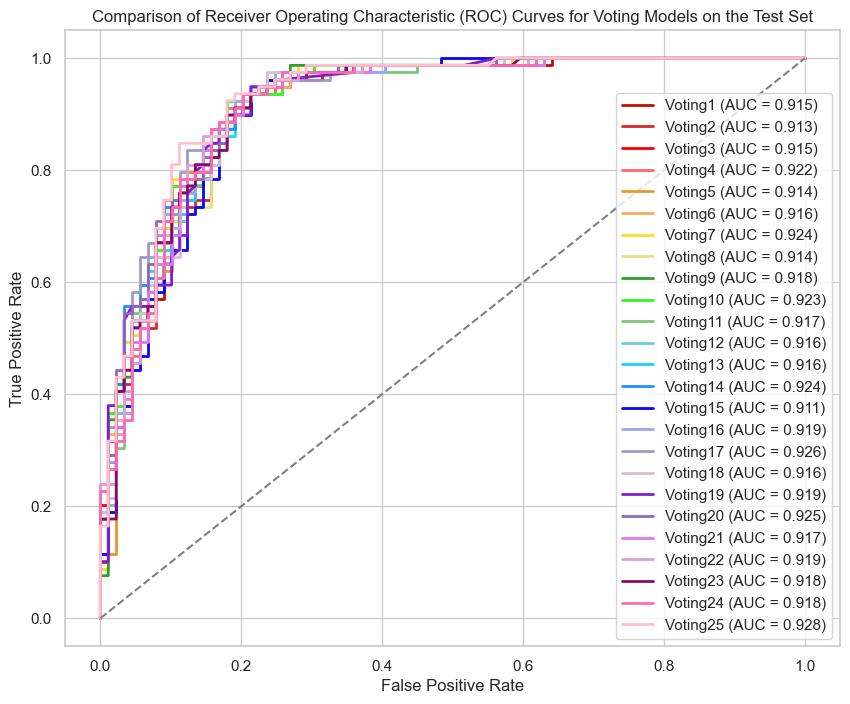

Voting1: Accuracy = 0.857
Voting2: Accuracy = 0.851
Voting3: Accuracy = 0.851
Voting4: Accuracy = 0.863
Voting5: Accuracy = 0.851
Voting6: Accuracy = 0.857
Voting7: Accuracy = 0.857
Voting8: Accuracy = 0.851
Voting9: Accuracy = 0.851
Voting10: Accuracy = 0.863
Voting11: Accuracy = 0.857
Voting12: Accuracy = 0.851
Voting13: Accuracy = 0.863
Voting14: Accuracy = 0.857
Voting15: Accuracy = 0.857
Voting16: Accuracy = 0.857
Voting17: Accuracy = 0.857
Voting18: Accuracy = 0.851
Voting19: Accuracy = 0.857
Voting20: Accuracy = 0.857
Voting21: Accuracy = 0.863
Voting22: Accuracy = 0.857
Voting23: Accuracy = 0.851
Voting24: Accuracy = 0.863
Voting25: Accuracy = 0.857


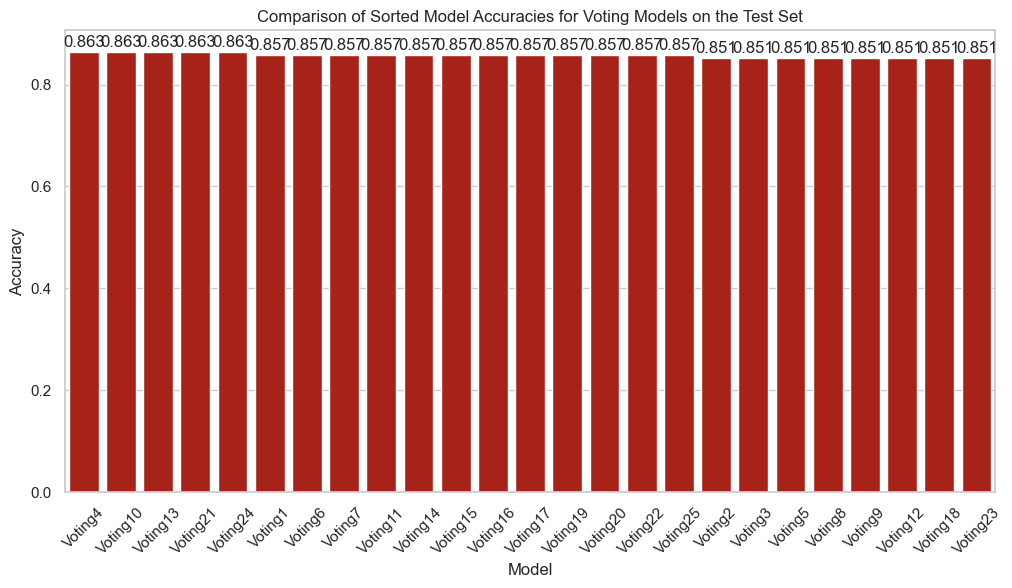

In [100]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns

# 加载保存的模型
voting1_model = joblib.load('voting_1_model.pkl')
voting2_model = joblib.load('voting_2_model.pkl')
voting3_model = joblib.load('voting_3_model.pkl')
voting4_model = joblib.load('voting_4_model.pkl')
voting5_model = joblib.load('voting_5_model.pkl')
voting6_model = joblib.load('voting_6_model.pkl')
voting7_model = joblib.load('voting_7_model.pkl')
voting8_model = joblib.load('voting_8_model.pkl')
voting9_model = joblib.load('voting_9_model.pkl')
voting10_model = joblib.load('voting_10_model.pkl')
voting11_model = joblib.load('voting_11_model.pkl')
voting12_model = joblib.load('voting_12_model.pkl')
voting13_model = joblib.load('voting_13_model.pkl')
voting14_model = joblib.load('voting_14_model.pkl')
voting15_model = joblib.load('voting_15_model.pkl')
voting16_model = joblib.load('voting_16_model.pkl')
voting17_model = joblib.load('voting_17_model.pkl')
voting18_model = joblib.load('voting_18_model.pkl')
voting19_model = joblib.load('voting_19_model.pkl')
voting20_model = joblib.load('voting_20_model.pkl')
voting21_model = joblib.load('voting_21_model.pkl')
voting22_model = joblib.load('voting_22_model.pkl')
voting23_model = joblib.load('voting_23_model.pkl')
voting24_model = joblib.load('voting_24_model.pkl')
voting25_model = joblib.load('voting_25_model.pkl')

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建模型列表
models = {
    'Voting1': voting1_model,
    'Voting2': voting2_model,
    'Voting3': voting3_model,
    'Voting4': voting4_model,
    'Voting5': voting5_model,
    'Voting6': voting6_model,
    'Voting7': voting7_model,
    'Voting8': voting8_model,
    'Voting9': voting9_model,
    'Voting10': voting10_model,
    'Voting11': voting11_model,
    'Voting12': voting12_model,
    'Voting13': voting13_model,
    'Voting14': voting14_model,
    'Voting15' :voting15_model,
    'Voting16': voting16_model,
    'Voting17': voting17_model,
    'Voting18': voting18_model,
    'Voting19': voting19_model,
    'Voting20': voting20_model,
    'Voting21': voting21_model,
    'Voting22': voting22_model,
    'Voting23': voting23_model,
    'Voting24': voting24_model,
    'Voting25': voting25_model, 
}

# 初始化数据保存结构
roc_curves = {}
accuracies = {}

# 计算每个模型的ROC曲线和准确率
for model_name, model in models.items():
    X_test_model = X_test  # 使用原始特征数据

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_model)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_model)
    else:
        raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    y_pred = model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)

    roc_curves[model_name] = (fpr, tpr, roc_auc)
    accuracies[model_name] = accuracy

# 调整后的颜色列表
colors = [
    '#BE0F02', '#d62728', '#FE0000', '#FF6969',  # 红色系列
    '#EB952D', '#FEA962', '#F4E024', '#eedd82',  # 橙色到金色系列
    '#2ca02c', '#2FF91F', '#7cc576',              # 绿色系列
    '#68CBE2', '#1CD1FC', '#1e90ff', '#0A04FC',  # 蓝色系列
    '#9BA7EF', '#9e9ac8', '#d8bfd8',              # 蓝色系列
    '#801DD1', '#9467bd', '#DE75FB', '#dda0dd',  # 紫色系列
    '#860C63', '#ff69b4', '#ffc0cb'               # 粉色系列
]

sns.set_palette(sns.color_palette(colors))

# 绘制ROC曲线图
plt.figure(figsize=(10, 8))

for i, (model_name, (fpr, tpr, roc_auc)) in enumerate(roc_curves.items()):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves for Voting Models on the Test Set')
plt.legend()
plt.show()

# 打印各模型的准确率
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: Accuracy = {accuracy:.3f}')

# 将准确率按照值排序
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))

# 格式化准确率为三位小数
accuracies_formatted = {model_name: f'{accuracy:.3f}' for model_name, accuracy in sorted_accuracies.items()}

sns.barplot(x=list(accuracies_formatted.keys()), y=list(sorted_accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sorted Model Accuracies for Voting Models on the Test Set')

plt.xticks(rotation=45)

# 在每个条形上方显示具体数值
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, str(accuracies_formatted[list(sorted_accuracies.keys())[i]]), ha='center')

plt.show()

In [101]:
#STacking集成

In [102]:
#1 mlp xgb+lr

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the 

Cross-Validation Scores: [0.88125    0.91194969 0.83647799 0.89937107 0.9245283 ]
Mean CV Accuracy: 0.8907154088050315
Accuracy：0.851
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.80      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168



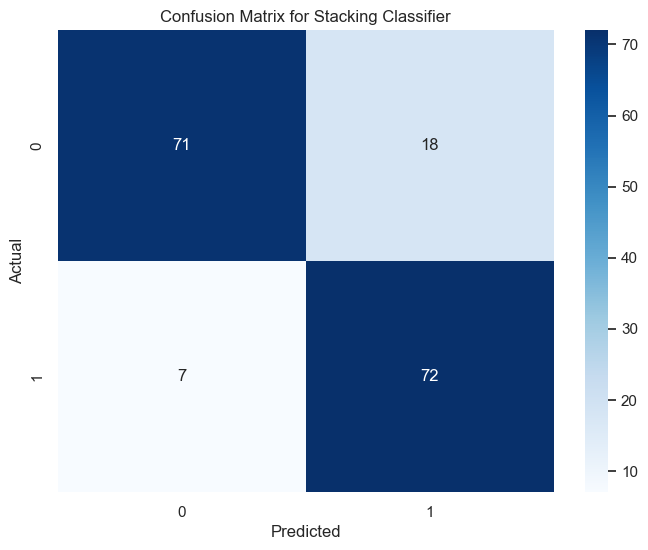

AUC：0.915


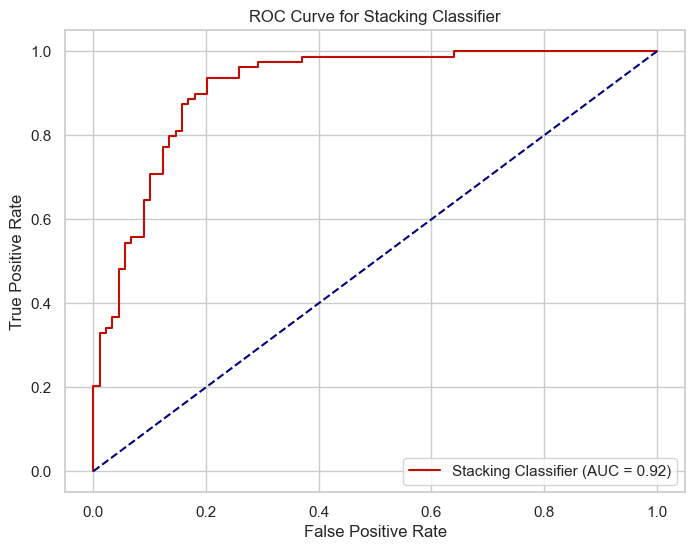

['stacking_1_model.pkl']

In [103]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('mlp', mlp_model),
    ('xgb', xgb_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_1_model.pkl')

In [104]:
#2 mlp rf+lr

C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\拯救者233\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the 

Cross-Validation Scores: [0.88125    0.90566038 0.86163522 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919732704402517
Accuracy：0.851
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        89
           1       0.80      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.85       168
weighted avg       0.86      0.85      0.85       168



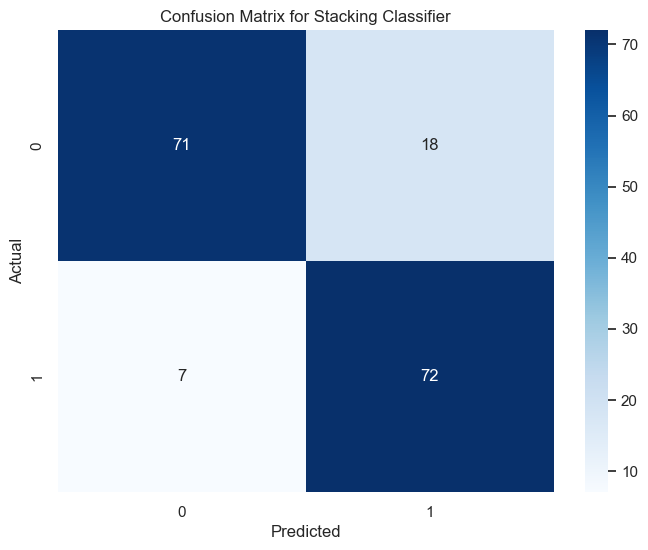

AUC：0.916


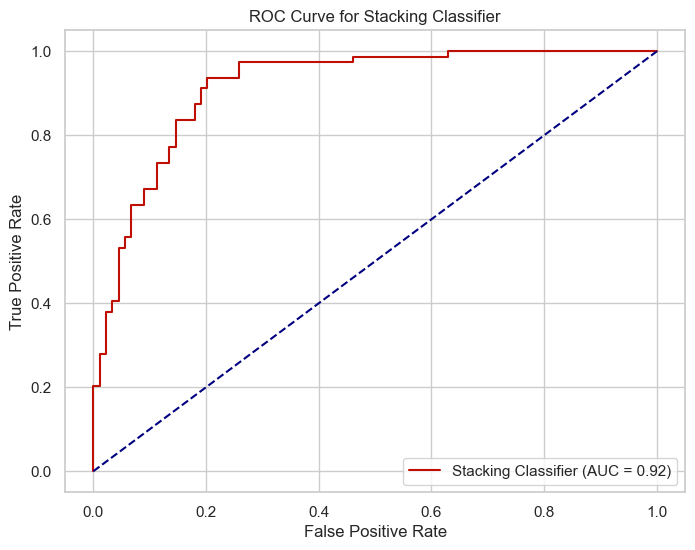

['stacking_2_model.pkl']

In [105]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl") 
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('mlp', mlp_model),
    ('rf', rf_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_2_model.pkl')

In [106]:
#3 svm xgb+lr

Cross-Validation Scores: [0.8875     0.89937107 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8932232704402516
Accuracy：0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



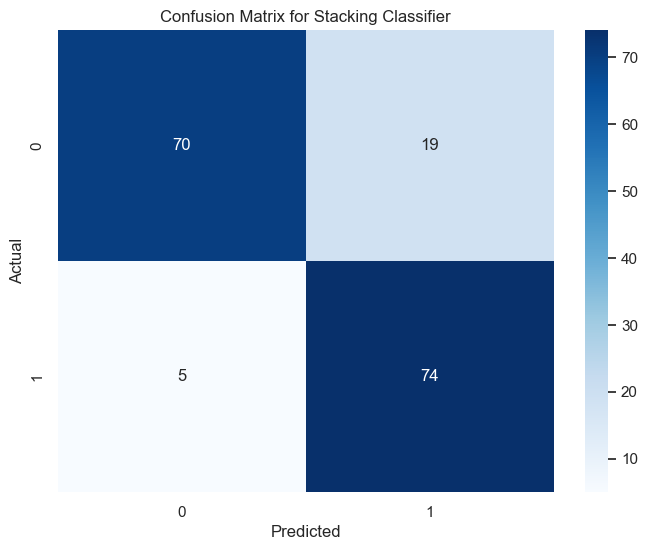

AUC：0.917


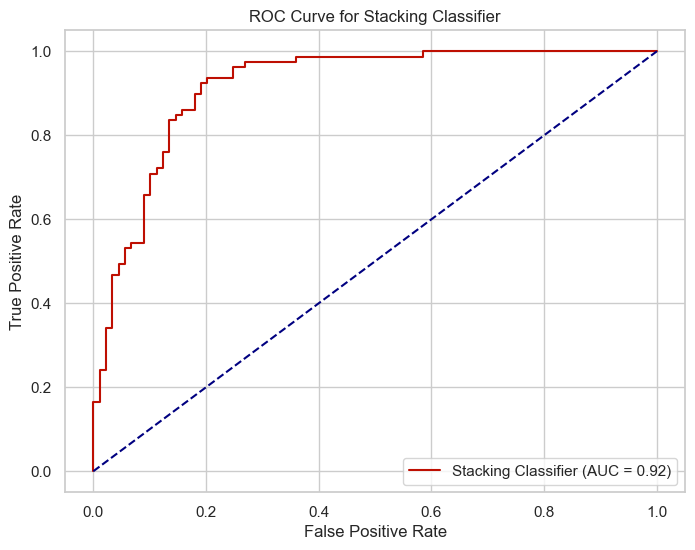

['stacking_3_model.pkl']

In [107]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('svc', svc_model),
    ('xgb', xgb_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_3_model.pkl')

In [108]:
#4 svm rf+lr

Cross-Validation Scores: [0.8875     0.89308176 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8919654088050315
Accuracy：0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



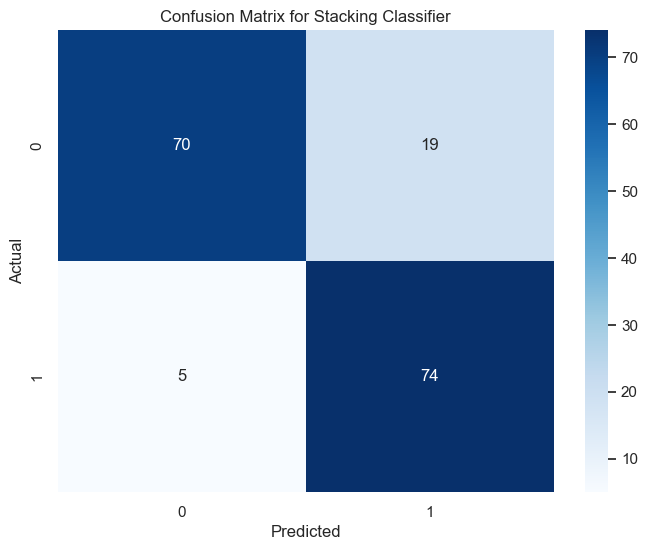

AUC：0.915


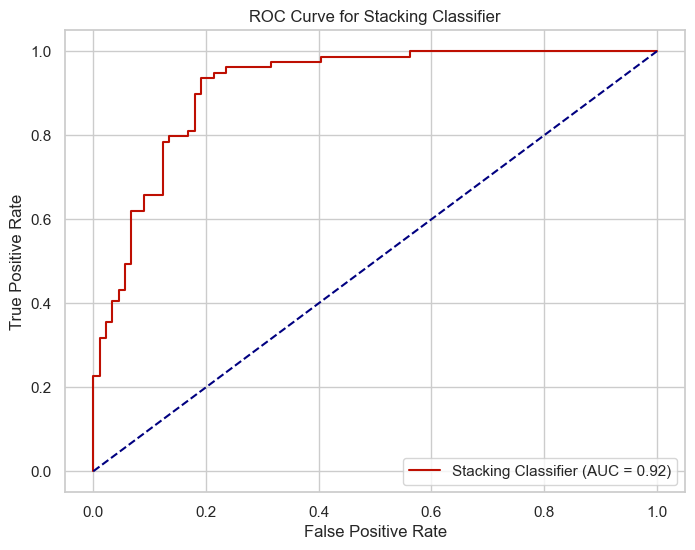

['stacking_4_model.pkl']

In [109]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")  
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('svc', svc_model),
    ('rf', rf_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_4_model.pkl')

In [110]:
#5 dc xgb+lr

Cross-Validation Scores: [0.88125    0.91194969 0.8490566  0.89308176 0.9245283 ]
Mean CV Accuracy: 0.8919732704402517
Accuracy：0.845
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        89
           1       0.79      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



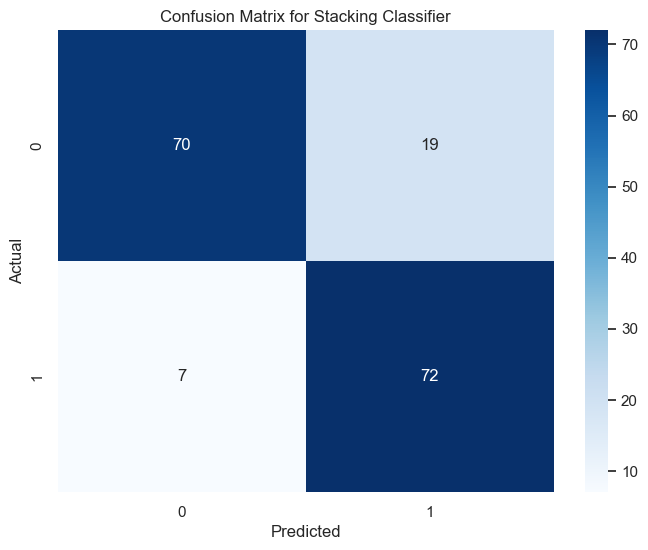

AUC：0.916


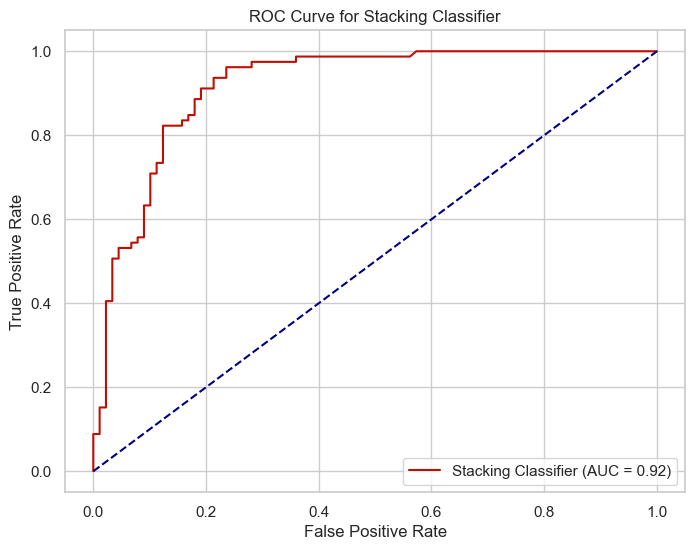

['stacking_5_model.pkl']

In [111]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('dc', dc_model),
    ('xgb', xgb_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_5_model.pkl')

In [112]:
#6 dc rf+lr

Cross-Validation Scores: [0.8875     0.89937107 0.86792453 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8932232704402516
Accuracy：0.845
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        89
           1       0.79      0.91      0.85        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168



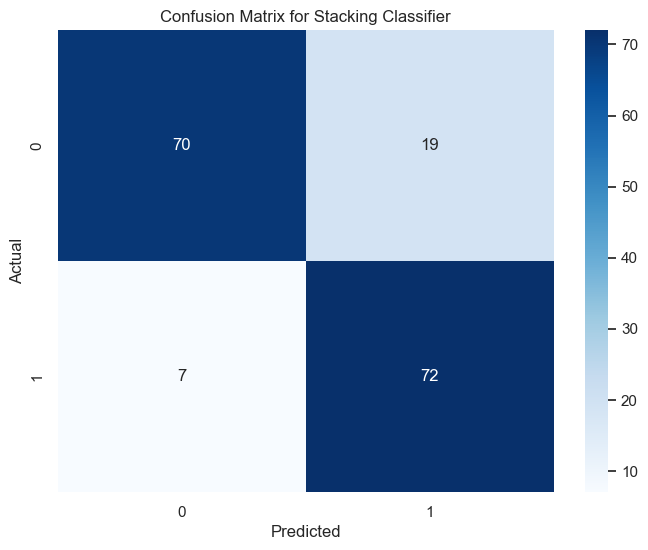

AUC：0.911


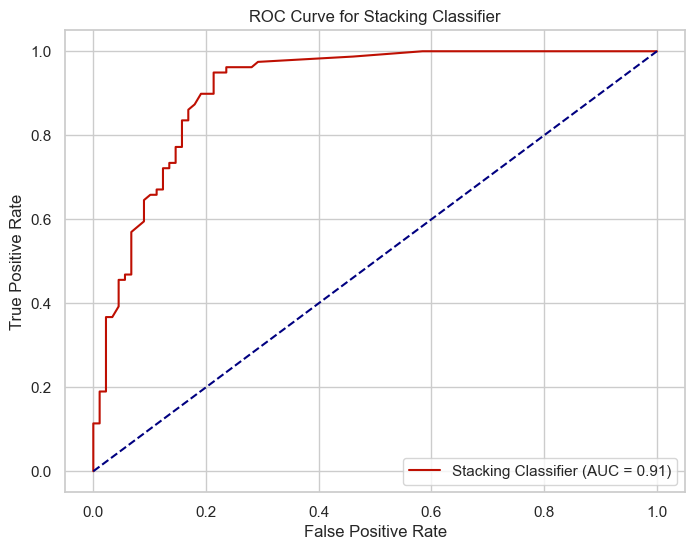

['stacking_6_model.pkl']

In [113]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl") 
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('dc', dc_model),
    ('rf', rf_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_6_model.pkl')

In [114]:
#7 knn xgb+lr

Cross-Validation Scores: [0.8875     0.90566038 0.85534591 0.89308176 0.9245283 ]
Mean CV Accuracy: 0.8932232704402516
Accuracy：0.863
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        89
           1       0.80      0.94      0.87        79

    accuracy                           0.86       168
   macro avg       0.87      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168



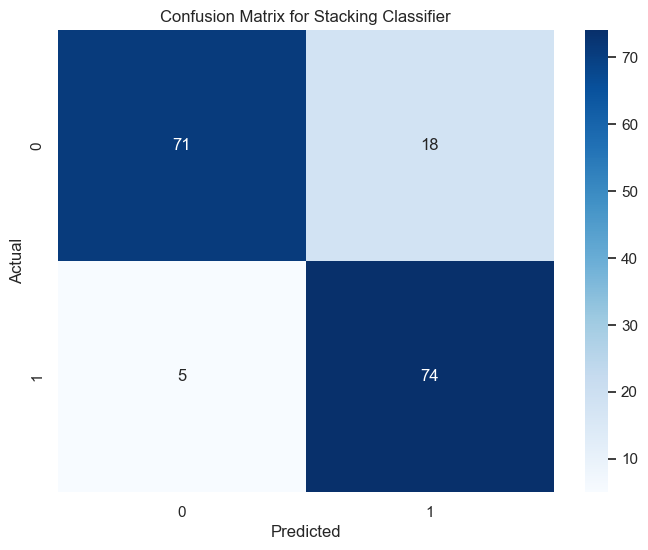

AUC：0.923


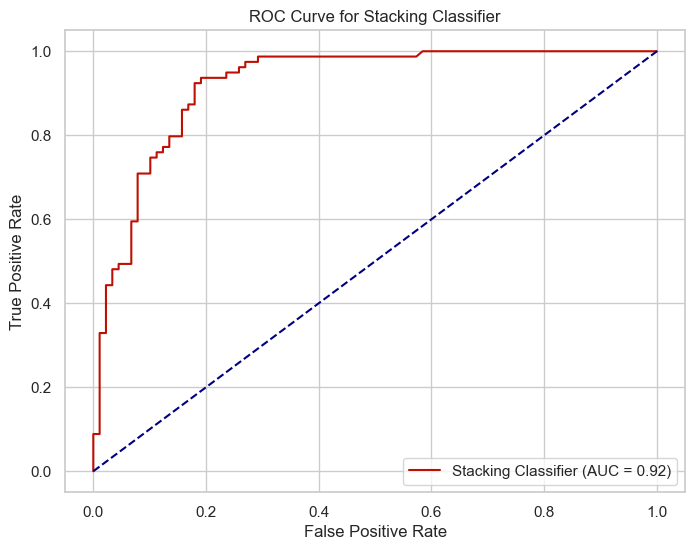

['stacking_7_model.pkl']

In [115]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl") 
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('knn', knn_model),
    ('xgb', xgb_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_7_model.pkl')

In [116]:
#8 knn rf+lr

Cross-Validation Scores: [0.8875     0.88679245 0.86792453 0.88679245 0.91823899]
Mean CV Accuracy: 0.8894496855345911
Accuracy：0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



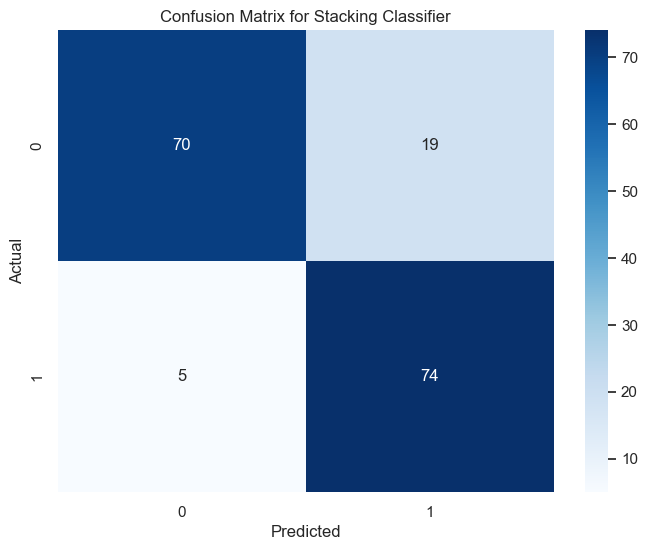

AUC：0.925


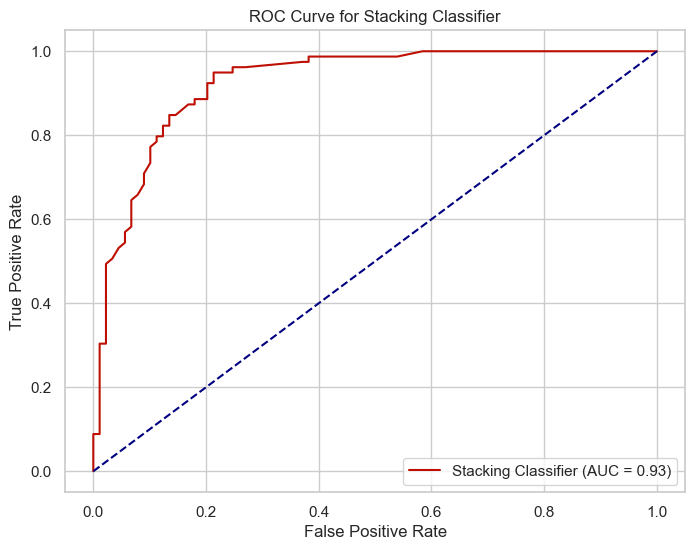

['stacking_8_model.pkl']

In [117]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl") 
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('knn', knn_model),
    ('rf', rf_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

# 准备特征和标签 
X = df2.drop(columns=['label'])
y = df2['label']

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_8_model.pkl')

In [118]:
#9 xgb rf+lr

Cross-Validation Scores: [0.8875     0.89937107 0.85534591 0.88679245 0.9245283 ]
Mean CV Accuracy: 0.8907075471698114
Accuracy：0.857
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        89
           1       0.80      0.94      0.86        79

    accuracy                           0.86       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



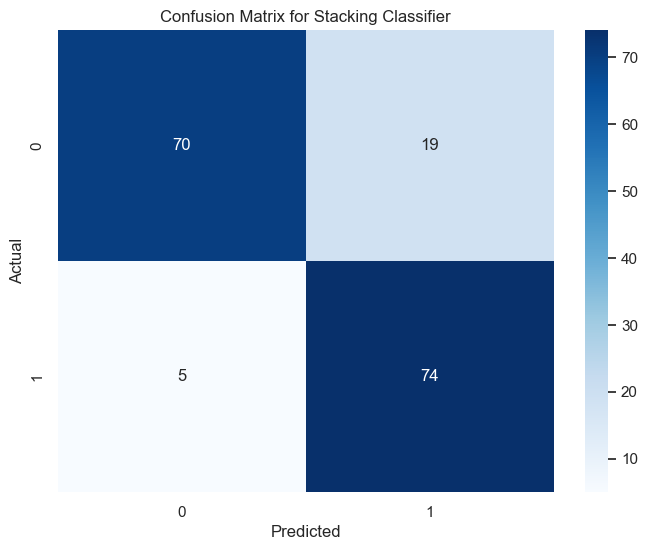

AUC：0.918


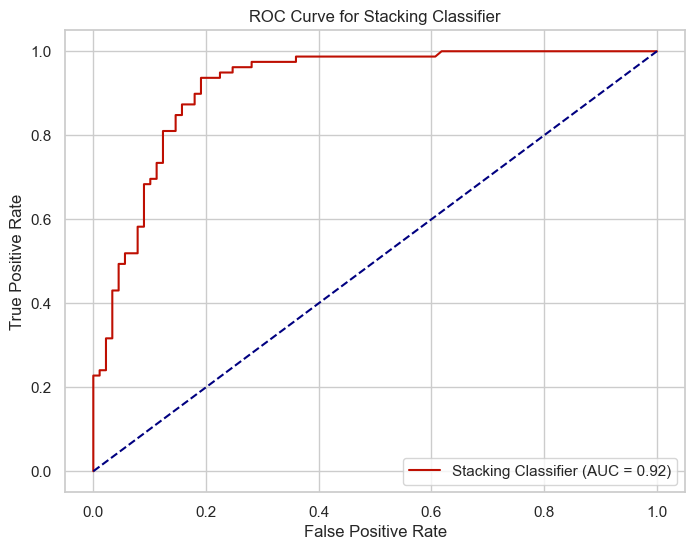

['stacking_9_model.pkl']

In [119]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model=joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")  


# 创建Stacking集成模型
estimators = [
    ('xgb', xgb_model),
    ('rf', rf_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr_model)

#准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 在训练集上拟合Stacking集成模型
stacking_clf.fit(X_train_resampled, y_train_resampled)

# 五折交叉验证评估模型性能
cv_scores = cross_val_score(stacking_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# 在测试集上预测并计算准确率
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy：{accuracy_stacking:.3f}')

# 输出综合报告
print(classification_report(y_test, y_pred_stacking))

# 绘制混淆矩阵
conf_mat_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_stacking, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()


# 计算ROC曲线和AUC值
y_scores_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_scores_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f'AUC：{roc_auc_stacking:.3f}')

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend()
plt.show()
#保存模型
joblib.dump(stacking_clf, 'stacking_9_model.pkl')

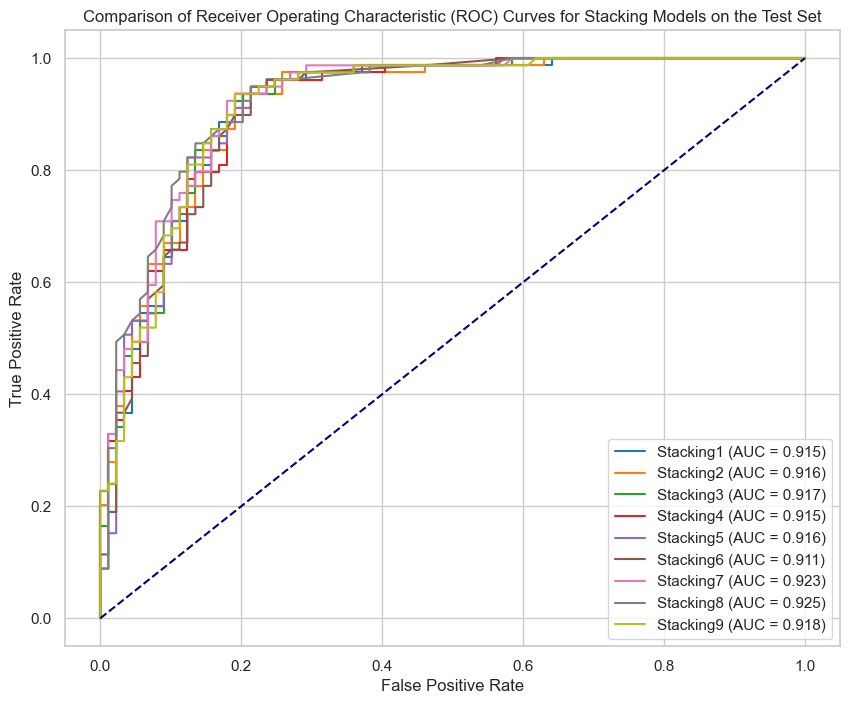

Stacking1: Accuracy = 0.851
Stacking2: Accuracy = 0.851
Stacking3: Accuracy = 0.857
Stacking4: Accuracy = 0.857
Stacking5: Accuracy = 0.845
Stacking6: Accuracy = 0.845
Stacking7: Accuracy = 0.863
Stacking8: Accuracy = 0.857
Stacking9: Accuracy = 0.857


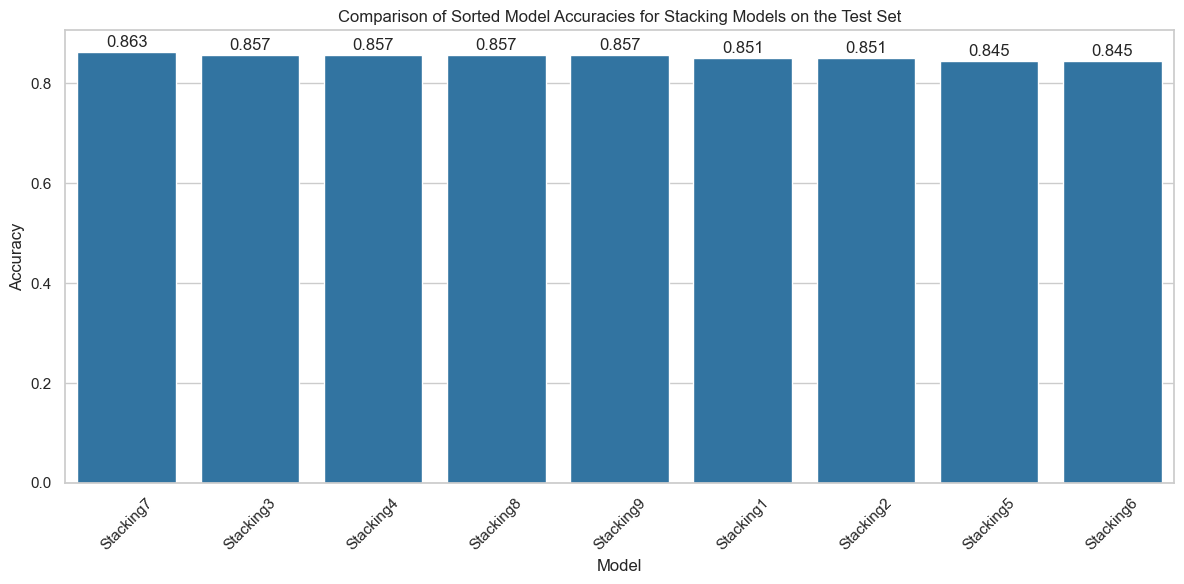

In [120]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE

# 加载保存的模型
stacking1_model = joblib.load('stacking_1_model.pkl')
stacking2_model = joblib.load('stacking_2_model.pkl')
stacking3_model = joblib.load('stacking_3_model.pkl')
stacking4_model = joblib.load('stacking_4_model.pkl')
stacking5_model = joblib.load('stacking_5_model.pkl')
stacking6_model = joblib.load('stacking_6_model.pkl')
stacking7_model = joblib.load('stacking_7_model.pkl')
stacking8_model = joblib.load('stacking_8_model.pkl')
stacking9_model = joblib.load('stacking_9_model.pkl')

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建模型列表
models = {
    'Stacking1': stacking1_model,
    'Stacking2': stacking2_model,
    'Stacking3': stacking3_model,
    'Stacking4': stacking4_model,
    'Stacking5': stacking5_model,
    'Stacking6': stacking6_model,
    'Stacking7': stacking7_model,
    'Stacking8': stacking8_model,
    'Stacking9': stacking9_model  
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 蓝色、橙色、绿色、红色、紫色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']  # 棕色、粉色、灰色、黄绿色

# 设置调色板
sns.set_palette(sns.color_palette(colors))


# 初始化数据保存结构
roc_curves = {}
accuracies = {}

# 计算每个模型的ROC曲线和准确率
for model_name, model in models.items():
    X_test_model = X_test  # 使用原始特征数据

    try:
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test_model)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test_model)
        else:
            raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")

        # 计算ROC曲线和AUC
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        # 计算准确率
        y_pred = model.predict(X_test_model)
        accuracy = accuracy_score(y_test, y_pred)

        # 存储ROC曲线和准确率
        roc_curves[model_name] = (fpr, tpr, roc_auc)
        accuracies[model_name] = accuracy

    except Exception as e:
        print(f"Error processing model {model_name}: {str(e)}")

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves for Stacking Models on the Test Set')
plt.legend()
plt.show()

# 打印各模型的准确率
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: Accuracy = {accuracy:.3f}')

# 将准确率按照值排序
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))

# 格式化准确率为三位小数
accuracies_formatted = {model_name: f'{accuracy:.3f}' for model_name, accuracy in sorted_accuracies.items()}

sns.barplot(x=list(accuracies_formatted.keys()), y=list(sorted_accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sorted Model Accuracies for Stacking Models on the Test Set')
plt.xticks(rotation=45)

# 在每个条形上方显示具体数值
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, str(accuracies_formatted[list(sorted_accuracies.keys())[i]]), ha='center')

plt.tight_layout()
plt.show()

In [122]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
import pandas as pd
from imblearn.over_sampling import SMOTE

# 加载保存的模型
mlp_model = joblib.load("MLP_best_model.pkl")
svc_model = joblib.load("SVC_best_model.pkl")
dc_model = joblib.load("DecisionTreeClassifier_best_model.pkl")
gb_model = joblib.load('GradientBoostingClassifier_best_model.pkl')
rf_model = joblib.load("RandomForestClassifier_best_model.pkl")
xgb_model = joblib.load("xgb_best_model.pkl")
lgb_model = joblib.load("lgb_best_model.pkl")
lr_model = joblib.load("LogisticRegression_best_model.pkl")
knn_model = joblib.load("KNeighborsClassifier_best_model.pkl")
voting1_model = joblib.load('voting_1_model.pkl')
voting2_model = joblib.load('voting_2_model.pkl')
voting3_model = joblib.load('voting_3_model.pkl')
voting4_model = joblib.load('voting_4_model.pkl')
voting5_model = joblib.load('voting_5_model.pkl')
voting6_model = joblib.load('voting_6_model.pkl')
voting7_model = joblib.load('voting_7_model.pkl')
voting8_model = joblib.load('voting_8_model.pkl')
voting9_model = joblib.load('voting_9_model.pkl')
voting10_model = joblib.load('voting_10_model.pkl')
voting11_model = joblib.load('voting_11_model.pkl')
voting12_model = joblib.load('voting_12_model.pkl')
voting13_model = joblib.load('voting_13_model.pkl')
voting14_model = joblib.load('voting_14_model.pkl')
voting15_model = joblib.load('voting_15_model.pkl')
voting16_model = joblib.load('voting_16_model.pkl')
voting17_model = joblib.load('voting_17_model.pkl')
voting18_model = joblib.load('voting_18_model.pkl')
voting19_model = joblib.load('voting_19_model.pkl')
voting20_model = joblib.load('voting_20_model.pkl')
voting21_model = joblib.load('voting_21_model.pkl')
voting22_model = joblib.load('voting_22_model.pkl')
voting23_model = joblib.load('voting_23_model.pkl')
voting24_model = joblib.load('voting_24_model.pkl')
voting25_model = joblib.load('voting_25_model.pkl')
stacking1_model = joblib.load('stacking_1_model.pkl')
stacking2_model = joblib.load('stacking_2_model.pkl')
stacking3_model = joblib.load('stacking_3_model.pkl')
stacking4_model = joblib.load('stacking_4_model.pkl')
stacking5_model = joblib.load('stacking_5_model.pkl')
stacking6_model = joblib.load('stacking_6_model.pkl')
stacking7_model = joblib.load('stacking_7_model.pkl')
stacking8_model = joblib.load('stacking_8_model.pkl')
stacking9_model = joblib.load('stacking_9_model.pkl')

# 准备特征和标签
X = df2.drop(columns=['label'])  # 特征
y = df2['label']  # 标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用SMOTE算法处理训练集
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 创建模型列表
models = {
    'MLP': mlp_model,
    'SVM': svc_model,
    'Decision Tree': dc_model,
    'Gradient Boosting Trees': gb_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'Logistic Regression': lr_model,
    'K-Nearest Neighbors': knn_model,
    'voting1': voting1_model,
    'voting2': voting2_model,
    'voting3': voting3_model,
    'voting4': voting4_model,
    'voting5': voting5_model,
    'voting6': voting6_model,
    'voting7': voting7_model,
    'voting8': voting8_model,
    'voting9': voting9_model,
    'voting10': voting10_model,
    'voting11': voting11_model,
    'voting12': voting12_model,
    'voting13': voting13_model,
    'voting14': voting14_model,
    'voting15' :voting15_model,
    'voting16': voting16_model,
    'voting17': voting17_model,
    'voting18': voting18_model,
    'voting19': voting19_model,
    'voting20': voting20_model,
    'voting21': voting21_model,
    'voting22': voting22_model,
    'voting23': voting23_model,
    'voting24': voting24_model,
    'voting25': voting25_model, 
    'stacking1': stacking1_model,
    'stacking2': stacking2_model,
    'stacking3': stacking3_model,
    'stacking4': stacking4_model,
    'stacking5': stacking5_model,
    'stacking6': stacking6_model,
    'stacking7': stacking7_model,
    'stacking8': stacking8_model,
    'stacking9': stacking9_model  
}


# 初始化数据保存结构
results = []

# 计算每个模型的指标
for model_name, model in models.items():
    try:
        # 获取模型预测结果
        y_pred = model.predict(X_test)
        
        # 计算精确度、召回率、F1值
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # 计算AUC
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # 计算准确率
        accuracy = accuracy_score(y_test, y_pred)
        
        # 保存结果
        results.append({
            'Model': model_name,
            'AUC': roc_auc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
        
    except Exception as e:
        print(f"Error processing model {model_name}: {str(e)}")

# 将结果保存到CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('model_metrics(TCGA).csv', index=False)


In [42]:
import numpy as np
import pandas as pd

df3 = pd.read_csv('cgga(lgg gbm).csv', encoding = 'utf-8')

df3

Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       1                51     2     0     0     0     0     0    0   
1        0       1                42     2     0     0     0     0     0    0   
2        0       0                33     2     1     0     0     0     0    1   
3        0       0                43     2     1     0     0     0     0    1   
4        0       1                38     2     0     0     0     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
190      1       0                32     2     1     1     1     0     0    0   
191      1       0                42     2     0     0     0     0     1    0   
192      1       1                52     2     0     0     0     0     0    0   
193      0       1                44     2     1     1     1     0     0    0   
194      1       0                52     2     1     1     1     0     0    0   

     ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0    ...      0    0       0     0      0        0       0     0     0       0  
1    ...      0    0       0     0      0        0       0     0     0       0  
2    ...      0    0       0     0      0        0       0     0     0       0  
3    ...      0    0       0     0      0        0       0     0     0       0  
4    ...      0    0       0     0      0        0       0     0     0       0  
..   ...    ...  ...     ...   ...    ...      ...     ...   ...   ...     ...  
190  ...      0    0       0     0      0        1       0     0     1       1  
191  ...      0    0       0     0      0        0       0     0     0       0  
192  ...      0    0       0     0      0        0       0     0     0       0  
193  ...      0    0       0     0      0        1       0     0     0       0  
194  ...      0    0       0     0      0        0       0     0     0       0  

[195 rows x 24 columns]

In [43]:
# 导入 pandas 库
import pandas as pd

# 将第一列保存为一个 Series
first_column = df3.iloc[:, 0]

# 将第一列删除
df3 = df3.drop(df3.columns[0], axis=1)

# 将 Series 添加到 DataFrame 的最后一列
df3['label'] = first_column

# 显示修改后的 DataFrame
df3

Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
0         1                51     2     0     0     0     0     0    0      0   
1         1                42     2     0     0     0     0     0    0      0   
2         0                33     2     1     0     0     0     0    1      0   
3         0                43     2     1     0     0     0     0    1      0   
4         1                38     2     0     0     0     0     0    0      0   
..      ...               ...   ...   ...   ...   ...   ...   ...  ...    ...   
190       0                32     2     1     1     1     0     0    0      1   
191       0                42     2     0     0     0     0     1    0      0   
192       1                52     2     0     0     0     0     0    0      0   
193       1                44     2     1     1     1     0     0    0      0   
194       0                52     2     1     1     1     0     0    0      0   

     ...  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  label  
0    ...    0       0     0      0        0       0     0     0       0      0  
1    ...    0       0     0      0        0       0     0     0       0      0  
2    ...    0       0     0      0        0       0     0     0       0      0  
3    ...    0       0     0      0        0       0     0     0       0      0  
4    ...    0       0     0      0        0       0     0     0       0      0  
..   ...  ...     ...   ...    ...      ...     ...   ...   ...     ...    ...  
190  ...    0       0     0      0        1       0     0     1       1      1  
191  ...    0       0     0      0        0       0     0     0       0      1  
192  ...    0       0     0      0        0       0     0     0       0      1  
193  ...    0       0     0      0        1       0     0     0       0      0  
194  ...    0       0     0      0        0       0     0     0       0      1  

[195 rows x 24 columns]

In [44]:
import pandas as pd

# 确定 df2 和 df3的特征数量
num_features_df2 = df2.shape[1]
num_features_df3 = df3.shape[1]

# 如果 df3 的特征数量小于 df2，添加缺失的特征
if num_features_df3 < num_features_df2:
    # 获取 df2 中的特征名称，确保与 df3 中的特征名称一致
    missing_features = df2.columns.difference(df3.columns)
    
    # 在 df3 中添加缺失的特征列，填充 NaN 或者使用默认值
    for feature in missing_features:
        df3[feature] = pd.Series(dtype='float64')  # 根据需要指定数据类型

# 如果 df3的特征数量大于 df2，删除多余的特征
elif num_features_df3 > num_features_df2:
    # 获取 df3 中多余的特征名称
    extra_features = df3.columns.difference(df2.columns)
    
    # 从 df3 中删除多余的特征列
    df3.drop(columns=extra_features, inplace=True)


# 如果需要保持和 df2 相同的特征顺序，可以重新排序 df3 的列
df3 = df3[df2.columns]

# 确认调整后的 df3
df3

EGFR  TP53  Race  IDH2  Gender  NF1  MUC16  Age_at_diagnosis  PTEN  IDH1  \
0       0     0     2     0       1    0      0                51     0     0   
1       0     0     2     0       1    0      0                42     0     0   
2       0     0     2     0       0    0      0                33     0     1   
3       0     0     2     0       0    0      0                43     0     1   
4       0     0     2     0       1    0      0                38     0     0   
..    ...   ...   ...   ...     ...  ...    ...               ...   ...   ...   
190     0     1     2     0       0    0      1                32     0     1   
191     1     0     2     0       0    0      0                42     0     0   
192     0     0     2     0       1    0      0                52     0     0   
193     0     1     2     0       1    0      0                44     0     1   
194     0     1     2     0       0    0      0                52     0     1   

     CIC  label  
0      0      0  
1      0      0  
2      1      0  
3      1      0  
4      0      0  
..   ...    ...  
190    0      1  
191    0      1  
192    0      1  
193    0      0  
194    0      1  

[195 rows x 12 columns]

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EGFR              839 non-null    int64  
 1   TP53              839 non-null    int64  
 2   Race              839 non-null    int64  
 3   IDH2              839 non-null    int64  
 4   Gender            839 non-null    int64  
 5   NF1               839 non-null    int64  
 6   MUC16             839 non-null    int64  
 7   Age_at_diagnosis  839 non-null    float64
 8   PTEN              839 non-null    int64  
 9   IDH1              839 non-null    int64  
 10  CIC               839 non-null    int64  
 11  label             839 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 78.8 KB


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EGFR              195 non-null    int64
 1   TP53              195 non-null    int64
 2   Race              195 non-null    int64
 3   IDH2              195 non-null    int64
 4   Gender            195 non-null    int64
 5   NF1               195 non-null    int64
 6   MUC16             195 non-null    int64
 7   Age_at_diagnosis  195 non-null    int64
 8   PTEN              195 non-null    int64
 9   IDH1              195 non-null    int64
 10  CIC               195 non-null    int64
 11  label             195 non-null    int64
dtypes: int64(12)
memory usage: 18.4 KB


In [47]:
# 将 'Age_at_diagnosis' 列转换为浮点数
df3['Age_at_diagnosis'] = df3['Age_at_diagnosis'].astype('float64')
df3.info()
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EGFR              195 non-null    int64  
 1   TP53              195 non-null    int64  
 2   Race              195 non-null    int64  
 3   IDH2              195 non-null    int64  
 4   Gender            195 non-null    int64  
 5   NF1               195 non-null    int64  
 6   MUC16             195 non-null    int64  
 7   Age_at_diagnosis  195 non-null    float64
 8   PTEN              195 non-null    int64  
 9   IDH1              195 non-null    int64  
 10  CIC               195 non-null    int64  
 11  label             195 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 18.4 KB


EGFR  TP53  Race  IDH2  Gender  NF1  MUC16  Age_at_diagnosis  PTEN  IDH1  \
0       0     0     2     0       1    0      0              51.0     0     0   
1       0     0     2     0       1    0      0              42.0     0     0   
2       0     0     2     0       0    0      0              33.0     0     1   
3       0     0     2     0       0    0      0              43.0     0     1   
4       0     0     2     0       1    0      0              38.0     0     0   
..    ...   ...   ...   ...     ...  ...    ...               ...   ...   ...   
190     0     1     2     0       0    0      1              32.0     0     1   
191     1     0     2     0       0    0      0              42.0     0     0   
192     0     0     2     0       1    0      0              52.0     0     0   
193     0     1     2     0       1    0      0              44.0     0     1   
194     0     1     2     0       0    0      0              52.0     0     1   

     CIC  label  
0      0      0  
1      0      0  
2      1      0  
3      1      0  
4      0      0  
..   ...    ...  
190    0      1  
191    0      1  
192    0      1  
193    0      0  
194    0      1  

[195 rows x 12 columns]

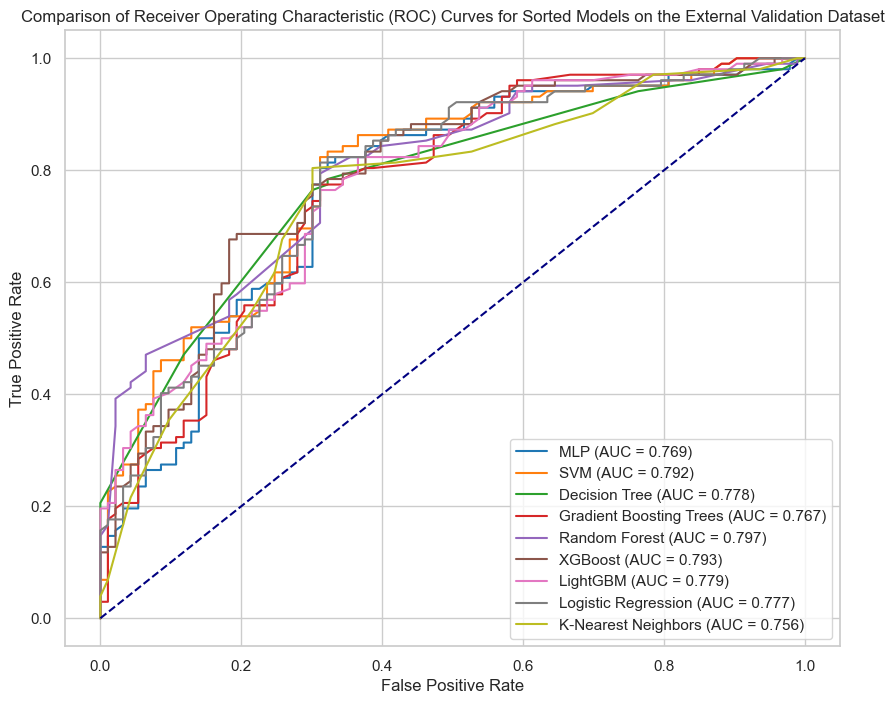

MLP: Accuracy = 0.733
SVM: Accuracy = 0.733
Decision Tree: Accuracy = 0.733
Gradient Boosting Trees: Accuracy = 0.697
Random Forest: Accuracy = 0.744
XGBoost: Accuracy = 0.738
LightGBM: Accuracy = 0.728
Logistic Regression: Accuracy = 0.733
K-Nearest Neighbors: Accuracy = 0.744


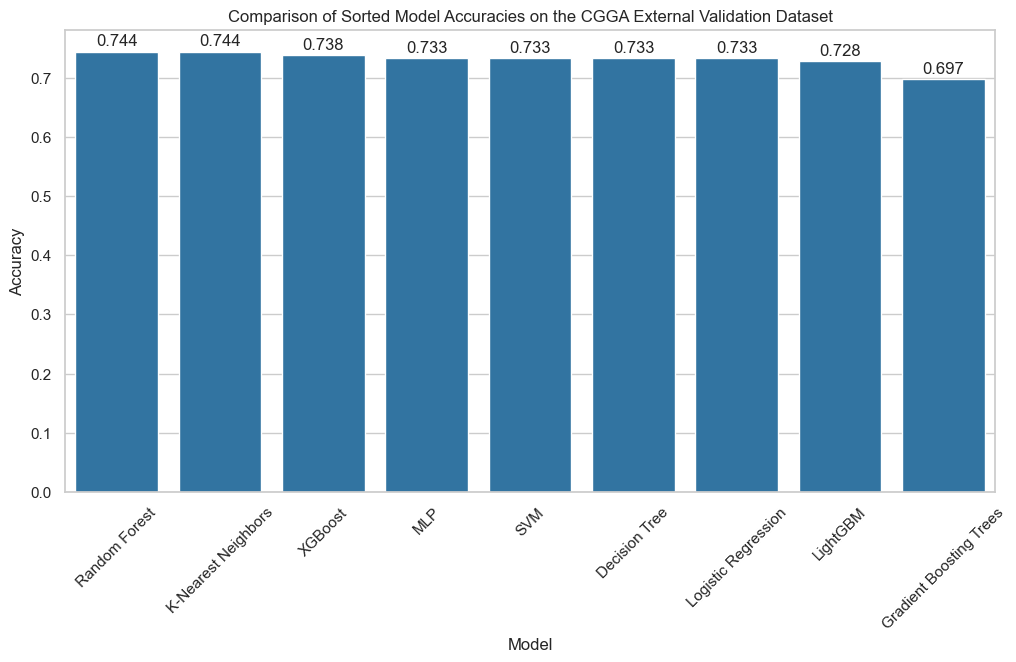

In [48]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc

# 加载所有模型
models = {
    'MLP': joblib.load("MLP_best_model.pkl"),
    'SVM': joblib.load("SVC_best_model.pkl"),
    'Decision Tree': joblib.load("DecisionTreeClassifier_best_model.pkl"),
    'Gradient Boosting Trees': joblib.load("GradientBoostingClassifier_best_model.pkl"),
    'Random Forest': joblib.load("RandomForestClassifier_best_model.pkl"),
    'XGBoost': joblib.load("xgb_best_model.pkl"),
    'LightGBM': joblib.load("lgb_best_model.pkl"),
    'Logistic Regression': joblib.load("LogisticRegression_best_model.pkl"),
    'K-Nearest Neighbors': joblib.load("KNeighborsClassifier_best_model.pkl")
}

# 假设 df3 已经定义
# 准备特征和标签
X_test = df3.drop(columns=['label'])
y_test = df3['label']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 蓝色、橙色、绿色、红色、紫色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']  # 棕色、粉色、灰色、黄绿色

# 设置调色板
sns.set_palette(sns.color_palette(colors))

# 初始化数据保存结构
roc_curves = {}
accuracies = {}

# 计算每个模型的ROC曲线和准确率
for model_name, model in models.items():
    X_test_model = X_test  # 使用原始特征数据

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_model)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_model)
    else:
        raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    y_pred = model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)

    roc_curves[model_name] = (fpr, tpr, roc_auc)
    accuracies[model_name] = accuracy

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves for Sorted Models on the External Validation Dataset')
plt.legend()
plt.show()

# 打印各模型的准确率
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: Accuracy = {accuracy:.3f}')

# 将准确率按照值排序
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sorted Model Accuracies on the CGGA External Validation Dataset')
plt.xticks(rotation=45)

# 在每个条形上方显示具体数值
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()


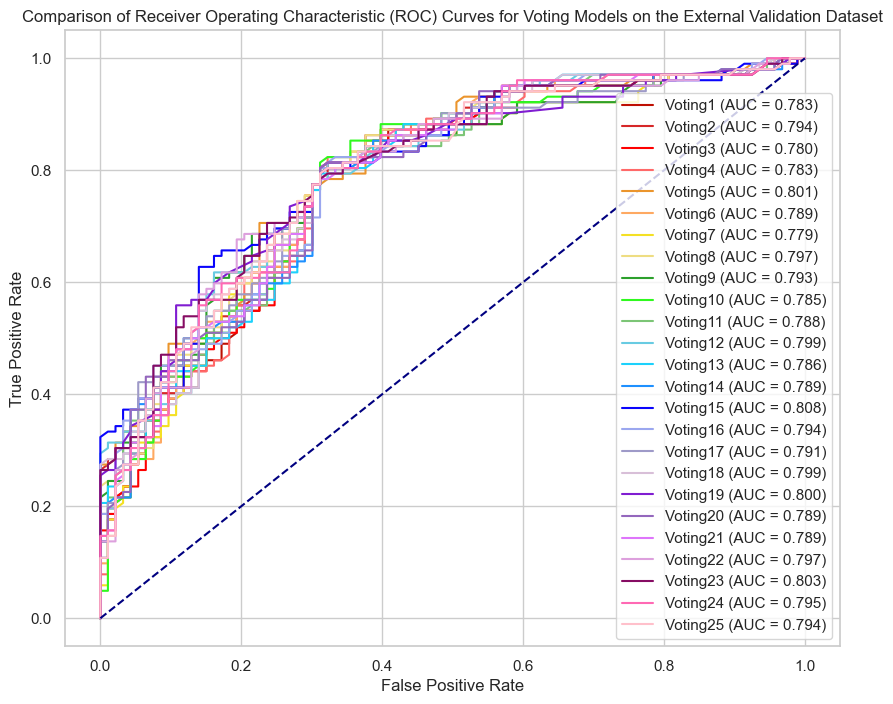

Voting1: Accuracy = 0.733
Voting2: Accuracy = 0.733
Voting3: Accuracy = 0.733
Voting4: Accuracy = 0.738
Voting5: Accuracy = 0.738
Voting6: Accuracy = 0.733
Voting7: Accuracy = 0.733
Voting8: Accuracy = 0.738
Voting9: Accuracy = 0.733
Voting10: Accuracy = 0.738
Voting11: Accuracy = 0.733
Voting12: Accuracy = 0.738
Voting13: Accuracy = 0.733
Voting14: Accuracy = 0.733
Voting15: Accuracy = 0.733
Voting16: Accuracy = 0.733
Voting17: Accuracy = 0.733
Voting18: Accuracy = 0.733
Voting19: Accuracy = 0.738
Voting20: Accuracy = 0.733
Voting21: Accuracy = 0.733
Voting22: Accuracy = 0.733
Voting23: Accuracy = 0.733
Voting24: Accuracy = 0.733
Voting25: Accuracy = 0.733


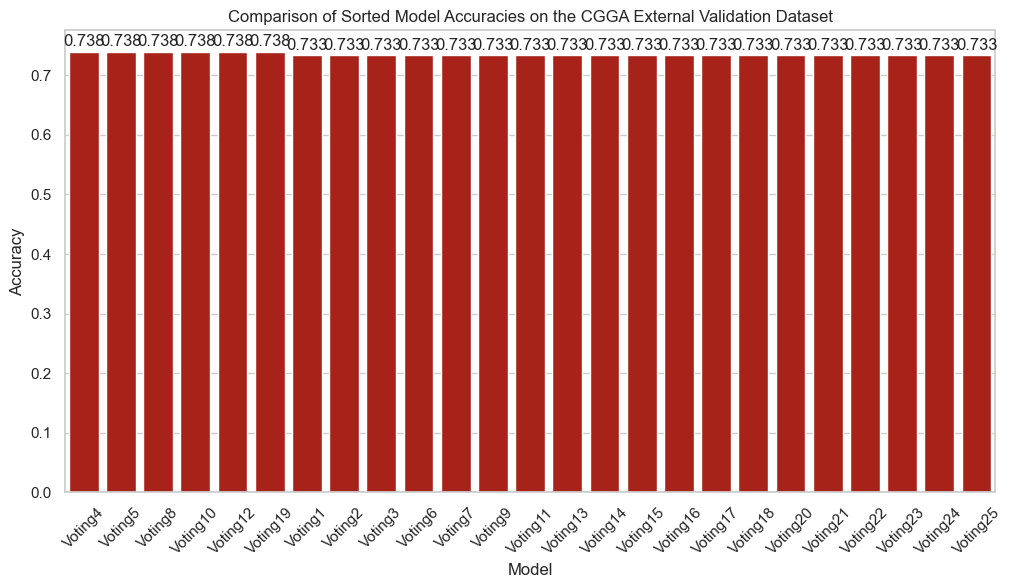

In [123]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc

# 加载所有模型
voting1_model = joblib.load('voting_1_model.pkl')
voting2_model = joblib.load('voting_2_model.pkl')
voting3_model = joblib.load('voting_3_model.pkl')
voting4_model = joblib.load('voting_4_model.pkl')
voting5_model = joblib.load('voting_5_model.pkl')
voting6_model = joblib.load('voting_6_model.pkl')
voting7_model = joblib.load('voting_7_model.pkl')
voting8_model = joblib.load('voting_8_model.pkl')
voting9_model = joblib.load('voting_9_model.pkl')
voting10_model = joblib.load('voting_10_model.pkl')
voting11_model = joblib.load('voting_11_model.pkl')
voting12_model = joblib.load('voting_12_model.pkl')
voting13_model = joblib.load('voting_13_model.pkl')
voting14_model = joblib.load('voting_14_model.pkl')
voting15_model = joblib.load('voting_15_model.pkl')
voting16_model = joblib.load('voting_16_model.pkl')
voting17_model = joblib.load('voting_17_model.pkl')
voting18_model = joblib.load('voting_18_model.pkl')
voting19_model = joblib.load('voting_19_model.pkl')
voting20_model = joblib.load('voting_20_model.pkl')
voting21_model = joblib.load('voting_21_model.pkl')
voting22_model = joblib.load('voting_22_model.pkl')
voting23_model = joblib.load('voting_23_model.pkl')
voting24_model = joblib.load('voting_24_model.pkl')
voting25_model = joblib.load('voting_25_model.pkl')

# 假设 df3 已经定义
# 准备特征和标签
X_test = df3.drop(columns=['label'])
y_test = df3['label']

# 创建模型列表
models = {
    'Voting1': voting1_model,
    'Voting2': voting2_model,
    'Voting3': voting3_model,
    'Voting4': voting4_model,
    'Voting5': voting5_model,
    'Voting6': voting6_model,
    'Voting7': voting7_model,
    'Voting8': voting8_model,
    'Voting9': voting9_model,
    'Voting10': voting10_model,
    'Voting11': voting11_model,
    'Voting12': voting12_model,
    'Voting13': voting13_model,
    'Voting14': voting14_model,
    'Voting15' :voting15_model,
    'Voting16': voting16_model,
    'Voting17': voting17_model,
    'Voting18': voting18_model,
    'Voting19': voting19_model,
    'Voting20': voting20_model,
    'Voting21': voting21_model,
    'Voting22': voting22_model,
    'Voting23': voting23_model,
    'Voting24': voting24_model,
    'Voting25': voting25_model, 
}


# 调整后的颜色列表
colors = [
    '#BE0F02', '#d62728', '#FE0000', '#FF6969',  # 红色系列
    '#EB952D', '#FEA962', '#F4E024', '#eedd82',  # 橙色到金色系列
    '#2ca02c', '#2FF91F', '#7cc576',              # 绿色系列
    '#68CBE2', '#1CD1FC', '#1e90ff', '#0A04FC',  # 蓝色系列
    '#9BA7EF', '#9e9ac8', '#d8bfd8',              # 蓝色系列
    '#801DD1', '#9467bd', '#DE75FB', '#dda0dd',  # 紫色系列
    '#860C63', '#ff69b4', '#ffc0cb'               # 粉色系列
]

sns.set_palette(sns.color_palette(colors))

# 初始化数据保存结构
roc_curves = {}
accuracies = {}

# 计算每个模型的ROC曲线和准确率
for model_name, model in models.items():
    X_test_model = X_test  # 使用原始特征数据

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_model)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_model)
    else:
        raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    y_pred = model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)

    roc_curves[model_name] = (fpr, tpr, roc_auc)
    accuracies[model_name] = accuracy

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves for Voting Models on the External Validation Dataset')
plt.legend()
plt.show()

# 打印各模型的准确率
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: Accuracy = {accuracy:.3f}')

# 将准确率按照值排序
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sorted Model Accuracies on the CGGA External Validation Dataset')
plt.xticks(rotation=45)

# 在每个条形上方显示具体数值
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()


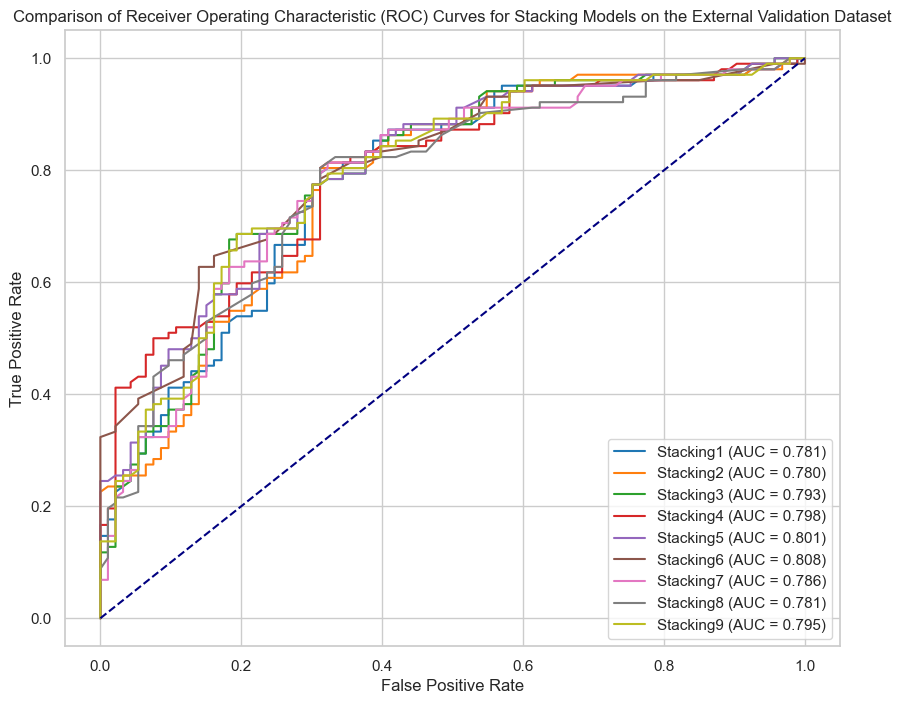

Stacking1: Accuracy = 0.738
Stacking2: Accuracy = 0.733
Stacking3: Accuracy = 0.738
Stacking4: Accuracy = 0.738
Stacking5: Accuracy = 0.733
Stacking6: Accuracy = 0.733
Stacking7: Accuracy = 0.738
Stacking8: Accuracy = 0.738
Stacking9: Accuracy = 0.738


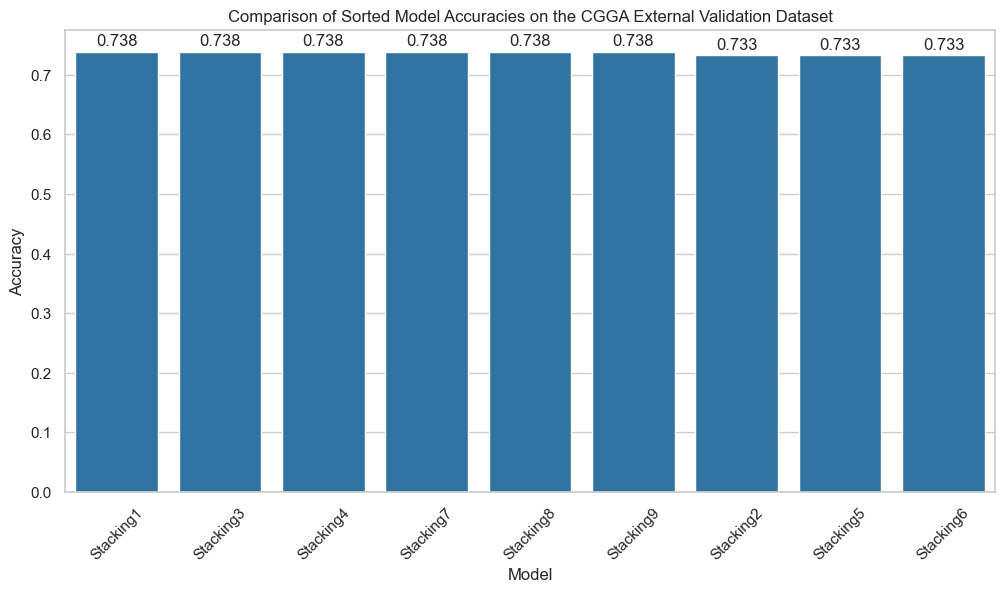

In [124]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc

# 加载保存的模型
stacking1_model = joblib.load('stacking_1_model.pkl')
stacking2_model = joblib.load('stacking_2_model.pkl')
stacking3_model = joblib.load('stacking_3_model.pkl')
stacking4_model = joblib.load('stacking_4_model.pkl')
stacking5_model = joblib.load('stacking_5_model.pkl')
stacking6_model = joblib.load('stacking_6_model.pkl')
stacking7_model = joblib.load('stacking_7_model.pkl')
stacking8_model = joblib.load('stacking_8_model.pkl')
stacking9_model = joblib.load('stacking_9_model.pkl')
# 假设 df3 已经定义
# 准备特征和标签
X_test = df3.drop(columns=['label'])
y_test = df3['label']

# 创建模型列表
models = {
    'Stacking1': stacking1_model,
    'Stacking2': stacking2_model,
    'Stacking3': stacking3_model,
    'Stacking4': stacking4_model,
    'Stacking5': stacking5_model,
    'Stacking6': stacking6_model,
    'Stacking7': stacking7_model,
    'Stacking8': stacking8_model,
    'Stacking9': stacking9_model  
}


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 蓝色、橙色、绿色、红色、紫色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']  # 棕色、粉色、灰色、黄绿色

# 设置调色板
sns.set_palette(sns.color_palette(colors))

# 初始化数据保存结构
roc_curves = {}
accuracies = {}

# 计算每个模型的ROC曲线和准确率
for model_name, model in models.items():
    X_test_model = X_test  # 使用原始特征数据

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_model)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_model)
    else:
        raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    y_pred = model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)

    roc_curves[model_name] = (fpr, tpr, roc_auc)
    accuracies[model_name] = accuracy

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristic (ROC) Curves for Stacking Models on the External Validation Dataset')
plt.legend()
plt.show()

# 打印各模型的准确率
for model_name, accuracy in accuracies.items():
    print(f'{model_name}: Accuracy = {accuracy:.3f}')

# 将准确率按照值排序
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# 绘制准确率对比图
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sorted Model Accuracies on the CGGA External Validation Dataset')
plt.xticks(rotation=45)

# 在每个条形上方显示具体数值
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()

In [125]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
import pandas as pd
from imblearn.over_sampling import SMOTE

# 加载所有模型
models = {
'MLP': joblib.load("MLP_best_model.pkl"),
    'SVM': joblib.load("SVC_best_model.pkl"),
    'DecisionTree': joblib.load("DecisionTreeClassifier_best_model.pkl"),
    'GradientBoosting': joblib.load("GradientBoostingClassifier_best_model.pkl"),
    'RandomForest': joblib.load("RandomForestClassifier_best_model.pkl"),
    'XGBoost': joblib.load("xgb_best_model.pkl"),
    'LightGBM': joblib.load("lgb_best_model.pkl"),
    'LogisticRegression': joblib.load("LogisticRegression_best_model.pkl"),
    'KNeighbors': joblib.load("KNeighborsClassifier_best_model.pkl"),
    'voting1_model': joblib.load('voting_1_model.pkl'),
'voting2_model': joblib.load('voting_2_model.pkl'),
'voting3_model': joblib.load('voting_3_model.pkl'),
'voting4_model': joblib.load('voting_4_model.pkl'),
'voting5_model': joblib.load('voting_5_model.pkl'),
'voting6_model': joblib.load('voting_6_model.pkl'),
'voting7_model': joblib.load('voting_7_model.pkl'),
'voting8_model': joblib.load('voting_8_model.pkl'),
'voting9_model': joblib.load('voting_9_model.pkl'),
'voting10_model': joblib.load('voting_10_model.pkl'),
'voting11_model': joblib.load('voting_11_model.pkl'),
'voting12_model': joblib.load('voting_12_model.pkl'),
'voting13_model': joblib.load('voting_13_model.pkl'),
'voting14_model': joblib.load('voting_14_model.pkl'),
'voting15_model': joblib.load('voting_15_model.pkl'),
'voting16_model': joblib.load('voting_16_model.pkl'),
'voting17_model': joblib.load('voting_17_model.pkl'),
'voting18_model': joblib.load('voting_18_model.pkl'),
'voting19_model': joblib.load('voting_19_model.pkl'),
'voting20_model': joblib.load('voting_20_model.pkl'),
'voting21_model': joblib.load('voting_21_model.pkl'),
'voting22_model': joblib.load('voting_22_model.pkl'),
'voting23_model': joblib.load('voting_23_model.pkl'),
'voting24_model': joblib.load('voting_24_model.pkl'),
'voting25_model': joblib.load('voting_25_model.pkl'),
    'stacking1_model': joblib.load('stacking_1_model.pkl'),
    'stacking2_model': joblib.load('stacking_2_model.pkl'),
    'stacking3_model': joblib.load('stacking_3_model.pkl'),
    'stacking4_model': joblib.load('stacking_4_model.pkl'),
    'stacking5_model': joblib.load('stacking_5_model.pkl'),
    'stacking6_model': joblib.load('stacking_6_model.pkl'),
    'stacking7_model': joblib.load('stacking_7_model.pkl'),
    'stacking8_model': joblib.load('stacking_8_model.pkl'),
    'stacking9_model': joblib.load('stacking_9_model.pkl')
}

# 准备特征和标签
X_test = df3.drop(columns=['label'])
y_test = df3['label']

# 初始化数据保存结构
results = []

# 计算每个模型的指标
for model_name, model in models.items():
    try:
        # 获取模型预测结果
        y_pred = model.predict(X_test)
        
        # 计算精确度、召回率、F1值
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # 计算AUC
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            raise AttributeError(f"Model {model_name} does not have a method to obtain prediction scores.")
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        
        # 计算准确率
        accuracy = accuracy_score(y_test, y_pred)
        
        # 保存结果
        results.append({
            'Model': model_name,
            'AUC': roc_auc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
        
    except Exception as e:
        print(f"Error processing model {model_name}: {str(e)}")

# 将结果保存到CSV文件
results_df = pd.DataFrame(results)
results_df.to_csv('model_metrics(CGGA).csv', index=False)

In [126]:
%history -n

   1:
import numpy as np
import pandas as pd

df = pd.read_csv('TCGA_InfoWithGrade.csv', encoding = 'utf-8')

df
   2:

import pandas as pd
import string


# 定义一个函数来检查是否包含非ASCII字符
def contains_non_ascii(text):
    return any(ord(char) > 127 for char in text)

# 找出包含非ASCII字符的行
non_ascii_rows = df.map(lambda x: contains_non_ascii(str(x)) if isinstance(x, str) else False)
# 提取包含非ASCII字符的行
rows_with_non_ascii = df[non_ascii_rows.any(axis=1)]

# 显示包含非ASCII字符的行
rows_with_non_ascii.to_csv('rows_with_non_ascii.csv', index=False)
rows_with_non_ascii
   3:
df.columns = [col.encode('ascii', 'ignore').decode('ascii') for col in df.columns]

# 确保转换后的列名是ASCII字符
print(df.columns)
   4: print(df.head())
   5:

# 导入 pandas 库
import pandas as pd


# 将第一列保存为一个 Series
first_column = df.iloc[:, 0]

# 将第一列删除
df = df.drop(df.columns[0], axis=1)

# 将 Series 添加到 DataFrame 的最后一列
df['label'] = first_column

# 显示修改后的 DataFrame
df
   6:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置